## ML Project phase 1<br>Kian Bakhtari

-------------------------

### Early prediction results:<br>
* ### On random split dataset:_ _ _98 mean F1_score (Random Forest)<br>
* ### On patient-splitted dataset:_ 79 mean F1_score (Random Forest)<br>

### General ICU attendance predeiction results:<br>
* ### On random split dataset:_ _ _97 mean F1_score (Random Forest)<br>
* ### On patient-splitted dataset:_ 80 mean F1_score (Random Forest and AdaBoost)<br>

**Patient-splitted dataset means that train set and test set have been splitted in a way that a certain patient records are either in the train set or in the test set (for preventing the model to memorize this patients medical information).**

## EDA. 1 - Dataset structure
**Understanding the structure of data set rows and columns, unique counts, missing values, etc.**

In [275]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import sklearn.metrics as met
from sklearn import tree
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [276]:
data = pd.read_excel("ICUfinal.xlsx")

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 227 entries, Unnamed: 0 to ICU
dtypes: float64(219), int64(5), object(3)
memory usage: 3.3+ MB


In [278]:
np.shape(data)

(1925, 227)

In [279]:
data.describe()

Unnamed: 0  PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65       GENDER  \
count  1925.000000               1925.000000  1925.000000  1925.000000   
mean    962.000000                192.000000     0.467532     0.368831   
std     555.843953                111.168431     0.499074     0.482613   
min       0.000000                  0.000000     0.000000     0.000000   
25%     481.000000                 96.000000     0.000000     0.000000   
50%     962.000000                192.000000     0.000000     0.000000   
75%    1443.000000                288.000000     1.000000     1.000000   
max    1924.000000                384.000000     1.000000     1.000000   

               HTN  IMMUNOCOMPROMISED        OTHER  ALBUMIN_MEDIAN  \
count  1920.000000        1920.000000  1920.000000      821.000000   
mean      0.213021           0.158333     0.809896        0.528527   
std       0.409549           0.365148     0.392485        0.224100   
min       0.000000           0.000000     0.000000       -1.000000   
25%       0.000000           0.000000     1.000000        0.605263   
50%       0.000000           0.000000     1.000000        0.605263   
75%       0.000000           0.000000     1.000000        0.605263   
max       1.000000           1.000000     1.000000        1.000000   

       ALBUMIN_MEAN  ALBUMIN_MIN  ...  RESPIRATORY_RATE_DIFF  \
count    821.000000   821.000000  ...            1177.000000   
mean       0.528527     0.528527  ...              -0.703683   
std        0.224100     0.224100  ...               0.482097   
min       -1.000000    -1.000000  ...              -1.000000   
25%        0.605263     0.605263  ...              -1.000000   
50%        0.605263     0.605263  ...              -1.000000   
75%        0.605263     0.605263  ...              -0.647059   
max        1.000000     1.000000  ...               1.000000   

       TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF  \
count       1231.000000             1239.000000   
mean          -0.770338               -0.887196   
std            0.319001                0.296147   
min           -1.000000               -1.000000   
25%           -1.000000               -1.000000   
50%           -0.976190               -0.979798   
75%           -0.595238               -0.878788   
max            1.000000                1.000000   

       BLOODPRESSURE_DIASTOLIC_DIFF_REL  BLOODPRESSURE_SISTOLIC_DIFF_REL  \
count                       1240.000000                      1240.000000   
mean                          -0.786997                        -0.715950   
std                            0.324754                         0.419103   
min                           -1.000000                        -1.000000   
25%                           -1.000000                        -1.000000   
50%                           -1.000000                        -0.984944   
75%                           -0.645482                        -0.522176   
max                            1.000000                         1.000000   

       HEART_RATE_DIFF_REL  RESPIRATORY_RATE_DIFF_REL  TEMPERATURE_DIFF_REL  \
count          1240.000000                1177.000000           1231.000000   
mean             -0.817800                  -0.719147             -0.771327   
std               0.270217                   0.446600              0.317694   
min              -1.000000                  -1.000000             -1.000000   
25%              -1.000000                  -1.000000             -1.000000   
50%              -0.989822                  -1.000000             -0.975924   
75%              -0.662529                  -0.634409             -0.594677   
max               1.000000                   1.000000              1.000000   

       OXYGEN_SATURATION_DIFF_REL          ICU  
count                 1239.000000  1925.000000  
mean                    -0.886982     0.267532  
std                      0.296772     0.442787  
min                     -1.000000     0.000000  
25%                     -1.0000

In [280]:
list(data.columns)

['Unnamed: 0',
 'PATIENT_VISIT_IDENTIFIER',
 'AGE_ABOVE65',
 'AGE_PERCENTIL',
 'GENDER',
 'HTN',
 'IMMUNOCOMPROMISED',
 'OTHER',
 'ALBUMIN_MEDIAN',
 'ALBUMIN_MEAN',
 'ALBUMIN_MIN',
 'ALBUMIN_MAX',
 'ALBUMIN_DIFF',
 'BE_ARTERIAL_MEDIAN',
 'BE_ARTERIAL_MEAN',
 'BE_ARTERIAL_MIN',
 'BE_ARTERIAL_MAX',
 'BE_ARTERIAL_DIFF',
 'BE_VENOUS_MEDIAN',
 'BE_VENOUS_MEAN',
 'BE_VENOUS_MIN',
 'BE_VENOUS_MAX',
 'BE_VENOUS_DIFF',
 'BIC_ARTERIAL_MEDIAN',
 'BIC_ARTERIAL_MEAN',
 'BIC_ARTERIAL_MIN',
 'BIC_ARTERIAL_MAX',
 'BIC_ARTERIAL_DIFF',
 'BIC_VENOUS_MEDIAN',
 'BIC_VENOUS_MEAN',
 'BIC_VENOUS_MIN',
 'BIC_VENOUS_MAX',
 'BIC_VENOUS_DIFF',
 'BILLIRUBIN_MEDIAN',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MIN',
 'BILLIRUBIN_MAX',
 'BILLIRUBIN_DIFF',
 'BLAST_MEDIAN',
 'BLAST_MEAN',
 'BLAST_MIN',
 'BLAST_MAX',
 'BLAST_DIFF',
 'CALCIUM_MEDIAN',
 'CALCIUM_MEAN',
 'CALCIUM_MIN',
 'CALCIUM_MAX',
 'CALCIUM_DIFF',
 'CREATININ_MEDIAN',
 'CREATININ_MEAN',
 'CREATININ_MIN',
 'CREATININ_MAX',
 'CREATININ_DIFF',
 'FFA_MEDIAN',
 'FFA_

In [281]:
data.head()

Unnamed: 0  PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0           0                         0            1          60th       0   
1           1                         0            1          60th       0   
2           2                         0            1          60th       0   
3           3                         0            1          60th       0   
4           4                         0            1          60th       0   

   HTN  IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ...  \
0  0.0                0.0    1.0             NaN           NaN  ...   
1  0.0                0.0    1.0             NaN           NaN  ...   
2  0.0                0.0    1.0        0.605263      0.605263  ...   
3  0.0                0.0    1.0             NaN           NaN  ...   
4  0.0                0.0    1.0        0.000000      0.000000  ...   

   OXYGEN_SATURATION_DIFF  BLOODPRESSURE_DIASTOLIC_DIFF_REL  \
0               -1.000000                         -1.000000   
1               -1.000000                         -1.000000   
2                     NaN                               NaN   
3               -1.000000                               NaN   
4               -0.818182                         -0.389967   

   BLOODPRESSURE_SISTOLIC_DIFF_REL  HEART_RATE_DIFF_REL  \
0                        -1.000000            -1.000000   
1                        -1.000000            -1.000000   
2                              NaN                  NaN   
3                              NaN                  NaN   
4                         0.407558            -0.230462   

   RESPIRATORY_RATE_DIFF_REL  TEMPERATURE_DIFF_REL  \
0                  -1.000000             -1.000000   
1                  -1.000000             -1.000000   
2                        NaN                   NaN   
3                        NaN             -1.000000   
4                   0.096774             -0.242282   

   OXYGEN_SATURATION_DIFF_REL    WINDOW                           tags  ICU  
0                   -1.000000       0-2  Motor Neurone Disease, Smoker    0  
1                   -1.000000       2-4  Motor Neurone Disease, Smoker    0  
2                         NaN       4-6  Motor Neurone Disease, Smoker    0  
3                   -1.000000      6-12  Motor Neurone Disease, Smoker    0  
4                   -0.814433  ABOVE_12  Motor Neurone Disease, Smoker    1  

[5 rows x 227 columns]

In [282]:
np.sum(list(data.index) == data['Unnamed: 0']) == np.shape(data)[0]

True

**As we saw, column "Unnamed: 0" is identical to dataframe index, so I'll drop it. And changing the ID column name for convenience:**

In [283]:
data = data.drop(data.columns[0], axis=1)
data = data.rename({'PATIENT_VISIT_IDENTIFIER': 'PID'}, axis=1)

In [284]:
data.head()

PID  AGE_ABOVE65 AGE_PERCENTIL  GENDER  HTN  IMMUNOCOMPROMISED  OTHER  \
0    0            1          60th       0  0.0                0.0    1.0   
1    0            1          60th       0  0.0                0.0    1.0   
2    0            1          60th       0  0.0                0.0    1.0   
3    0            1          60th       0  0.0                0.0    1.0   
4    0            1          60th       0  0.0                0.0    1.0   

   ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  ...  OXYGEN_SATURATION_DIFF  \
0             NaN           NaN          NaN  ...               -1.000000   
1             NaN           NaN          NaN  ...               -1.000000   
2        0.605263      0.605263     0.605263  ...                     NaN   
3             NaN           NaN          NaN  ...               -1.000000   
4        0.000000      0.000000     0.000000  ...               -0.818182   

   BLOODPRESSURE_DIASTOLIC_DIFF_REL  BLOODPRESSURE_SISTOLIC_DIFF_REL  \
0                         -1.000000                        -1.000000   
1                         -1.000000                        -1.000000   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                         -0.389967                         0.407558   

   HEART_RATE_DIFF_REL  RESPIRATORY_RATE_DIFF_REL  TEMPERATURE_DIFF_REL  \
0            -1.000000                  -1.000000             -1.000000   
1            -1.000000                  -1.000000             -1.000000   
2                  NaN                        NaN                   NaN   
3                  NaN                        NaN             -1.000000   
4            -0.230462                   0.096774             -0.242282   

   OXYGEN_SATURATION_DIFF_REL    WINDOW                           tags  ICU  
0                   -1.000000       0-2  Motor Neurone Disease, Smoker    0  
1                   -1.000000       2-4  Motor Neurone Disease, Smoker    0  
2                         NaN       4-6  Motor Neurone Disease, Smoker    0  
3                   -1.000000      6-12  Motor Neurone Disease, Smoker    0  
4                   -0.814433  ABOVE_12  Motor Neurone Disease, Smoker    1  

[5 rows x 226 columns]

In [285]:
data['PID'].describe()

count    1925.000000
mean      192.000000
std       111.168431
min         0.000000
25%        96.000000
50%       192.000000
75%       288.000000
max       384.000000
Name: PID, dtype: float64

In [286]:
data['PID'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [287]:
np.sum(
    data['PID'].unique() == range(len(data['PID'].unique()))
) == len(data['PID'].unique())

True

**Which means there are 385 patients in data set, all having patient IDs nicely in a range between 0 to 384.**

**Lets get familiar with the order and structure of rows by PIDs. I guess there are 5 rows per PID in nicley increasing order, lets check it:**

In [288]:
check_order = []
for pid in range(len(data['PID'].unique())):
    pid_rows = [pid for _ in range(5)]
    check_order += pid_rows
    
np.sum(check_order == data['PID']) == len(data['PID'])

True

In [289]:
data['WINDOW'].describe()

count     1925
unique       5
top        2-4
freq       385
Name: WINDOW, dtype: object

In [290]:
np.sum(data['WINDOW'].isnull())

0

In [291]:
win = data['WINDOW']
win.unique()

array(['0-2', '2-4', '4-6', '6-12', 'ABOVE_12'], dtype=object)

**According to [Kaggle](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19), data set authores have said data is aggregated by windows in chronological order for each patient. Lets check that:**

In [292]:
expected_window_col = []
for pid in range(385):
    expected_window_col += list(win.unique())
    
np.sum(expected_window_col == win) == len(win)

True

# -------------------------------------------------------------------------------------------


## EDA. 2 - Analysis of dtypes, Missing values, etc.

**Get more information of columns in a clean way. The output of the below cell is a data frame consisting information about each column of the data set:**

In [293]:
def get_df_columns_info(data: pd.DataFrame):
    col_names = list(data.dtypes.index)
    col_types = list(data.dtypes)
    col_numeric = ['Numeric' if (col_types[i] == 'int64' or col_types[i] == 'float64') 
                                       else 'Non-numeric' for i in range(len(col_types))]
    python_type = []
    for i in range(len(col_types)):
        if col_types[i] == 'int64':
            python_type.append('int')
        elif col_types[i] == 'float64':
            python_type.append('float')
        elif col_types[i] == 'bool':
            python_type.append('bool')
        elif col_types[i] == 'datetime64':
            python_type.append('datetime')
        else:
            python_type.append('str or mixed')
    
    null_percentage = list(round((data.isnull().sum() / len(data)) * 100, 2))

    empty_col = ['----' for _ in range(len(col_names))]
    mean, var, min, max, unique_value_count = empty_col.copy(), empty_col.copy(), empty_col.copy(),\
                                              empty_col.copy(), empty_col.copy()
    for i in range(len(col_names)):
        if col_numeric[i] == 'Non-numeric':
            unique_value_count[i] = len(data[col_names[i]].unique())
        else:
            min[i] = data.min()[col_names[i]]
            max[i] = data.max()[col_names[i]]
            mean[i] = round(data.mean()[col_names[i]], 2)
            var[i] = round(data.var()[col_names[i]], 2)

    columns_info = pd.DataFrame({
        'Column name': col_names,
        'Column Pandas-type': col_types,
        'Column Python-type': python_type,
        'Numeric/Non-numeric': col_numeric,
        '% of null values': null_percentage,
        'Unique values count': unique_value_count,
        'Min': min, 'Max': max, 'Mean': mean, 'Variance': var
    })
    return columns_info


cols_info = get_df_columns_info(data)
cols_info.head(30)

Column name Column Pandas-type Column Python-type  \
0                   PID              int64                int   
1           AGE_ABOVE65              int64                int   
2         AGE_PERCENTIL             object       str or mixed   
3                GENDER              int64                int   
4                   HTN            float64              float   
5     IMMUNOCOMPROMISED            float64              float   
6                 OTHER            float64              float   
7        ALBUMIN_MEDIAN            float64              float   
8          ALBUMIN_MEAN            float64              float   
9           ALBUMIN_MIN            float64              float   
10          ALBUMIN_MAX            float64              float   
11         ALBUMIN_DIFF            float64              float   
12   BE_ARTERIAL_MEDIAN            float64              float   
13     BE_ARTERIAL_MEAN            float64              float   
14      BE_ARTERIAL_MIN            float64              float   
15      BE_ARTERIAL_MAX            float64              float   
16     BE_ARTERIAL_DIFF            float64              float   
17     BE_VENOUS_MEDIAN            float64              float   
18       BE_VENOUS_MEAN            float64              float   
19        BE_VENOUS_MIN            float64              float   
20        BE_VENOUS_MAX            float64              float   
21       BE_VENOUS_DIFF            float64              float   
22  BIC_ARTERIAL_MEDIAN            float64              float   
23    BIC_ARTERIAL_MEAN            float64              float   
24     BIC_ARTERIAL_MIN            float64              float   
25     BIC_ARTERIAL_MAX            float64              float   
26    BIC_ARTERIAL_DIFF            float64              float   
27    BIC_VENOUS_MEDIAN            float64              float   
28      BIC_VENOUS_MEAN            float64              float   
29       BIC_VENOUS_MIN            float64              float   

   Numeric/Non-numeric  % of null values Unique values count   Min   Max  \
0              Numeric              0.00                ----     0   384   
1              Numeric              0.00                ----     0     1   
2          Non-numeric              0.00                  10  ----  ----   
3              Numeric              0.00                ----     0     1   
4              Numeric              0.26                ----   0.0   1.0   
5              Numeric              0.26                ----   0.0   1.0   
6              Numeric              0.26                ----   0.0   1.0   
7              Numeric             57.35                ----  -1.0   1.0   
8              Numeric             57.35                ----  -1.0   1.0   
9              Numeric             57.35                ----  -1.0   1.0   
10             Numeric             57.35                ----  -1.0   1.0   
11             Numeric             57.35                ----  -1.0  -1.0   
12             Numeric             57.35                ----  -1.0   1.0   
13             Numeric             57.35                ----  -1.0   1.0   
14             Numeric             57.35                ----  -1.0   1.0   
15             Numeric             57.35                ----  -1.0   1.0   
16             Numeric             57.35                ----  -1.0  -1.0   
17             Numeric             57.35                ----  -1.0   1.0   
18             Numeric             57.35                ----  -1.0   1.0   
19             Numeric             57.35                ----  -1.0   1.0   
20             Numeric             57.35                ----  -1.0   1.0   
21             Numeric             57.35                ----  -1.0  -1.0   
22             Numeric             57.35                ----  -1.0   1.0   
23             Numeric             57.35                ----  -1.0   1.0   
24             Numeric             57.35                ----  -1.0   1.0   
25             Numer

**An observation is some columns have zero variance. Dropping them:**

In [294]:
cols_info = get_df_columns_info(data)
to_drop_cols = np.array(list(data.columns))[cols_info["Variance"] == 0]
data = data.drop(to_drop_cols, axis=1)

**There could be some columns in data frame with identical values. Dropping them:**

In [295]:
def is_equal(a: pd.Series, b: pd.Series):
    return a.eq(b).sum() == len(a)


def drop_dups(data: pd.DataFrame):
    for i in range(len(data.columns)):
        for j in range(i+1, len(data.columns)):
            if is_equal(data[data.columns[i]], data[data.columns[j]]):
                data = data.drop(data.columns[j], axis=1)
                return drop_dups(data)
    return data


data = drop_dups(data)
data.shape

(1925, 190)

**Gathering more info about missing values:**

In [296]:
cols_info = get_df_columns_info(data)
null_info = cols_info['% of null values']
null_info

0       0.00
1       0.00
2       0.00
3       0.00
4       0.26
       ...  
185    36.05
186    35.64
187     0.00
188    73.51
189     0.00
Name: % of null values, Length: 190, dtype: float64

In [297]:
np.sum(null_info > 50) / len(null_info)

0.7631578947368421

**So, more than 70% of features have more null values than observed values. We will take action on them later.**

**Check features that are None-numeric and converting them to numeric:**

In [298]:
cols_info[cols_info['Numeric/Non-numeric'] == 'Non-numeric']

Column name Column Pandas-type Column Python-type Numeric/Non-numeric  \
2    AGE_PERCENTIL             object       str or mixed         Non-numeric   
187         WINDOW             object       str or mixed         Non-numeric   
188           tags             object       str or mixed         Non-numeric   

     % of null values Unique values count   Min   Max  Mean Variance  
2                0.00                  10  ----  ----  ----     ----  
187              0.00                   5  ----  ----  ----     ----  
188             73.51                  30  ----  ----  ----     ----

In [299]:
a = data.AGE_PERCENTIL.unique()
np.sort(a)

array(['10th', '20th', '30th', '40th', '50th', '60th', '70th', '80th',
       '90th', 'Above 90th'], dtype=object)

In [300]:
def to_numeric(s: pd.Series):
    uni = np.sort(s.unique())
    rng = np.arange(len(uni))
    d = dict(zip(uni, rng))
    new = [d[x] for x in s]
    return new
    
    
data['AGE_PERCENTIL'] = to_numeric(data.AGE_PERCENTIL)
data['WINDOW'] = to_numeric(data.WINDOW)

**Still, the 'tags' column is Non-numeric. Since more than 73 % of its values are missing, the EDA process of this column will get done where we are handling missing values later.**

**Data set authors have said the data set has been cleaned and scaled by column according to Min Max Scaler to fit between -1 and 1 [here](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19) .<br>Checking this claim to be true:**

In [301]:
x = cols_info.Min[cols_info.Min != '----'].min()
y = cols_info.Min[cols_info.Min != '----'].max()
z = cols_info.Max[cols_info.Max != '----'].min()
w = cols_info.Max[cols_info.Max != '----'][1:].max()
(-1 <= x <= 1) & (-1 <= y <= 1) & (-1 <= z <= 1) & (-1 <= w <= 1.00001)

True

**So, that claim is true.**

# -------------------------------------------------------------------------------------------


## EDA. 3 - Analysis of values, some correlations, etc.

**Lets check some stats of target column and its relation with some demographical information:**

In [302]:
data.ICU.value_counts()

0    1410
1     515
Name: ICU, dtype: int64

**Around one third of records are ICU records.**

* **Window-ICU table:**

In [303]:
pd.crosstab(data.WINDOW, data.ICU)

ICU       0    1
WINDOW          
0       353   32
1       326   59
2       286   99
3       255  130
4       190  195

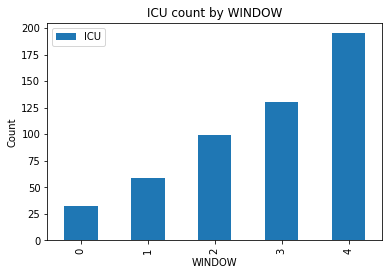

In [304]:
data[['WINDOW', 'ICU']].groupby('WINDOW').agg(sum).plot(kind='bar', ylabel='Count');
plt.title('ICU count by WINDOW');

**The graph is showing the number of patients in ICU increases by WINDOW [obviously].**

##### ----------- IMPORTANT STEP----------- 

**At this step, we set ICU=1 in all windows for a patient who admitted to ICU eventualy:**

In [305]:
raw_data = data.copy() # For futher use if needed.
s = data[['PID', 'ICU']].groupby('PID').agg(max)
new_icu = []
for pid in range(len(s)):
    if s.loc[pid][0]==1:
        new_icu += [1, 1, 1, 1, 1]
    else:
        new_icu += [0, 0, 0, 0, 0]
new_icu = pd.Series(np.array(new_icu))
data.ICU = new_icu

* **Number of patients admitted to ICU vs. Number of patients NOT admitted to ICU:**

In [306]:
s = data[['PID', 'ICU']].groupby('PID').agg(sum)
icu = np.sum(s.ICU == 0)
not_icu = len(s) - icu

print('Admitted:     ', icu)
print('NOT admitted: ', not_icu)

Admitted:      190
NOT admitted:  195


**AGE_ABOVE65 vs. ICU:**

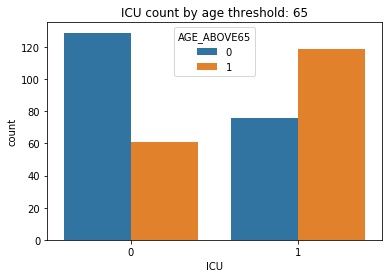

In [313]:
s = data[['PID', 'AGE_ABOVE65', 'ICU']].groupby('PID').agg(max)
sns.countplot(s.ICU, hue=s.AGE_ABOVE65);
plt.title('ICU count by age threshold: 65');

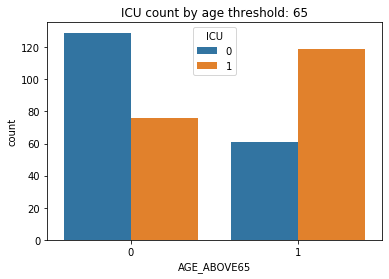

In [314]:
sns.countplot(s.AGE_ABOVE65, hue=s.ICU);
plt.title('ICU count by age threshold: 65');

**So, there is obviously some dependecy between 'AGE_ABOVE65' and target variable.**

* **AGE_PERCENTIL vs. ICU:**

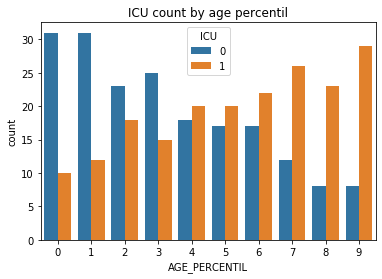

In [309]:
s = data[['PID', 'AGE_PERCENTIL', 'ICU']].groupby('PID').agg(max)
sns.countplot(s.AGE_PERCENTIL, hue=s.ICU);
plt.title('ICU count by age percentil');

**Beautiful correlation between these variables. As AGE_PERCENTIL increases, ICU admissions increases too.**

**Gender vs. ICU:**

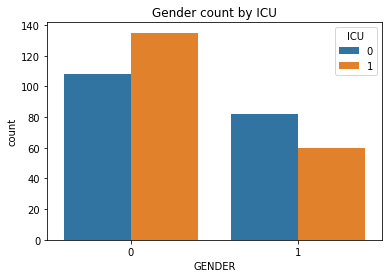

In [310]:
s = data[['PID', 'GENDER', 'ICU']].groupby('PID').agg(max)
sns.countplot(s.GENDER, hue=s.ICU);
plt.title('Gender count by ICU');

**The difference is not that much, it is around 20% which seems to be random (Undoubtedly our prior knowledge about COVID-19 is influential on this conclusion). We will discuss whether or not to keep "GENDER" in features, later in the feature engineering section.**

**Lets find out how IMMUNOCOMPROMISED and some other features affects admissions to ICU:**

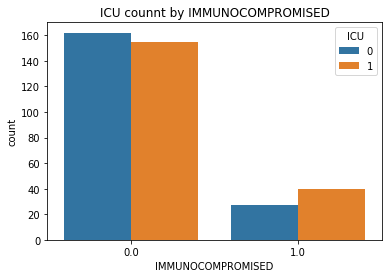

In [311]:
s = data[['PID', 'IMMUNOCOMPROMISED', 'ICU']].groupby('PID').agg(max)
sns.countplot(s.IMMUNOCOMPROMISED, hue=s.ICU);
plt.title('ICU counnt by IMMUNOCOMPROMISED');

**Doesn't seem to be helpful.**

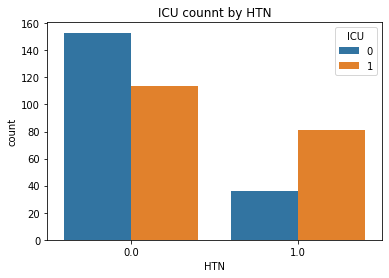

In [315]:
s = data[['PID', 'HTN', 'ICU']].groupby('PID').agg(max)
sns.countplot(s.HTN, hue=s.ICU);
plt.title('ICU counnt by HTN');

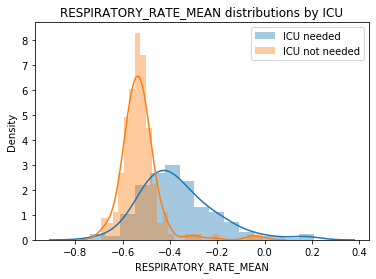

In [329]:
s = data[['PID', 'RESPIRATORY_RATE_MEAN', 'ICU']].groupby('PID').agg(np.mean)
sns.distplot(s[s.ICU == 1].RESPIRATORY_RATE_MEAN, label='ICU needed');
sns.distplot(s[s.ICU == 0].RESPIRATORY_RATE_MEAN, label='ICU not needed');
plt.title('RESPIRATORY_RATE_MEAN distributions by ICU');
plt.legend();

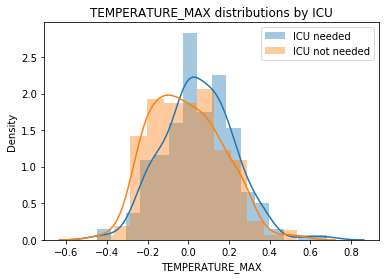

In [334]:
s = data[['PID', 'TEMPERATURE_MAX', 'ICU']].groupby('PID').agg(np.mean)
sns.distplot(s[s.ICU == 1].TEMPERATURE_MAX, label='ICU needed');
sns.distplot(s[s.ICU == 0].TEMPERATURE_MAX, label='ICU not needed');
plt.title('TEMPERATURE_MAX distributions by ICU');
plt.legend();

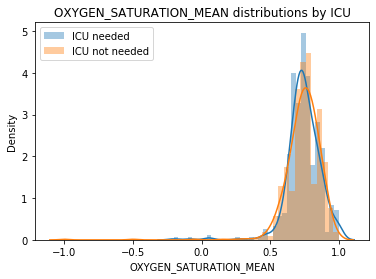

In [350]:
# s = data[['PID', 'OXYGEN_SATURATION_MEAN', 'ICU']].groupby('PID').agg(np.mean)
data.ICU = raw_data.ICU.copy()
sns.distplot(data[data.ICU == 1].OXYGEN_SATURATION_MEAN, label='ICU needed');
sns.distplot(data[data.ICU == 0].OXYGEN_SATURATION_MEAN, label='ICU not needed');
plt.title('OXYGEN_SATURATION_MEAN distributions by ICU');
plt.legend();

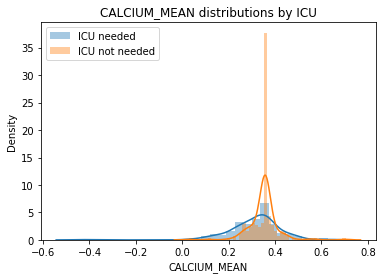

In [340]:
s = data[['PID', 'CALCIUM_MEAN', 'ICU']].groupby('PID').agg(np.mean)
sns.distplot(s[s.ICU == 1].CALCIUM_MEAN, label='ICU needed');
sns.distplot(s[s.ICU == 0].CALCIUM_MEAN, label='ICU not needed');
plt.title('CALCIUM_MEAN distributions by ICU');
plt.legend();

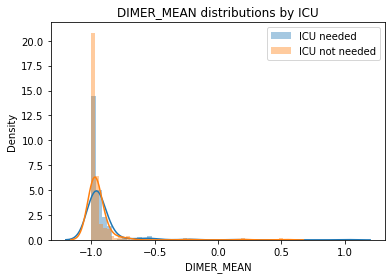

In [344]:
s = data[['PID', 'DIMER_MEAN', 'ICU']].groupby('PID').agg(max)
sns.distplot(s[s.ICU == 1].DIMER_MEAN, label='ICU needed');
sns.distplot(s[s.ICU == 0].DIMER_MEAN, label='ICU not needed');
plt.title('DIMER_MEAN distributions by ICU');
plt.legend();

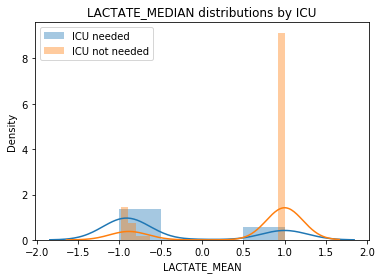

In [353]:
# s = data[['PID', 'LACTATE_MAX', 'ICU']].groupby('PID').agg(np.mean)
sns.distplot(data[data.ICU == 1].LACTATE_MEAN, label='ICU needed');
sns.distplot(data[data.ICU == 0].LACTATE_MEAN, label='ICU not needed');
plt.title('LACTATE_MEDIAN distributions by ICU');
plt.legend();

In [355]:
data.ICU = new_icu

* **Using the t-SNE algorithm for visualization and detection of possible clusters: Will do it in next section, because before running t-SNE data needs to get cleaned of null values.**

# -------------------------------------------------------------------------------------------


## EDA. 4 - Prep for feature engineering (handle NaNs, outliers, etc)

* **Lets start with handling null values:**

**Authors said: "It is reasonable to assume that a patient who does not have a measurement recorded in a time window is clinically stable, potentially presenting vital signs and blood labs similar to neighboring windows. Therefore, one may fill the missing values using the next or previous entry"  [here](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19)<br>So, our policy for replacing null values is already chosen. Replacing null values in cell below:**

In [356]:
for pid in range(len(data.PID.unique())):
    data[data.PID == pid] =\
    data[data.PID == pid].fillna(method='ffill').fillna(method='bfill')

In [357]:
np.sum(data.isna())

PID                              0
AGE_ABOVE65                      0
AGE_PERCENTIL                    0
GENDER                           0
HTN                              5
                              ... 
TEMPERATURE_DIFF_REL             5
OXYGEN_SATURATION_DIFF_REL       5
WINDOW                           0
tags                          1160
ICU                              0
Length: 190, dtype: int64

In [358]:
data[data.TEMPERATURE_DIFF_REL.isna()][:1][data[data.TEMPERATURE_DIFF_REL.isna()][:1].isna() == False].values

array([[199, 0, 0, 0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan,

**As you see above, patient with PID: 199 has all variables nans. Drop this patient:**

In [359]:
data = data[data.PID != 199].copy()

In [360]:
# Re-indexing and re-set PIDs:

new_PID = []
for pid in range(384):
    p = [pid for _ in range(5)]
    new_PID += p
    
new_index = [i for i in range(384*5)]

data.index = new_index
data.PID = new_PID

In [361]:
data.isna().sum().sort_values(ascending=False).head()

tags                  1155
PC02_VENOUS_MEDIAN       5
PH_ARTERIAL_MAX          5
PCR_MEDIAN               5
PCR_MEAN                 5
dtype: int64

**ُThere are still some null values (because we did ffill and bfill patient by patient and if a patient had all values in a column not available, then it didn't get filled)**

**Lets take care of column "tags". more than 60% of patiets doesn't have a value in this column. Dropping this column is considered as an option, but befoer doing that, we should check how correlated are "tags" and target variable "ICU". A few cells above we said we will convert values of these column into numeric type later, doing it:**

In [362]:
def to_numeric_with_nans(s: pd.Series):
    uni = s.unique()
    rng = np.arange(len(uni))
    d = dict(zip(uni, rng))
    new = []
    for el in s:
        if pd.isna(el):
            new.append(None)
        else:
            new.append(d[el])
    return new
    
data.tags = to_numeric_with_nans(data.tags)  

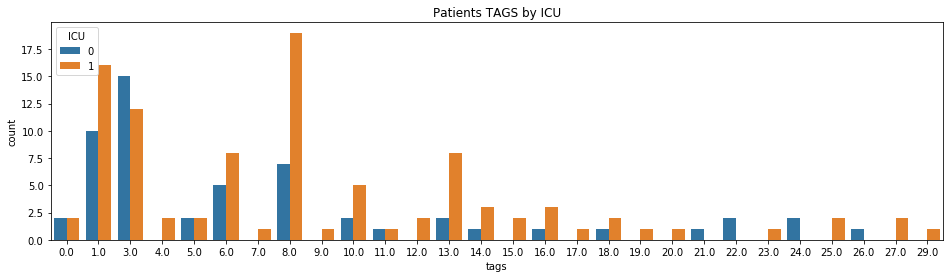

In [365]:
d = data[data.tags.isna() == False][['PID', 'tags', 'ICU']]
s = d.groupby('PID').agg(max)
plt.figure(figsize=(16, 4))
sns.countplot(s.tags, hue=s.ICU);
plt.title('Patients TAGS by ICU');

In [364]:
d[['tags', 'ICU']].corr()

tags       ICU
tags  1.000000  0.061529
ICU   0.061529  1.000000

**Low correlation: drop this column:**

In [47]:
data = data.drop('tags', axis=1)

In [48]:
data.isna().sum().sort_values(ascending=False).head()

PC02_ARTERIAL_MAX    5
PC02_VENOUS_MEAN     5
PC02_VENOUS_MAX      5
PCR_MEDIAN           5
PCR_MEAN             5
dtype: int64

**Still some null values. Get them fixed:**

In [49]:
data[data.PC02_ARTERIAL_MAX.isna() == True]

PID  AGE_ABOVE65  AGE_PERCENTIL  GENDER  HTN  IMMUNOCOMPROMISED  OTHER  \
1430  286            0              0       0  0.0                0.0    1.0   
1431  286            0              0       0  0.0                0.0    1.0   
1432  286            0              0       0  0.0                0.0    1.0   
1433  286            0              0       0  0.0                0.0    1.0   
1434  286            0              0       0  0.0                0.0    1.0   

      ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  ...  TEMPERATURE_DIFF  \
1430             NaN           NaN          NaN  ...         -1.000000   
1431             NaN           NaN          NaN  ...         -0.976190   
1432             NaN           NaN          NaN  ...         -0.976190   
1433             NaN           NaN          NaN  ...         -1.000000   
1434             NaN           NaN          NaN  ...         -0.619048   

      OXYGEN_SATURATION_DIFF  BLOODPRESSURE_DIASTOLIC_DIFF_REL  \
1430               -1.000000                         -1.000000   
1431               -1.000000                         -0.926773   
1432               -1.000000                         -0.926773   
1433               -1.000000                         -0.980676   
1434               -0.818182                         -0.513567   

      BLOODPRESSURE_SISTOLIC_DIFF_REL  HEART_RATE_DIFF_REL  \
1430                        -1.000000            -1.000000   
1431                        -1.000000            -0.963104   
1432                        -1.000000            -0.963104   
1433                        -0.896453            -1.000000   
1434                        -0.518955            -0.488380   

      RESPIRATORY_RATE_DIFF_REL  TEMPERATURE_DIFF_REL  \
1430                  -1.000000             -1.000000   
1431                  -0.884550             -0.975958   
1432                  -0.884550             -0.975958   
1433                  -1.000000             -1.000000   
1434                   0.253456             -0.621141   

      OXYGEN_SATURATION_DIFF_REL  WINDOW  ICU  
1430                   -1.000000       0    0  
1431                   -1.000000       1    0  
1432                   -1.000000       2    0  
1433                   -1.000000       3    0  
1434                   -0.823901       4    1  

[5 rows x 189 columns]

In [50]:
data[data.PC02_VENOUS_MEAN.isna() == True]

PID  AGE_ABOVE65  AGE_PERCENTIL  GENDER  HTN  IMMUNOCOMPROMISED  OTHER  \
1430  286            0              0       0  0.0                0.0    1.0   
1431  286            0              0       0  0.0                0.0    1.0   
1432  286            0              0       0  0.0                0.0    1.0   
1433  286            0              0       0  0.0                0.0    1.0   
1434  286            0              0       0  0.0                0.0    1.0   

      ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  ...  TEMPERATURE_DIFF  \
1430             NaN           NaN          NaN  ...         -1.000000   
1431             NaN           NaN          NaN  ...         -0.976190   
1432             NaN           NaN          NaN  ...         -0.976190   
1433             NaN           NaN          NaN  ...         -1.000000   
1434             NaN           NaN          NaN  ...         -0.619048   

      OXYGEN_SATURATION_DIFF  BLOODPRESSURE_DIASTOLIC_DIFF_REL  \
1430               -1.000000                         -1.000000   
1431               -1.000000                         -0.926773   
1432               -1.000000                         -0.926773   
1433               -1.000000                         -0.980676   
1434               -0.818182                         -0.513567   

      BLOODPRESSURE_SISTOLIC_DIFF_REL  HEART_RATE_DIFF_REL  \
1430                        -1.000000            -1.000000   
1431                        -1.000000            -0.963104   
1432                        -1.000000            -0.963104   
1433                        -0.896453            -1.000000   
1434                        -0.518955            -0.488380   

      RESPIRATORY_RATE_DIFF_REL  TEMPERATURE_DIFF_REL  \
1430                  -1.000000             -1.000000   
1431                  -0.884550             -0.975958   
1432                  -0.884550             -0.975958   
1433                  -1.000000             -1.000000   
1434                   0.253456             -0.621141   

      OXYGEN_SATURATION_DIFF_REL  WINDOW  ICU  
1430                   -1.000000       0    0  
1431                   -1.000000       1    0  
1432                   -1.000000       2    0  
1433                   -1.000000       3    0  
1434                   -0.823901       4    1  

[5 rows x 189 columns]

In [51]:
t = data[data.PID != 286]
t.isna().sum().sort_values(ascending=False).head()

PID                    0
SODIUM_MAX             0
SAT02_ARTERIAL_MIN     0
SAT02_ARTERIAL_MAX     0
SAT02_VENOUS_MEDIAN    0
dtype: int64

In [52]:
data[data.PID == 286].isnull().any().sum()

144

**Patient number 286 has 144 columns full of nothing but null values. Removing this patinet:**

In [53]:
data = data[data.PID != 286].copy()

# Re-indexing and re-set PIDs:
new_PID = []
for pid in range(383):
    p = [pid for _ in range(5)]
    new_PID += p
    
new_index = [i for i in range(383*5)]

data.index = new_index
data.PID = new_PID

In [54]:
data.isna().sum().sort_values(ascending=False).head()

PID                    0
SODIUM_MAX             0
SAT02_ARTERIAL_MIN     0
SAT02_ARTERIAL_MAX     0
SAT02_VENOUS_MEDIAN    0
dtype: int64

**We're done with missing value replacement. At this moment, the data set has no missing values.**

* **At this place, we should handle outliers. I will create two data sets for testing in the learning phase, one with removing outliers and one without (because our prior medical knowledge is not capable of recognizing "outlier" in a medical way).**

In [55]:
(np.abs(data - data.mean()) > 2.5 * data.std())\
    .sum()\
    .sort_values(ascending=False) / len(data)

RESPIRATORY_RATE_DIFF        0.055875
RESPIRATORY_RATE_DIFF_REL    0.052219
ALBUMIN_MIN                  0.049086
ALBUMIN_MEDIAN               0.049086
ALBUMIN_MAX                  0.049086
                               ...   
IMMUNOCOMPROMISED            0.000000
HTN                          0.000000
GENDER                       0.000000
AGE_PERCENTIL                0.000000
ICU                          0.000000
Length: 189, dtype: float64

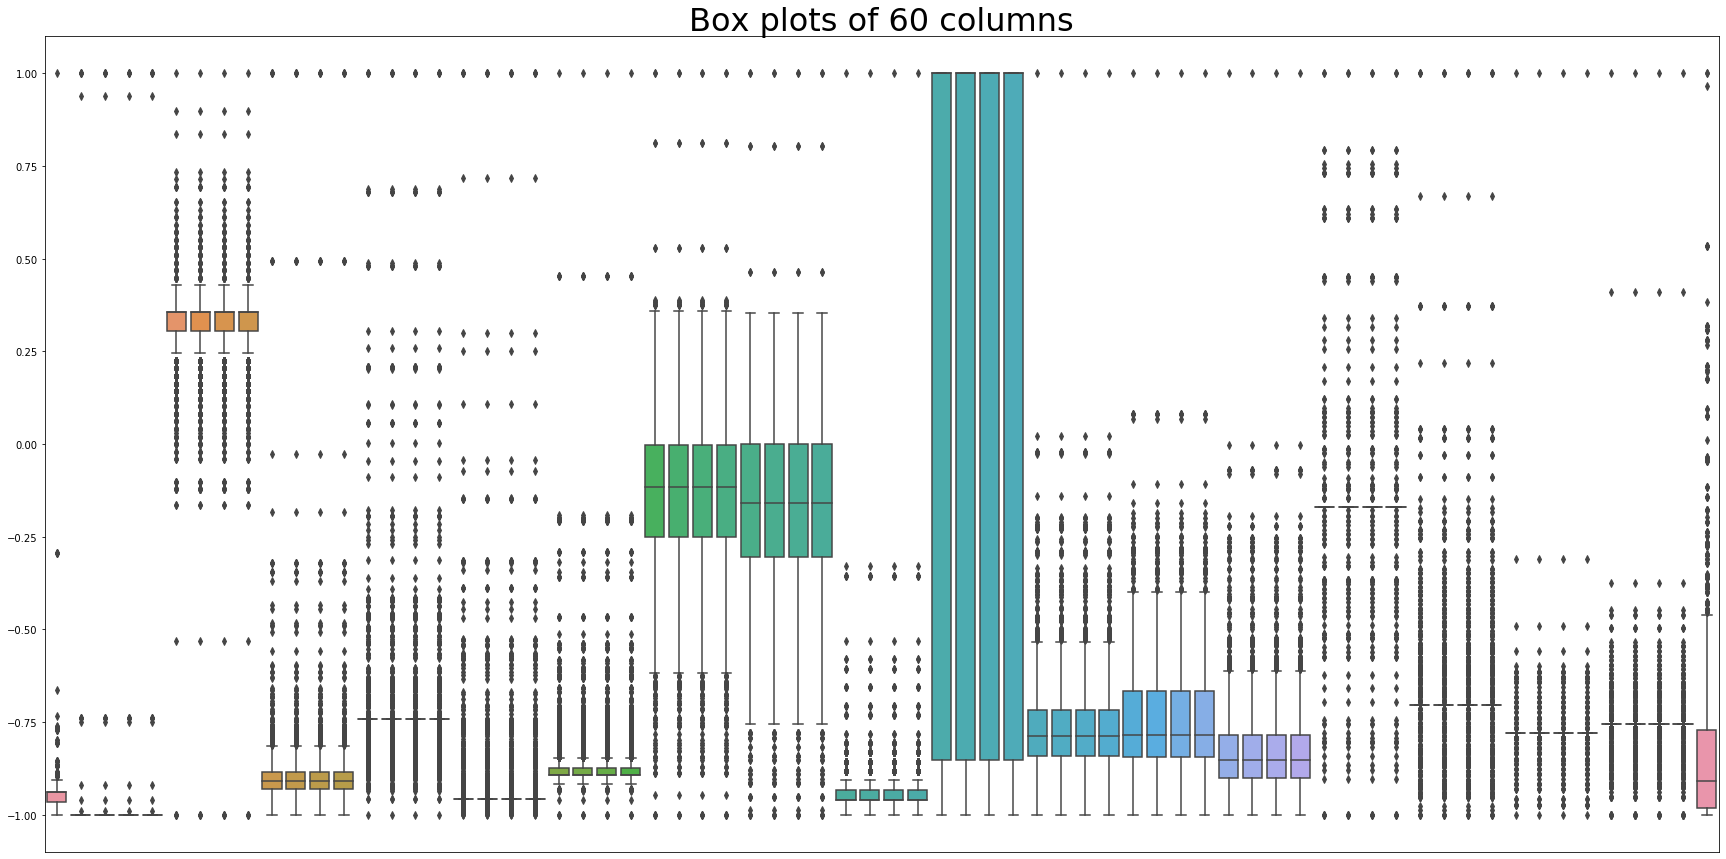

In [56]:
plt.figure(figsize=(30, 15))
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.boxplot(data=data[data.columns[30:100]]);
plt.title("Box plots of 60 columns", fontsize=32);

**We can see outliers in above graph.**

In [57]:
data_2 = data.copy()  # data set without outliers
outliers = (data - data.mean()).abs() > 2.5 * data.std()  # Replacing them with median
data_2[outliers] = np.nan
data_2.fillna(data.median(), inplace=True)

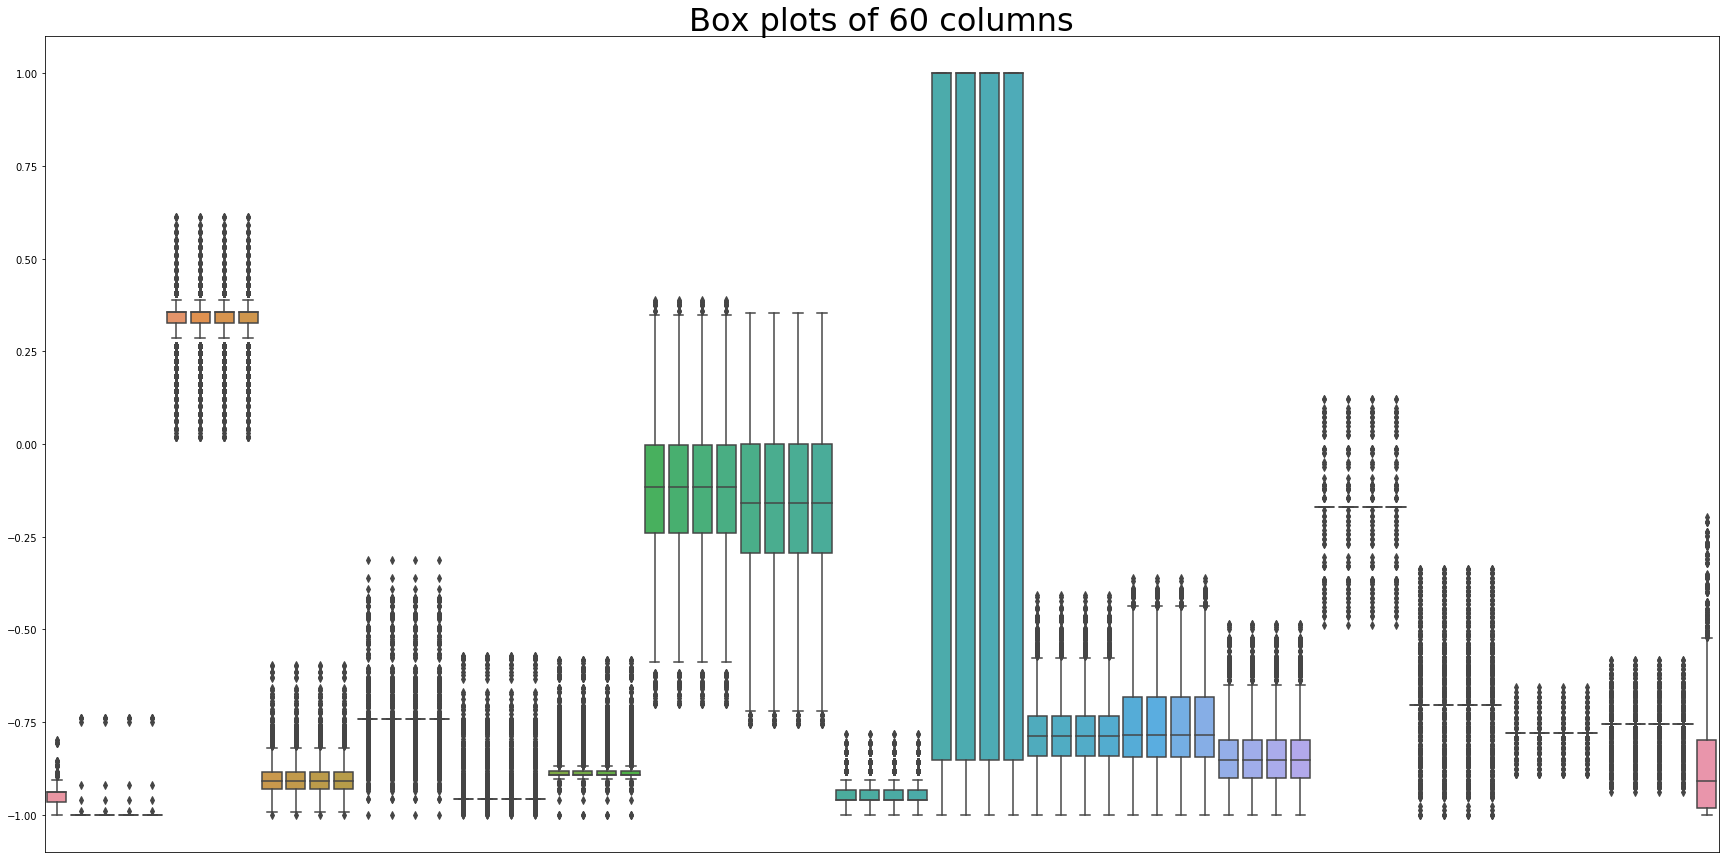

In [58]:
plt.figure(figsize=(30, 15))
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.boxplot(data=data_2[data_2.columns[30:100]]);
plt.title("Box plots of 60 columns", fontsize=32);

**Which is better now. We should re-scale the data set to fit between 1 and -1:**

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_2 = pd.DataFrame(scaler.fit_transform(data_2))

In [60]:
data_2.columns = data.columns
# data_2.PID = data.PID.copy()
# data_2.AGE_PERCENTIL = data.AGE_PERCENTIL.copy()
# WE LET DATA SET KEEP EVERY COLUMN SCALED FOR A FEW CELLS (PCA A FEW CELLS BELLOW)

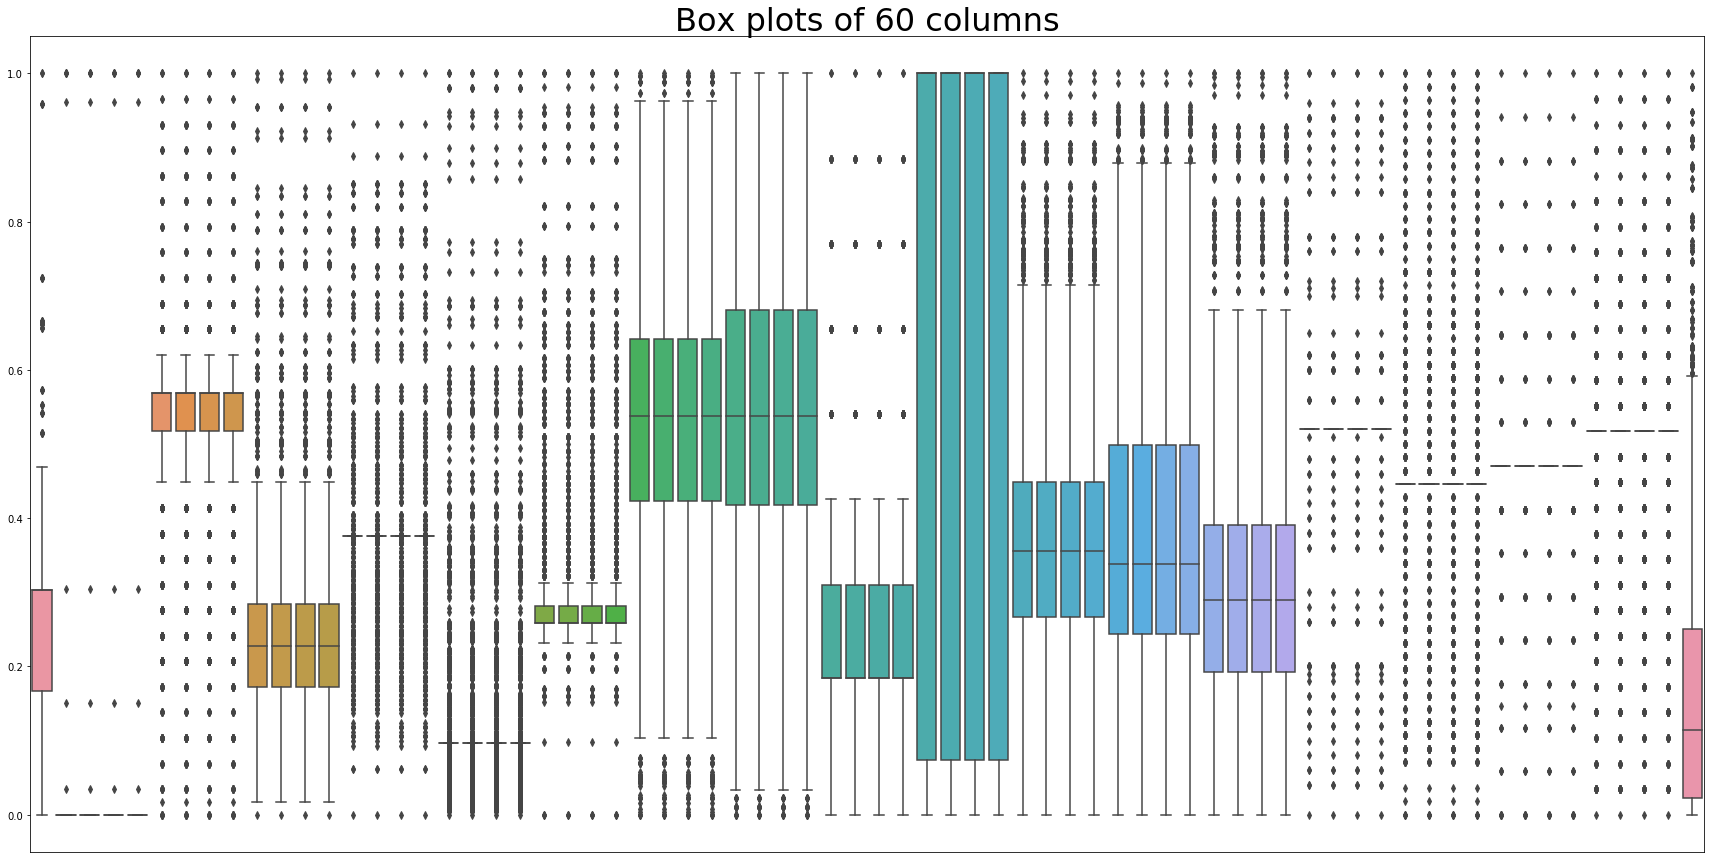

In [61]:
plt.figure(figsize=(30, 15))
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.boxplot(data=data_2[data_2.columns[30:100]]);
plt.title("Box plots of 60 columns", fontsize=32);

**Distributions are better and smoother.**

* **Now, its time to visualize data by t-SNE algorithm, as we mentioned earlier:**

In [63]:
from sklearn.manifold import TSNE
icu = data.pop('ICU')
X = TSNE(n_components=2, perplexity=20).fit_transform(data)

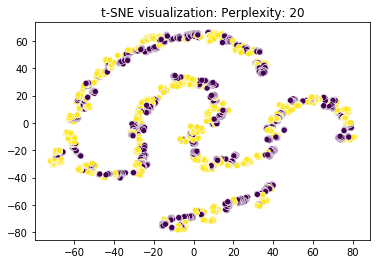

In [64]:
data['ICU'] = icu
sns.scatterplot(X[:, 0], X[:, 1], c=icu);
plt.title('t-SNE visualization: Perplexity: 20');

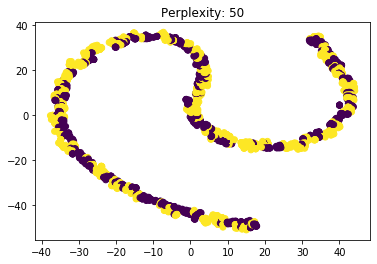

In [65]:
icu = data.pop('ICU')
X = TSNE(n_components=2, perplexity=50).fit_transform(data)
data['ICU'] = icu
plt.scatter(X[:, 0], X[:, 1], c=icu);
plt.title('Perplexity: 50');

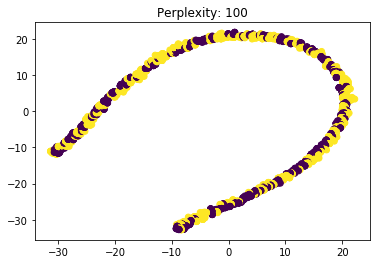

In [66]:
icu = data.pop('ICU')
X = TSNE(n_components=2, perplexity=100).fit_transform(data)
data['ICU'] = icu
plt.scatter(X[:, 0], X[:, 1], c=icu);
plt.title('Perplexity: 100');

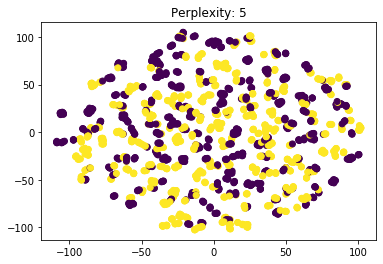

In [67]:
icu = data.pop('ICU')
X = TSNE(n_components=2, perplexity=5).fit_transform(data)
data['ICU'] = icu
plt.scatter(X[:, 0], X[:, 1], c=icu);
plt.title('Perplexity: 5');

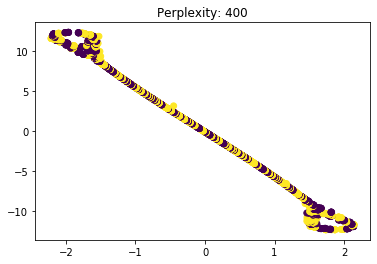

In [68]:
icu = data.pop('ICU')
X = TSNE(n_components=2, perplexity=400).fit_transform(data)
data['ICU'] = icu
plt.scatter(X[:, 0], X[:, 1], c=icu);
plt.title('Perplexity: 400');

**Not a valuable inference.**

# -------------------------------------------------------------------------------------------


## Feature engineering

**Lets begin with correlation heatmap:**

In [69]:
def drop_icu_pid(d: pd.DataFrame):
    if 'ICU' in d.columns:
        d.pop('ICU')
    if 'PID' in d.columns:
        d.pop('PID')
    if 'TARGET' in d.columns:
        d.pop('TARGET')

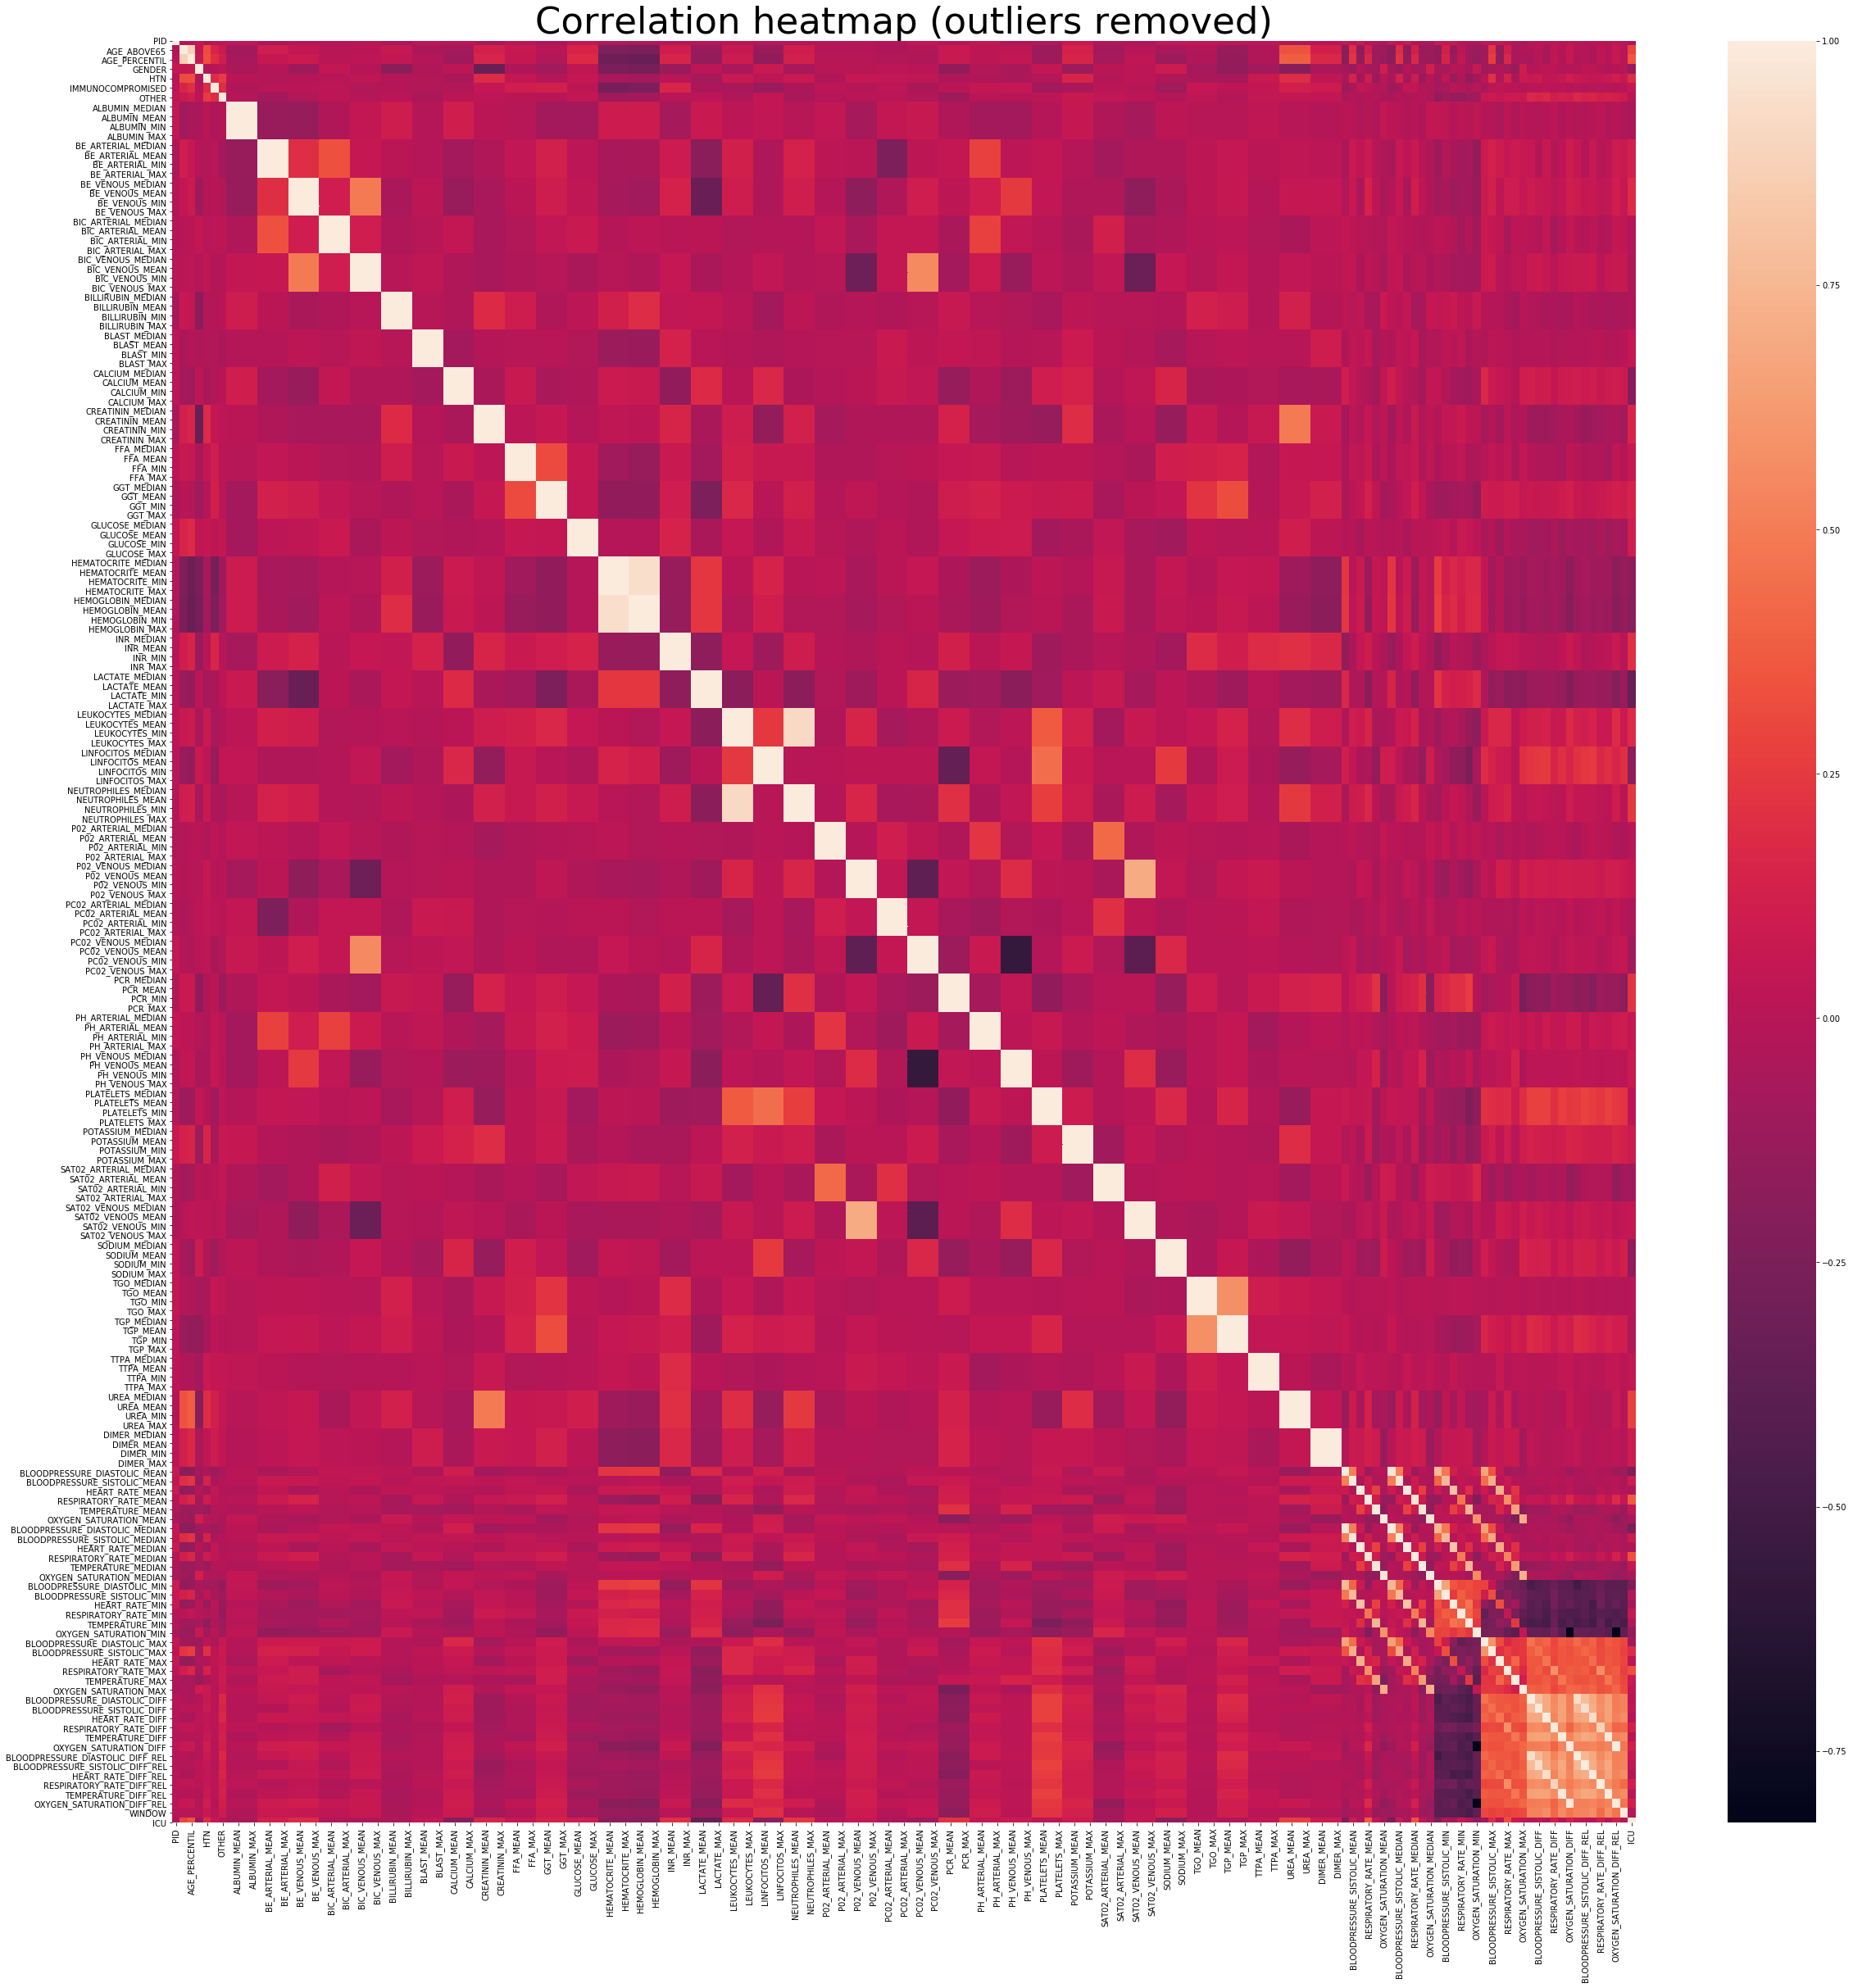

In [70]:
plt.figure(figsize=(40, 40))
sns.heatmap(data_2.corr());
plt.title('Correlation heatmap (outliers removed)', fontsize=45);

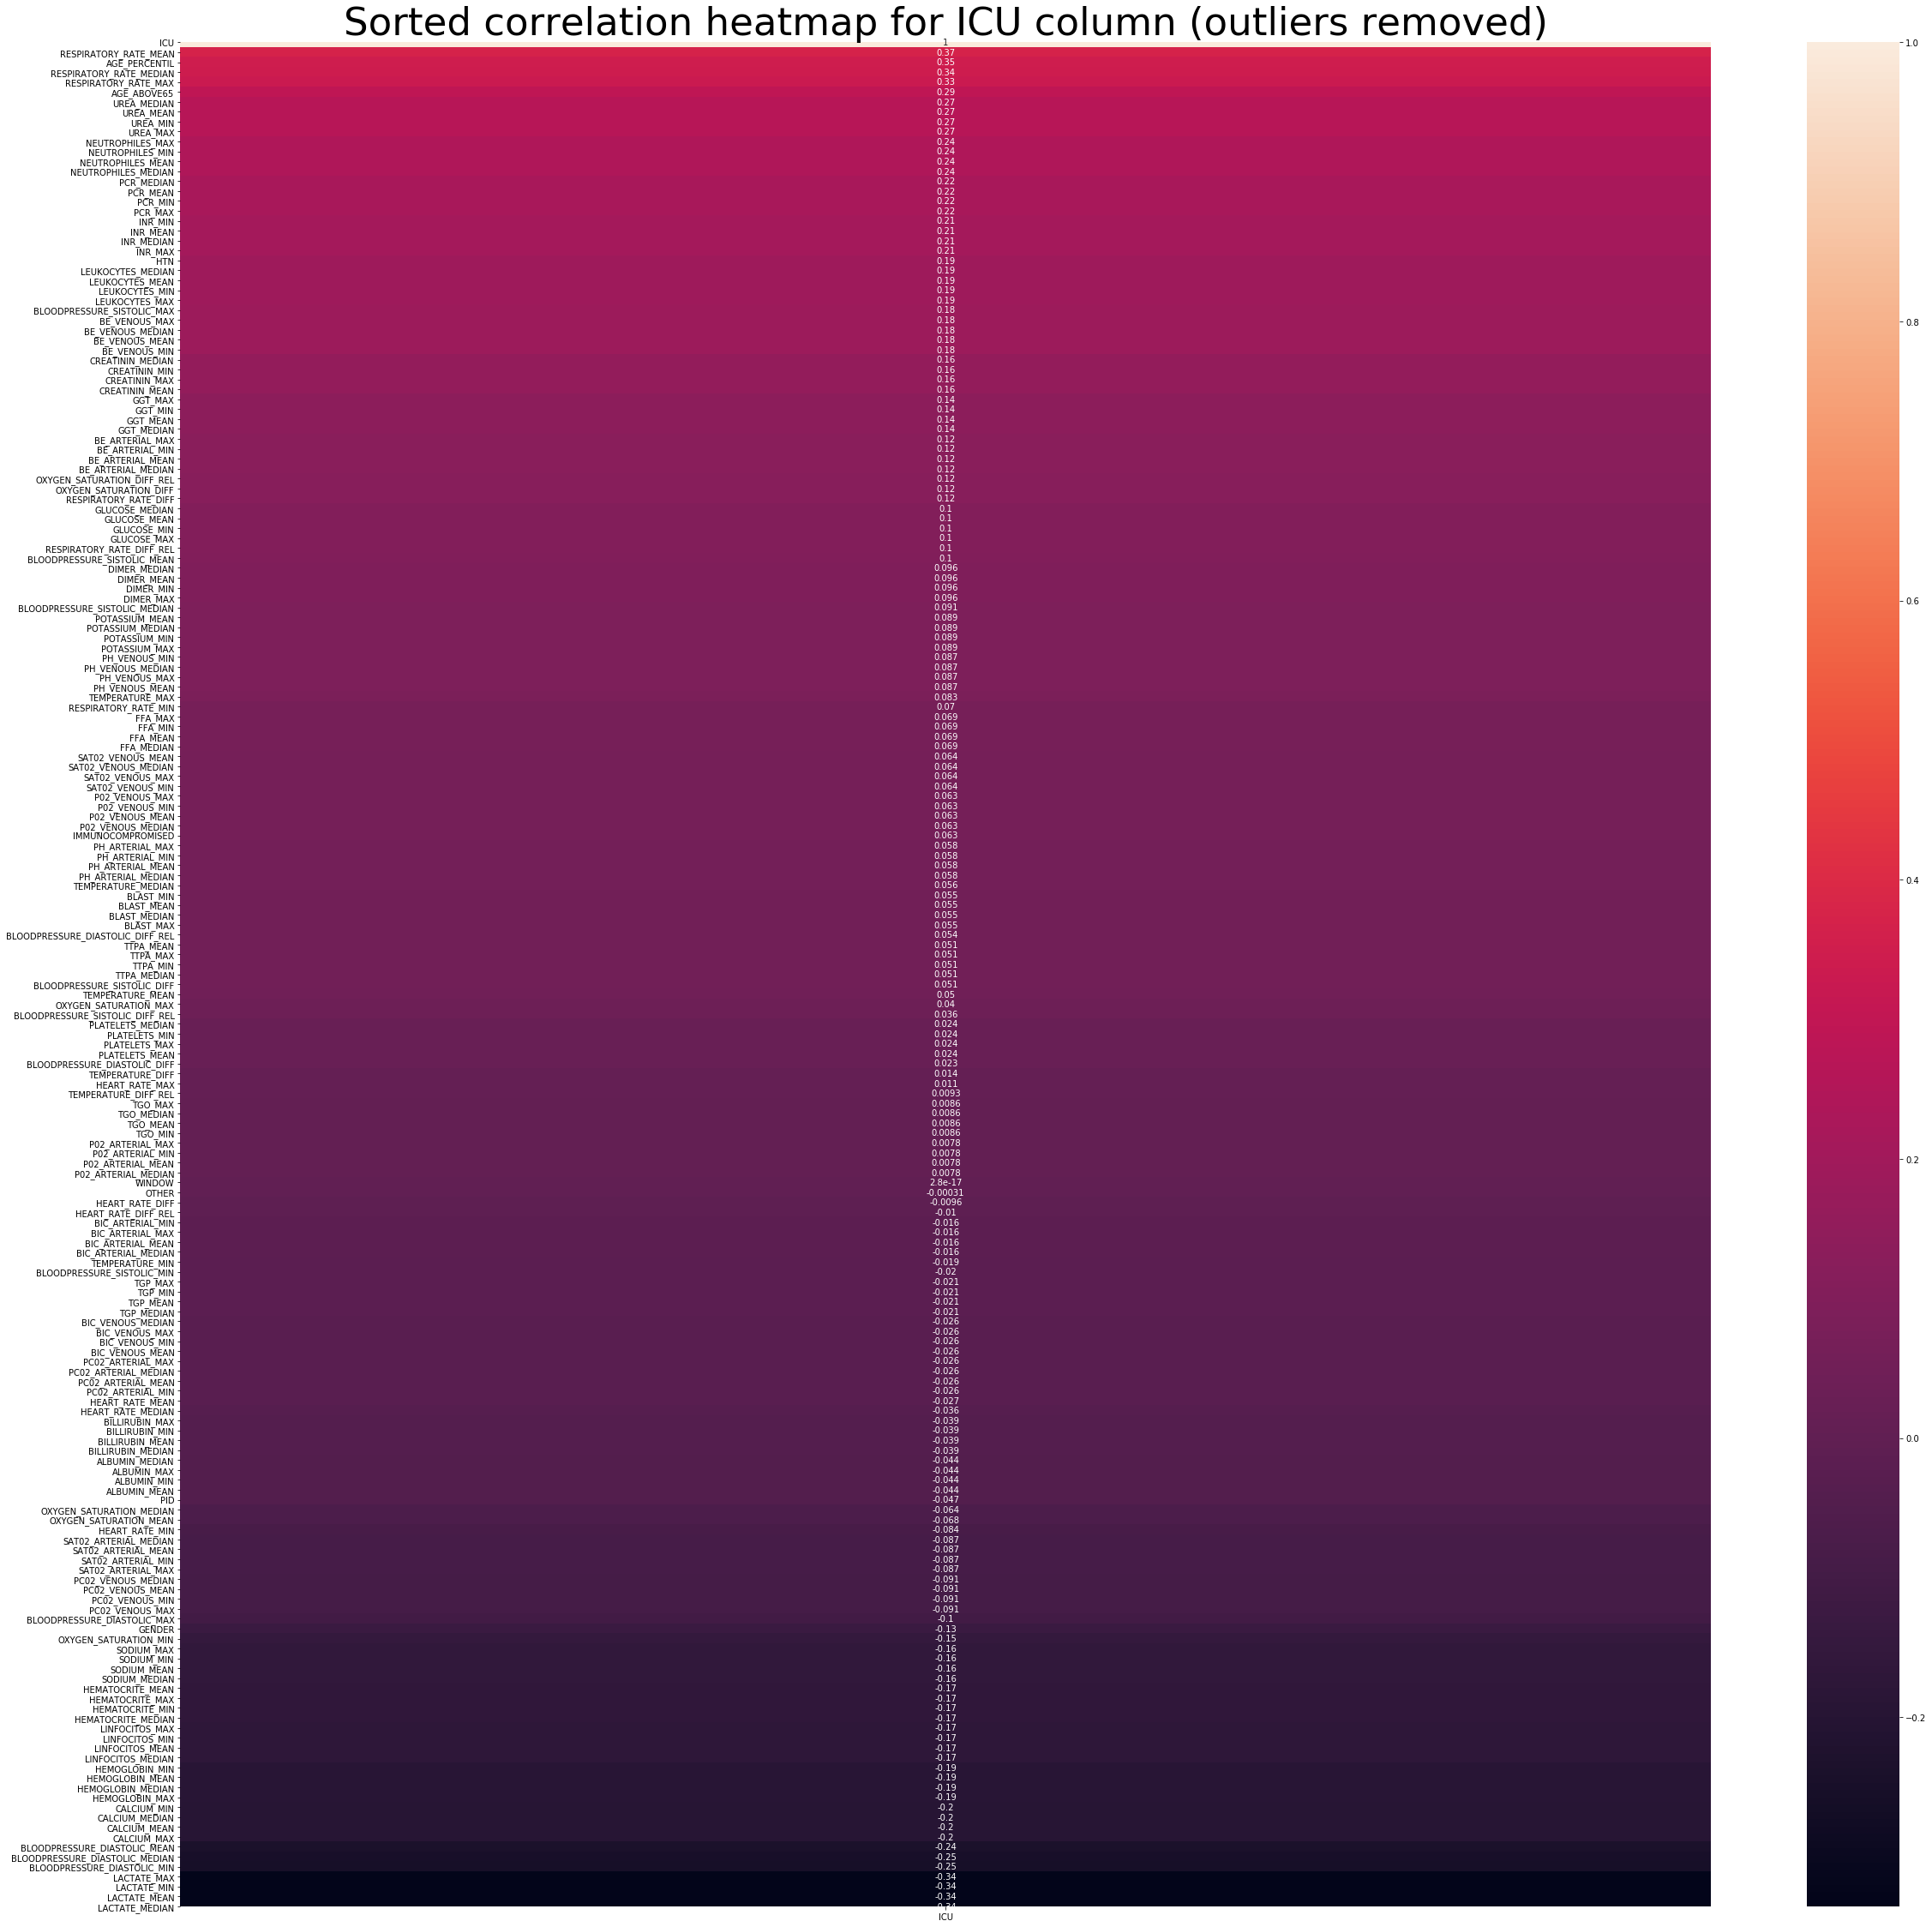

In [71]:
plt.figure(figsize=(40, 40))
sns.heatmap(data_2.corr()[['ICU']].sort_values(by='ICU', ascending=False), annot=True);
plt.title('Sorted correlation heatmap for ICU column (outliers removed)', fontsize=45);

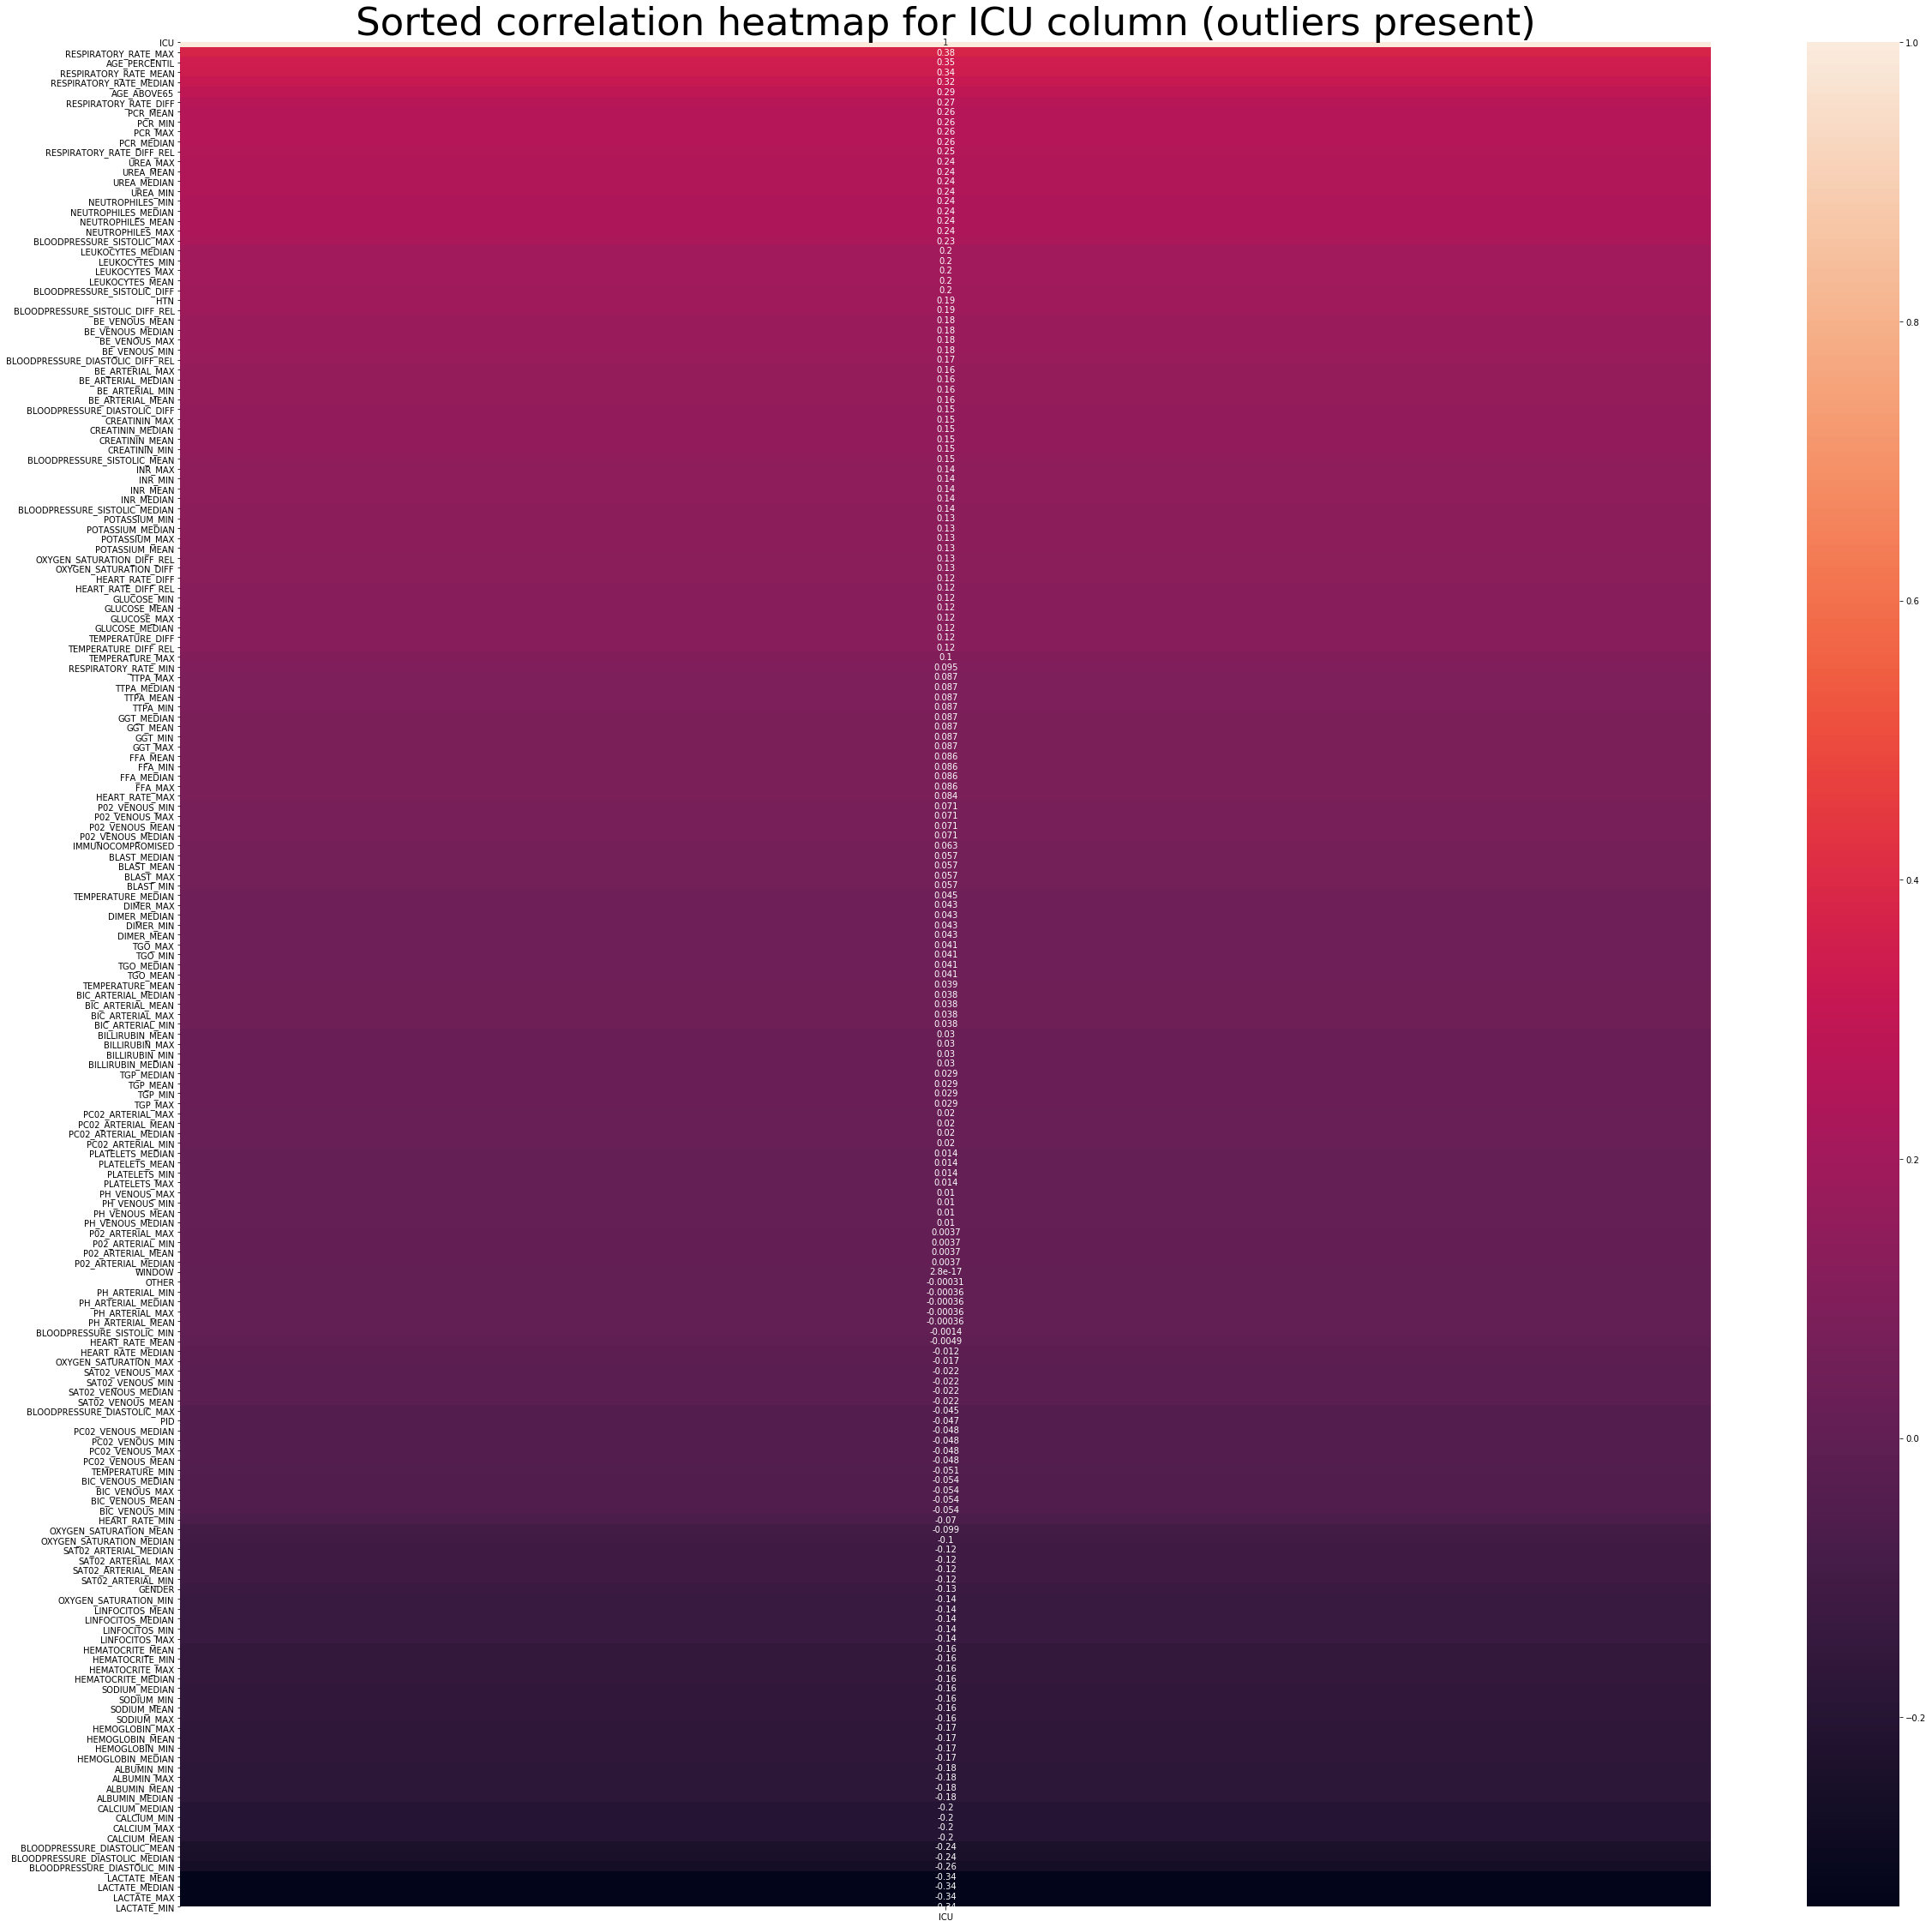

In [72]:
plt.figure(figsize=(40, 40))
sns.heatmap(data.corr()[['ICU']].sort_values(by='ICU', ascending=False), annot=True);
plt.title('Sorted correlation heatmap for ICU column (outliers present)', fontsize=45);


**The heatmap shows there are many columns that have correlation with target variable. The two heatmaps above showed us that the features of dataset without removing outliers have more correlation with target variable, wich means this dataset may perform better in the lrearning phase. As I mentioned earlier, we will test both.**

In [73]:
data_2

PID  AGE_ABOVE65  AGE_PERCENTIL  GENDER  HTN  IMMUNOCOMPROMISED  OTHER  \
0     0.0          1.0       0.555556     0.0  0.0                0.0    1.0   
1     0.0          1.0       0.555556     0.0  0.0                0.0    1.0   
2     0.0          1.0       0.555556     0.0  0.0                0.0    1.0   
3     0.0          1.0       0.555556     0.0  0.0                0.0    1.0   
4     0.0          1.0       0.555556     0.0  0.0                0.0    1.0   
...   ...          ...            ...     ...  ...                ...    ...   
1910  1.0          0.0       0.444444     1.0  0.0                0.0    1.0   
1911  1.0          0.0       0.444444     1.0  0.0                0.0    1.0   
1912  1.0          0.0       0.444444     1.0  0.0                0.0    1.0   
1913  1.0          0.0       0.444444     1.0  0.0                0.0    1.0   
1914  1.0          0.0       0.444444     1.0  0.0                0.0    1.0   

      ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  ...  TEMPERATURE_DIFF  \
0           0.558824      0.558824     0.558824  ...          0.000000   
1           0.558824      0.558824     0.558824  ...          0.000000   
2           0.558824      0.558824     0.558824  ...          0.000000   
3           0.558824      0.558824     0.558824  ...          0.000000   
4           0.558824      0.558824     0.558824  ...          0.864865   
...              ...           ...          ...  ...               ...   
1910        0.558824      0.558824     0.558824  ...          0.000000   
1911        0.558824      0.558824     0.558824  ...          0.000000   
1912        0.558824      0.558824     0.558824  ...          0.000000   
1913        0.558824      0.558824     0.558824  ...          0.000000   
1914        0.558824      0.558824     0.558824  ...          0.513514   

      OXYGEN_SATURATION_DIFF  BLOODPRESSURE_DIASTOLIC_DIFF_REL  \
0                   0.000000                          0.000000   
1                   0.000000                          0.000000   
2                   0.000000                          0.000000   
3                   0.000000                          0.000000   
4                   0.272727                          0.709890   
...                      ...                               ...   
1910                0.000000                          0.000000   
1911                0.000000                          0.000000   
1912                0.000000                          0.000000   
1913                0.000000                          0.000000   
1914                0.242424                          0.346939   

      BLOODPRESSURE_SISTOLIC_DIFF_REL  HEART_RATE_DIFF_REL  \
0                            0.000000             0.000000   
1                            0.000000             0.000000   
2                            0.000000             0.000000   
3                            0.000000             0.000000   
4                            0.000000             0.000000   
...                               ...                  ...   
1910                         0.000000             0.000000   
1911                         0.000000             0.000000   
1912                         0.000000             0.000000   
1913                         0.000000             0.000000   
1914                         0.371632             0.327928   

      RESPIRATORY_RATE_DIFF_REL  TEMPERATURE_DIFF_REL  \
0                      0.000000              0.000000   
1                      0.000000              0.000000   
2                      0.000000              0.000000   
3                      0.000000              0.000000   
4                      1.000000              0.865240   
...                         ...                   ...   
1910                   0.000000              0.000000   
1911                   0.000000              0.000000   
1912                   0.000000              0.000000   
1913                   0.000000              0.0

* **Using PCA for dimension reduction. We will preserve 99% of variance:**

In [74]:
drop_icu_pid(data_2)

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.99, svd_solver='full')
pca.fit(data_2)
data2_pca = pca.transform(data_2)
data2_new = pca.inverse_transform(data2_pca)
data2_pca.shape

(1915, 57)

**Number of columns is reduced to 57 from 189 (99% variance preserved).**

In [76]:
data2_pca = pd.DataFrame(data2_pca)
data2_pca['ICU'] = icu
data2_pca.head()

0         1         2         3         4         5         6  \
0 -0.881304 -0.543323  0.251629  0.485052 -0.104470  0.347851 -0.394790   
1 -0.904449 -0.601041  0.102808  0.648321  0.242979  0.241604 -0.148660   
2 -0.875418 -0.528271  0.114588  0.654787  0.273542  0.246231 -0.142085   
3 -0.825799 -0.345152  0.197255  0.565235  0.028644  0.330536 -0.316939   
4  2.080494  0.984051  0.025034  0.040842  0.420461 -0.156013 -0.237532   

          7         8         9  ...        48        49        50        51  \
0 -0.275807 -0.152196  0.046800  ...  0.068946 -0.001950  0.001807 -0.018128   
1 -0.503946  0.360355  0.223979  ...  0.053567  0.002404 -0.024732  0.001879   
2 -0.522689  0.340749  0.225691  ...  0.043632 -0.007646 -0.033844  0.000044   
3 -0.412583  0.051489 -0.002036  ...  0.036988 -0.024498 -0.035656 -0.015756   
4 -0.478754 -0.203743 -0.032913  ... -0.256278 -0.049148  0.042136 -0.274915   

         52        53        54        55        56  ICU  
0 -0.014746  0.017066  0.033296  0.003003  0.031681    1  
1  0.034009  0.033205  0.021167 -0.010653  0.049287    1  
2  0.034833  0.033634  0.017047 -0.007866  0.046383    1  
3  0.007293  0.028481  0.022558  0.015909  0.030489    1  
4  0.300321  0.030494 -0.095934 -0.141227 -0.241882    1  

[5 rows x 58 columns]

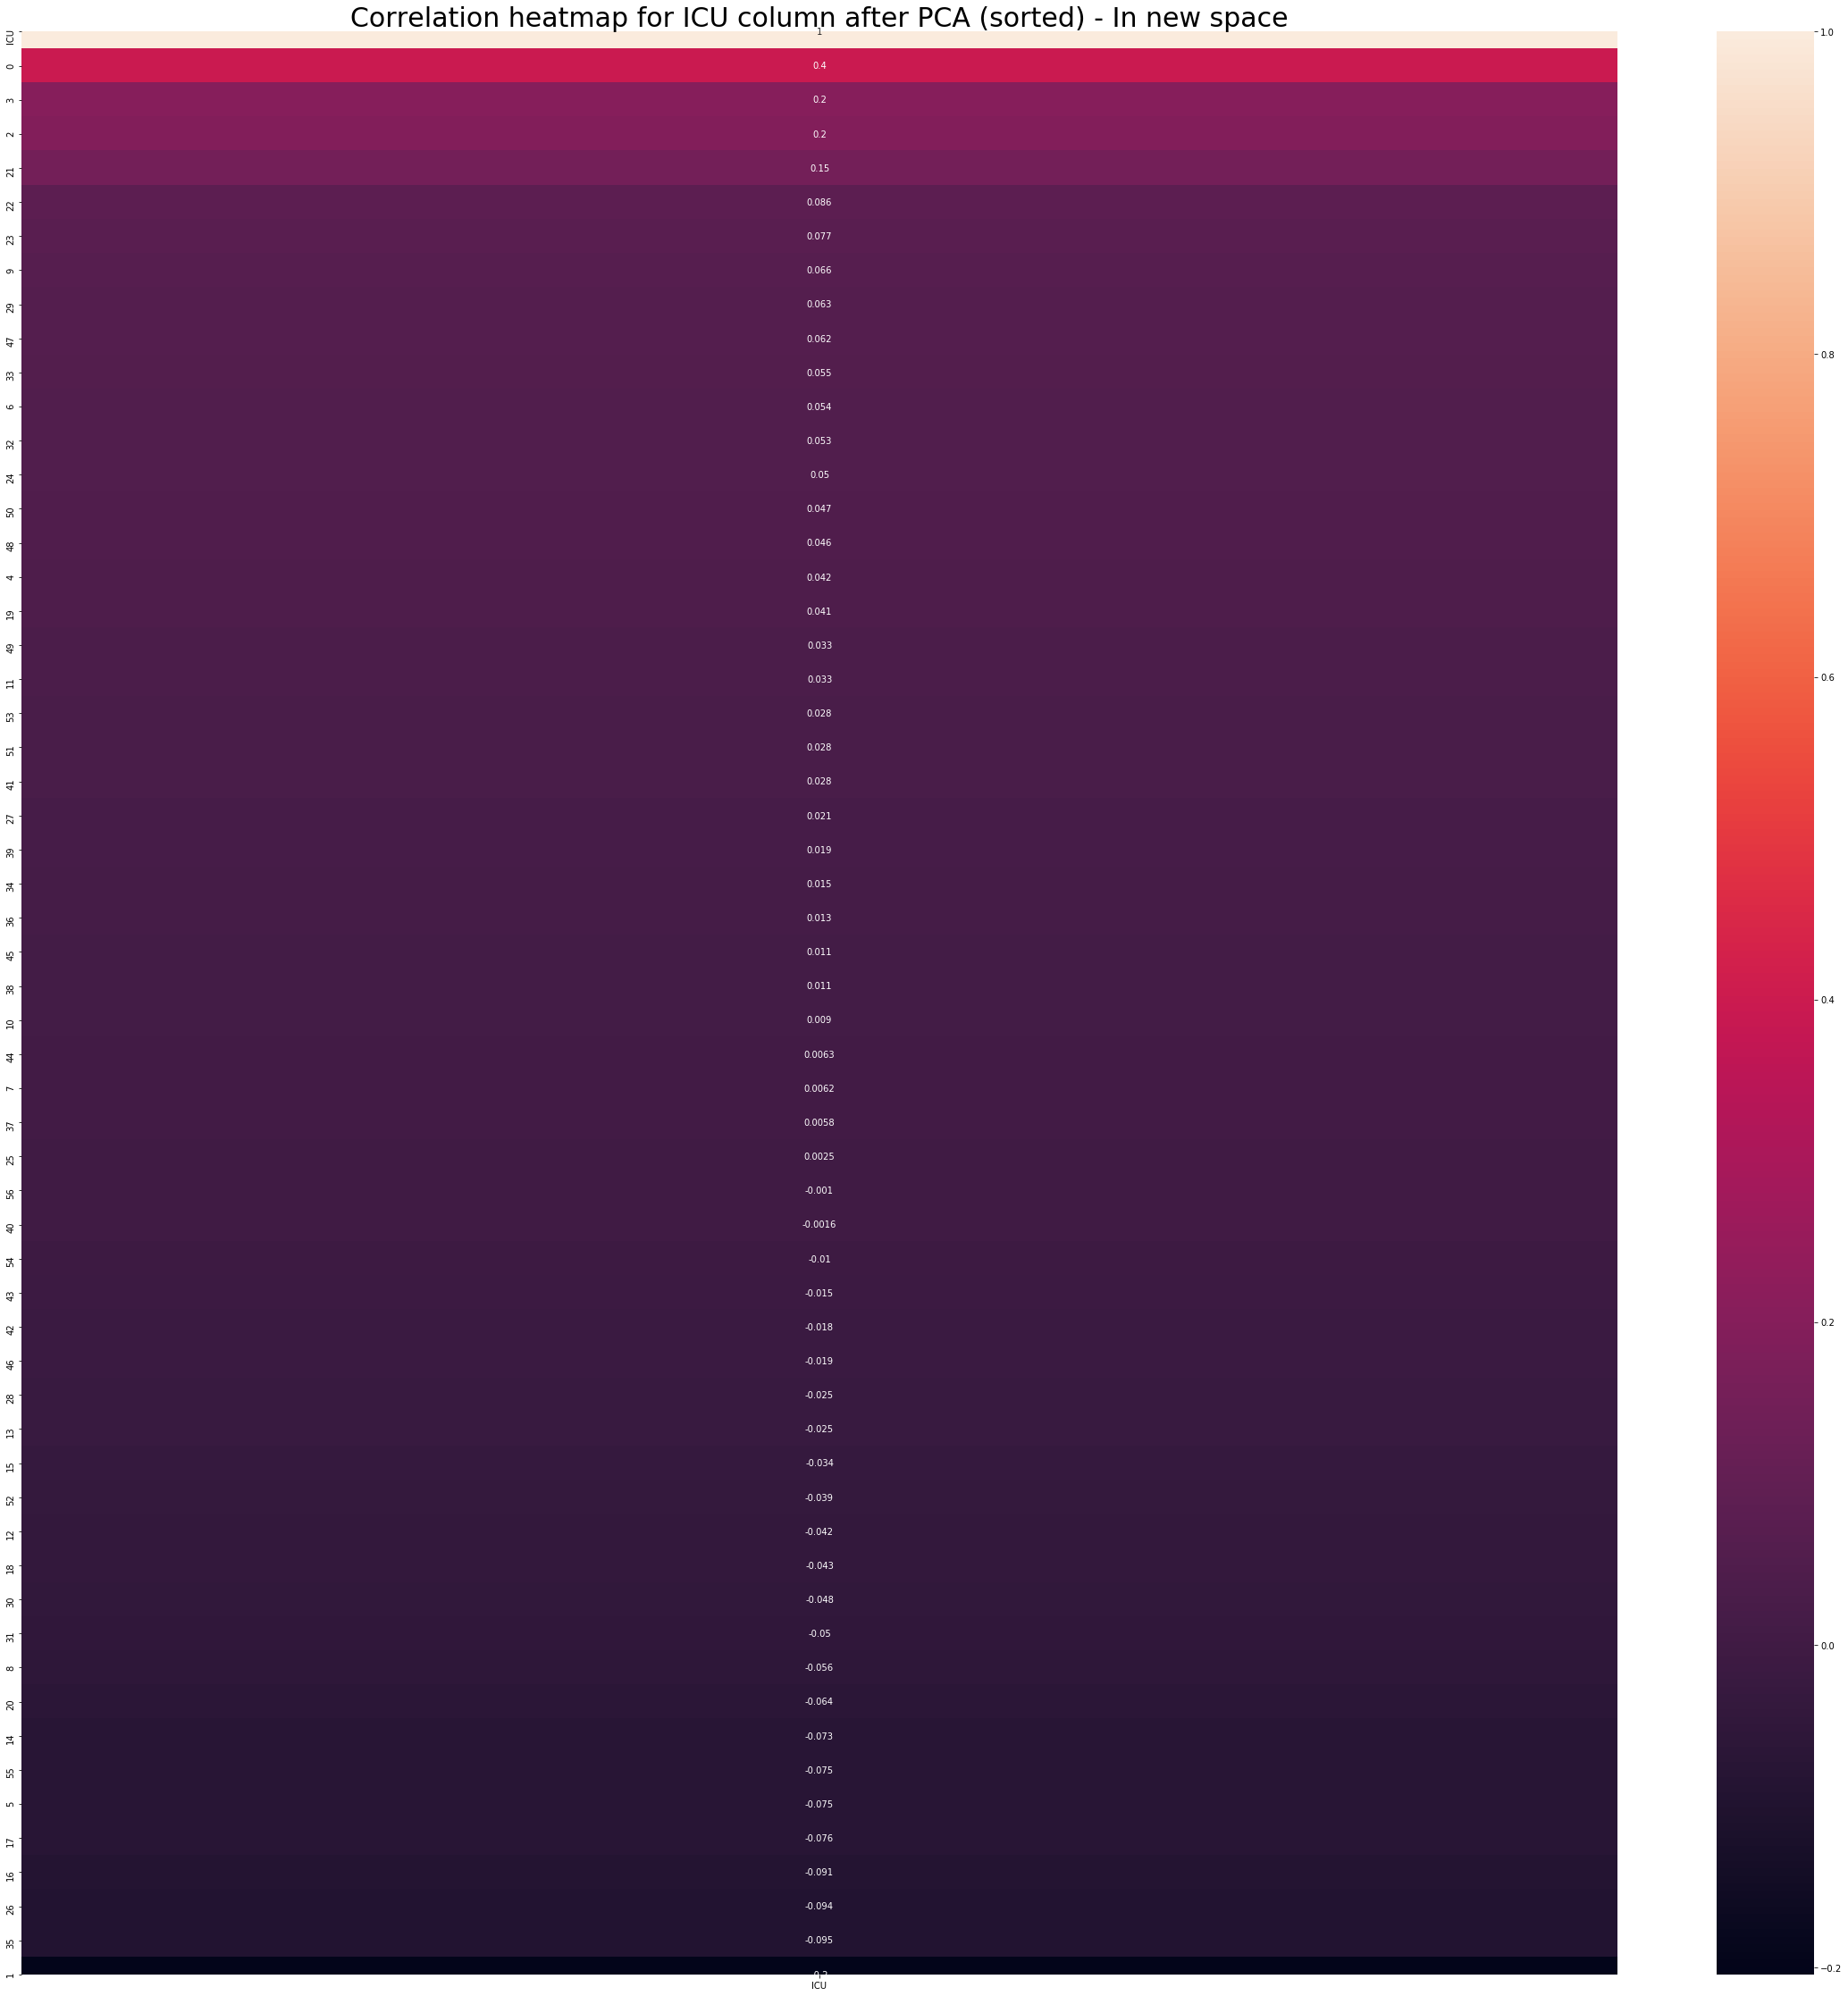

In [77]:
plt.figure(figsize=(40, 40))
sns.heatmap(data2_pca.corr()[['ICU']].sort_values(by='ICU', ascending=False), annot=True);
plt.title('Correlation heatmap for ICU column after PCA (sorted) - In new space', fontsize=30);

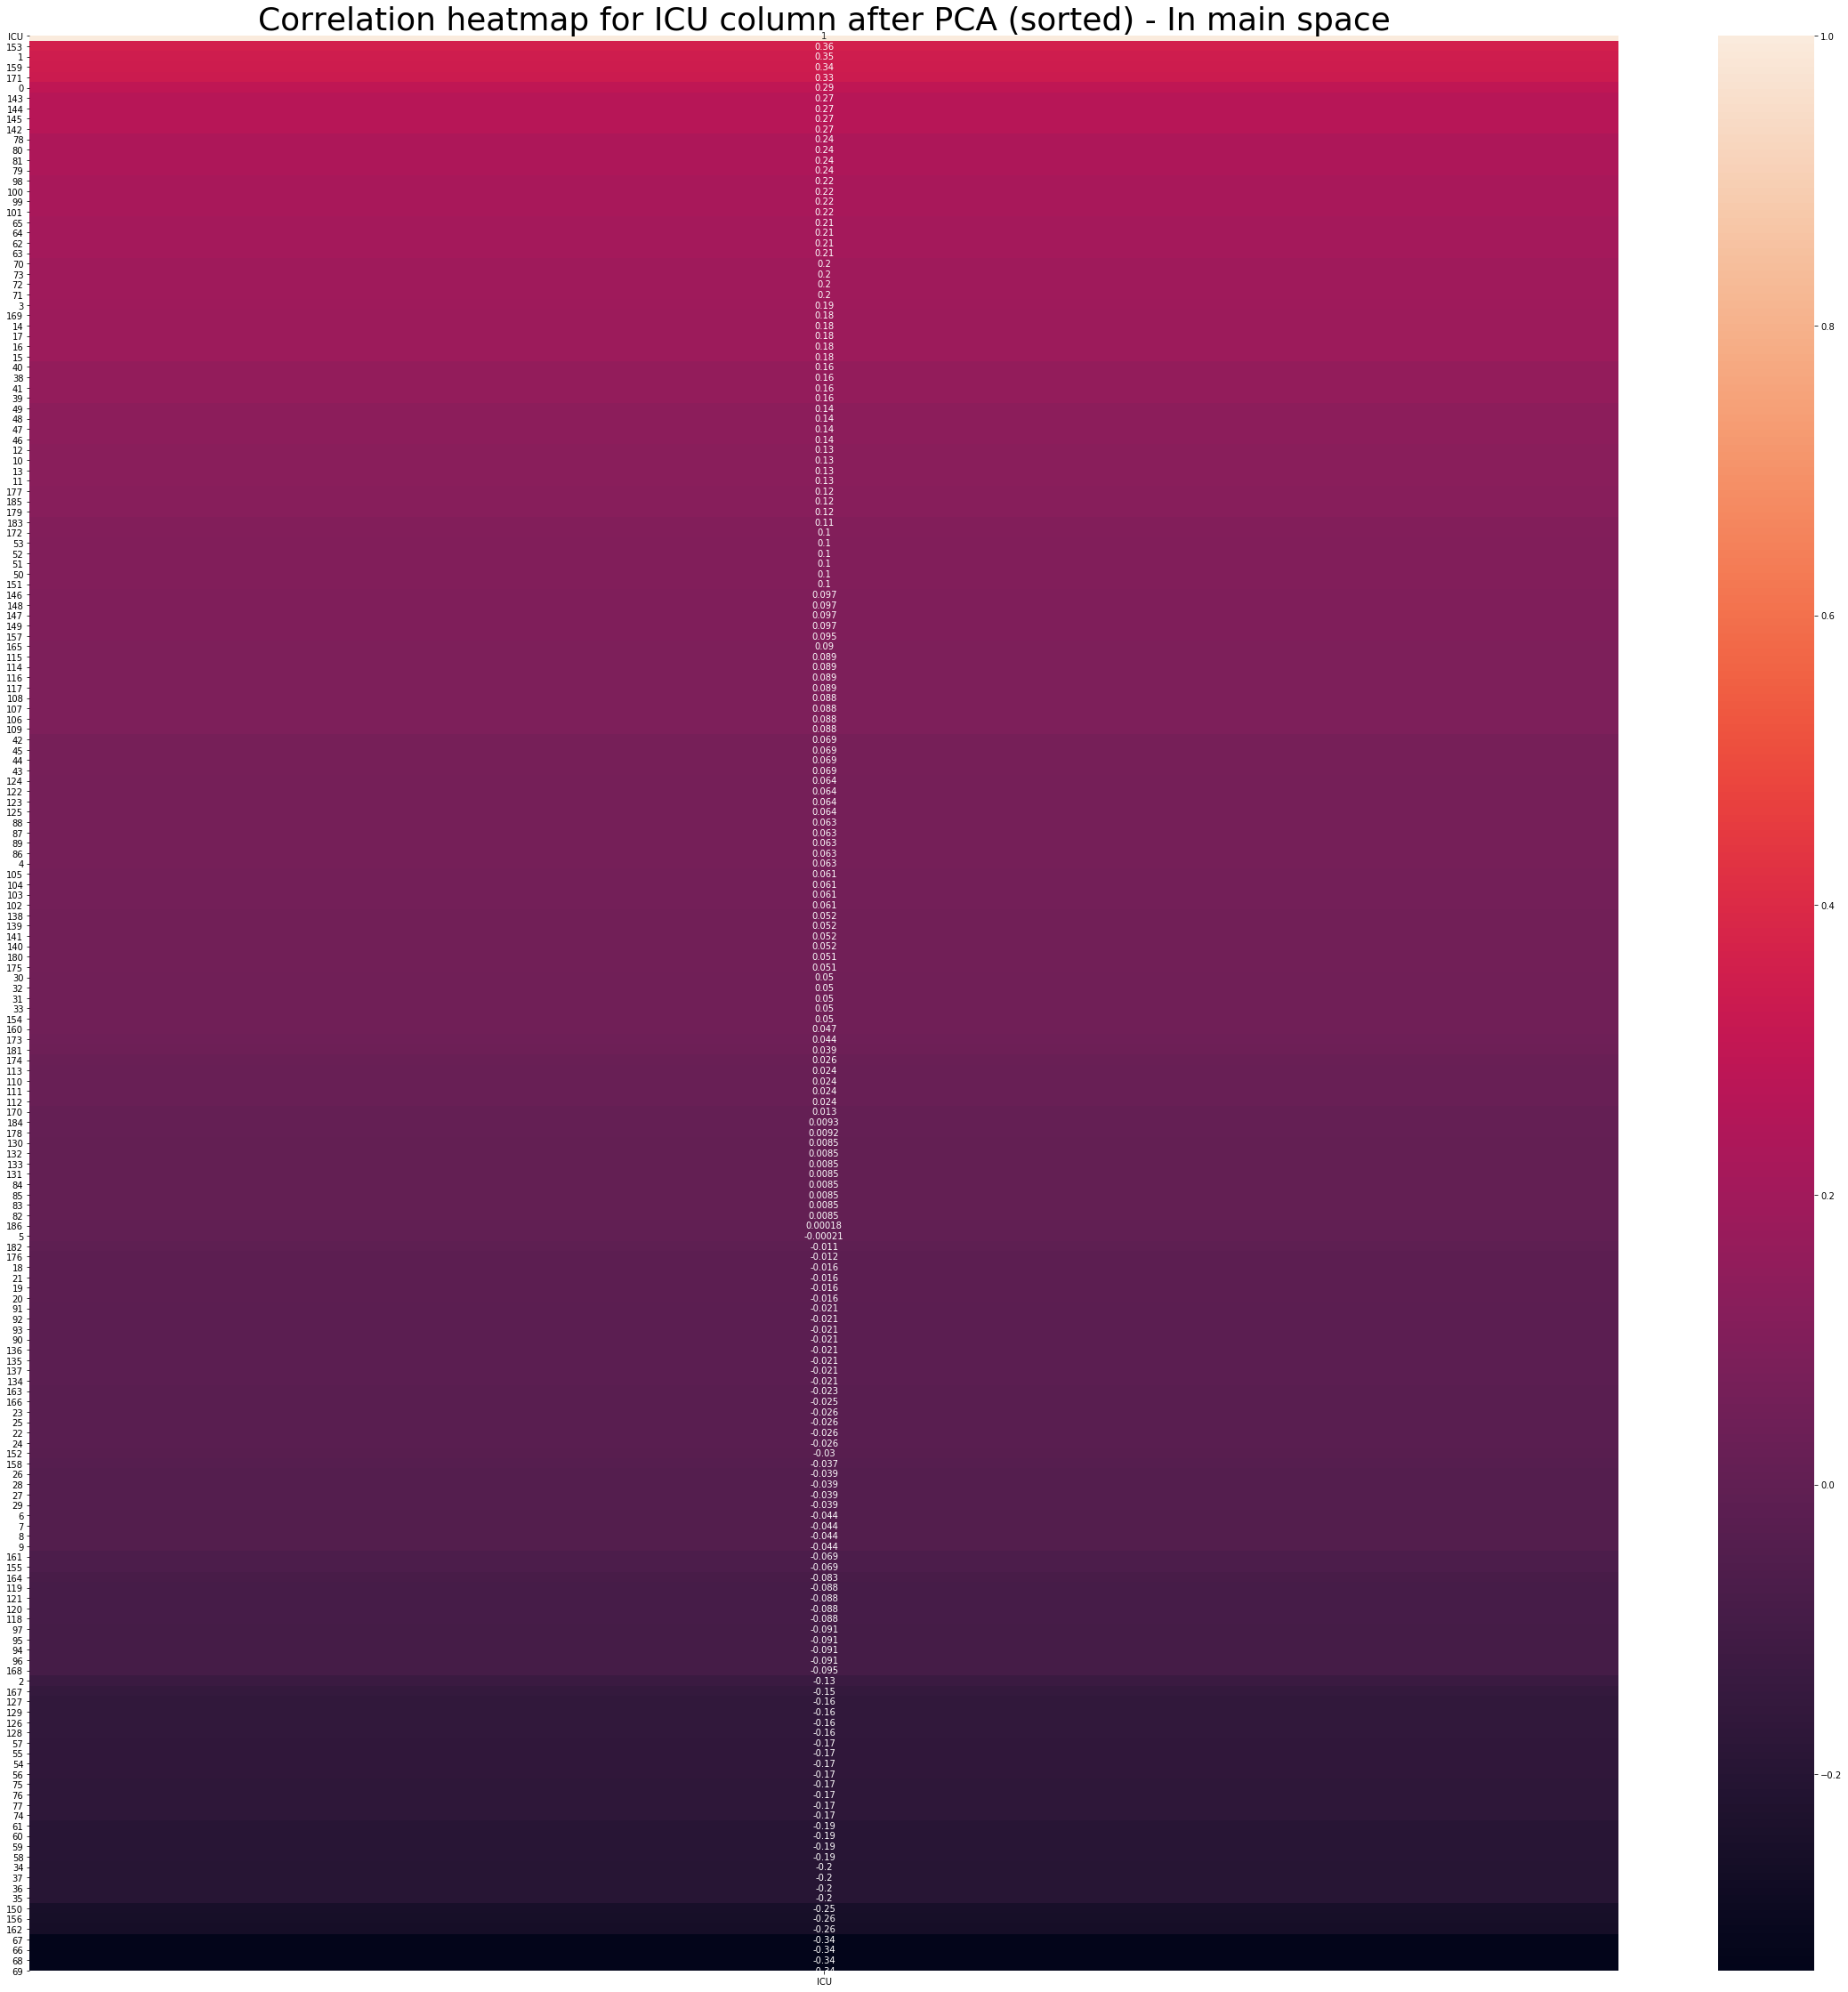

In [78]:
data2_new = pd.DataFrame(data2_new)
data2_new['ICU'] = icu
plt.figure(figsize=(40, 40))
sns.heatmap(data2_new.corr()[['ICU']].sort_values(by='ICU', ascending=False), annot=True);
plt.title('Correlation heatmap for ICU column after PCA (sorted) - In main space', fontsize=36);

**We will test both data sets (with and without PCA) in the learning phase. So, we will have:**<br>
* **with outliers, with PCA: data_pca**<br>
* **with outliers, without PCA: data**<br>
* **without outliers, with PCA: data2_pca**<br>
* **without outliers, without PCA: data_2**<br>

In [79]:
drop_icu_pid(data)
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data))
pca = PCA(n_components=.99, svd_solver='full')
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)
data_new = pca.inverse_transform(data_pca)
data['ICU'] = icu
data_pca.shape

(1915, 42)

**Less columns than outlier-cleaned dataset PCA.**

In [80]:
data['ICU'] = icu
data_2['ICU'] = icu

<br><br>
* **There is something else that dataser authors suggested: Not to use record were actually coresponding patient is in ICU during that window time. Instead, use previous windows for modeling:<br>**

In [81]:
# Doing a little data cleaning here:
d = raw_data[raw_data.PID != 199].copy()
new_PID = []
for pid in range(384):
    p = [pid for _ in range(5)]
    new_PID += p    
new_index = [i for i in range(384*5)]
d.index = new_index
d.PID = new_PID

d = d[d.PID != 286].copy()
new_PID = []
for pid in range(383):
    p = [pid for _ in range(5)]
    new_PID += p 
new_index = [i for i in range(383*5)]
d.index = new_index
d.PID = new_PID

In [82]:
d['extend_icu'] = icu
early_icu = []
for pid in d.PID.unique():
    if int(d[d.PID == pid].extend_icu.head(1)) == 0:
        early_icu += [0, 0, 0, 0, 0]
    else:
        for i in range(5):
            if list(d[d.PID == pid].ICU)[i] == 0:
                early_icu.append(1)
            elif list(d[d.PID == pid].ICU)[i] == 1:
                early_icu.append(0)
                
data_2['early_icu'] = early_icu
data_early_icu = data_2[d.ICU != 1].copy()

In [83]:
data_2.pop('early_icu')

0       1
1       1
2       1
3       1
4       0
       ..
1910    0
1911    0
1912    0
1913    0
1914    0
Name: early_icu, Length: 1915, dtype: int64

In [84]:
early_icu = data_early_icu.pop('early_icu')

**Now, this dataset is ready to use, too. We will test it beside previous datasets.**

<br><br>
* **This is reasonable to write a function wich does the train_test_split by patients. Means a certain patient records end up either in train set or test set, in sake of preventing models to memorize patients medical records and classify by them:**

In [85]:
def tt_split_by_patient(data, y, test_size):
    drop_icu_pid(data)
    data['TARGET'] = y
    test_index, train_index = [], []
    for _ in range(int(len(data)/5)):
        r = np.random.uniform()
        if r < test_size:
            test_index += [True, True, True, True, True]
            train_index += [False, False, False, False, False]
        else:
            test_index += [False, False, False, False, False]
            train_index += [True, True, True, True, True]
    test_index, train_index = pd.Series(test_index), pd.Series(train_index)
    test_set = data[test_index]
    train_set = data[train_index]
    test_set = test_set.sample(frac=1)
    train_set = train_set.sample(frac=1)
    y_test = test_set.pop('TARGET')
    X_test = test_set
    y_train = train_set.pop('TARGET')
    X_train = train_set
    return X_train, X_test, y_train, y_test


def create_pid(data):
    pid = []
    for i in range(int(len(data)/5)):
        pid += [i for _ in range(5)]
    return pid

# -------------------------------------------------------------------------------------------


## Feature engineering: Learning and testing few models

* **Train and test a decision tree on data_2 for now:**

In [86]:
drop_icu_pid(data_2)

In [87]:
import sklearn.metrics as met

def print_score(y_test, pred):
    print('Accuracy:  ', met.accuracy_score(y_test, pred))
    print('F1_score:  ', met.f1_score(y_test, pred))
    print('Precision: ', met.precision_score(y_test, pred))
    print('Recall:    ', met.recall_score(y_test, pred))
    print('ROC_AUC:   ', met.roc_auc_score(y_test, pred))
    

def score(y_test, pred):
    if y_test.sum() == len(y_test) or y_test.sum() == 0: 
        return met.accuracy_score(y_test, pred), met.f1_score(y_test, pred),\
        met.precision_score(y_test, pred),\
        met.recall_score(y_test, pred), None
    return met.accuracy_score(y_test, pred), met.f1_score(y_test, pred),\
    met.precision_score(y_test, pred),\
    met.recall_score(y_test, pred),\
    met.roc_auc_score(y_test, pred)

**This is just for making some intuition on the learning phase.<br>Notice: we haven't yet decided on final dataset, final features to be included, and seperating records by window time.**

In [88]:
from sklearn import tree
from sklearn.model_selection import train_test_split

res = pd.DataFrame()
for train in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data_2, icu, test_size=0.15, shuffle=True,
                                                       random_state=np.random.randint(100))
    tree_clf = tree.DecisionTreeClassifier()
    tree_clf = tree_clf.fit(X_train, y_train)
    pred = tree_clf.predict(X_test)
    acc, f1, prec, rec, roc = score(y_test, pred)
    res[str(train)] = [acc, f1, prec, rec, roc]
    
res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
res['Mean'] = res.mean(axis=1)
res['Std'] = res.std(axis=1)
res

0         1         2         3         4         5  \
Accuracy   0.923611  0.934028  0.909722  0.892361  0.899306  0.909722   
F1_score   0.928571  0.923695  0.913333  0.901587  0.901695  0.898438   
Precision  0.922581  0.950413  0.907285  0.893082  0.910959  0.905512   
Recall     0.934641  0.898438  0.919463  0.910256  0.892617  0.891473   
ROC_AUC    0.922876  0.930469  0.909372  0.890734  0.899546  0.908001   

                  6         7         8         9      Mean       Std  
Accuracy   0.923611  0.892361  0.909722  0.885417  0.907986  0.014995  
F1_score   0.927632  0.889680  0.910959  0.888889  0.908448  0.014012  
Precision  0.940000  0.886525  0.910959  0.904110  0.913142  0.018693  
Recall     0.915584  0.892857  0.910959  0.874172  0.904046  0.016526  
ROC_AUC    0.924210  0.892375  0.909705  0.885991  0.907328  0.014447

**Featuere importances:**

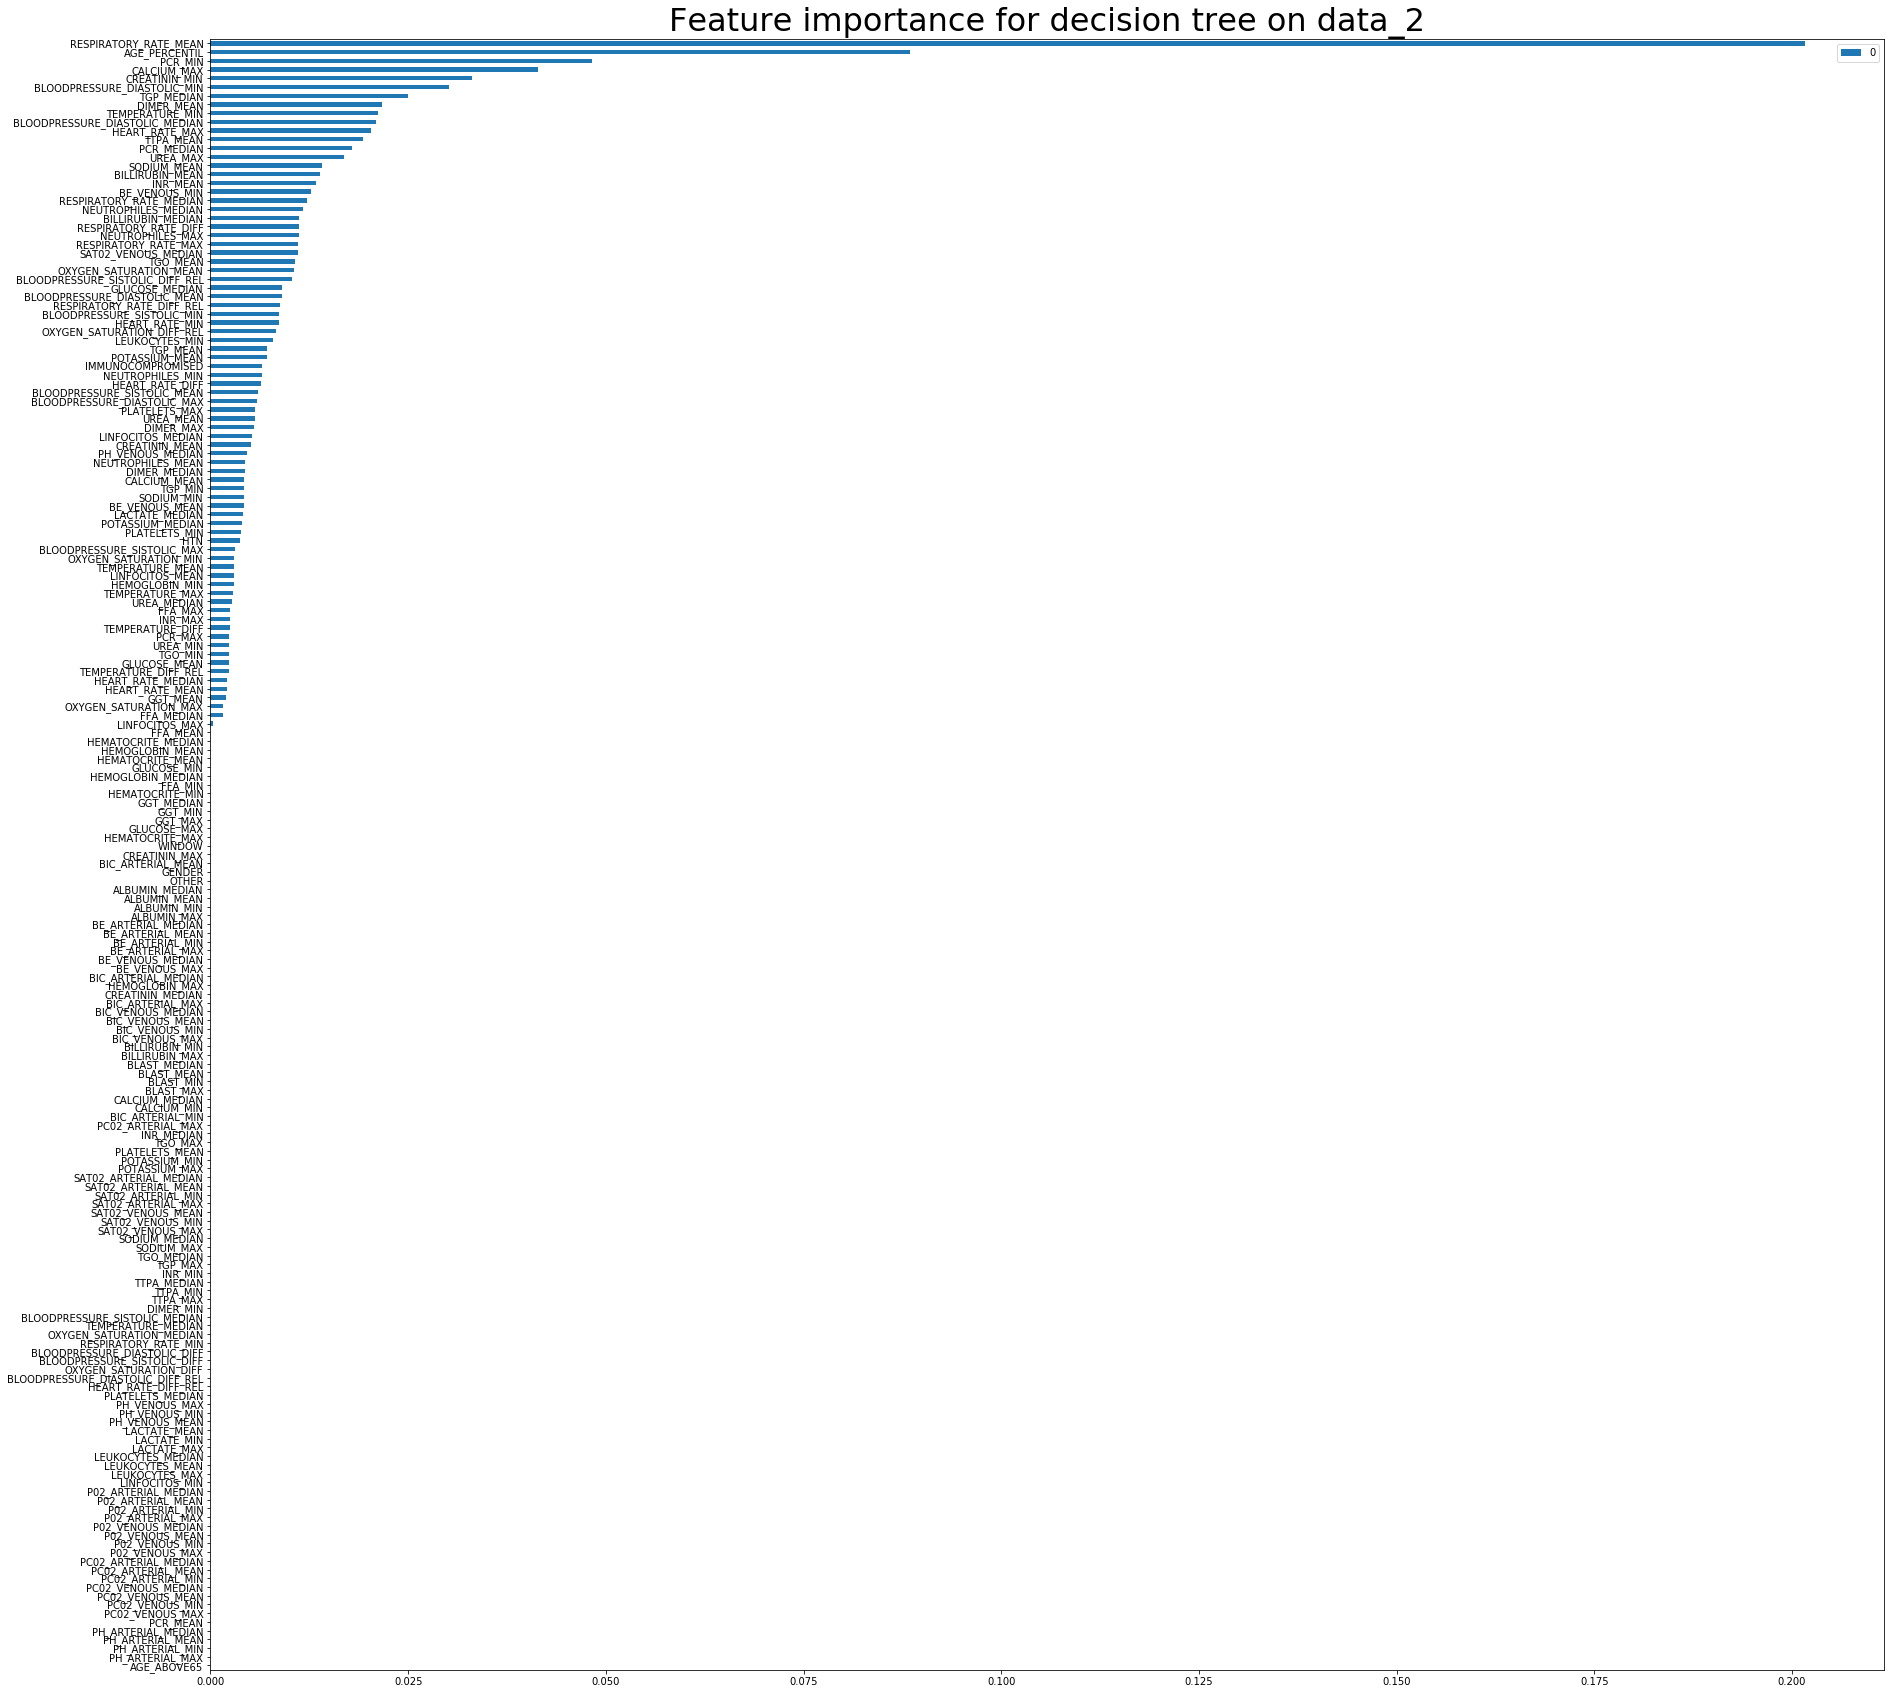

In [89]:
tree_fi=pd.DataFrame(data=tree_clf.feature_importances_, index=data_2.columns)
tree_fi.sort_values(by=0, ascending=True, inplace=True)
tree_fi.plot(kind = 'barh', figsize = (30, 30));
plt.title('Feature importance for decision tree on data_2', fontsize='32');

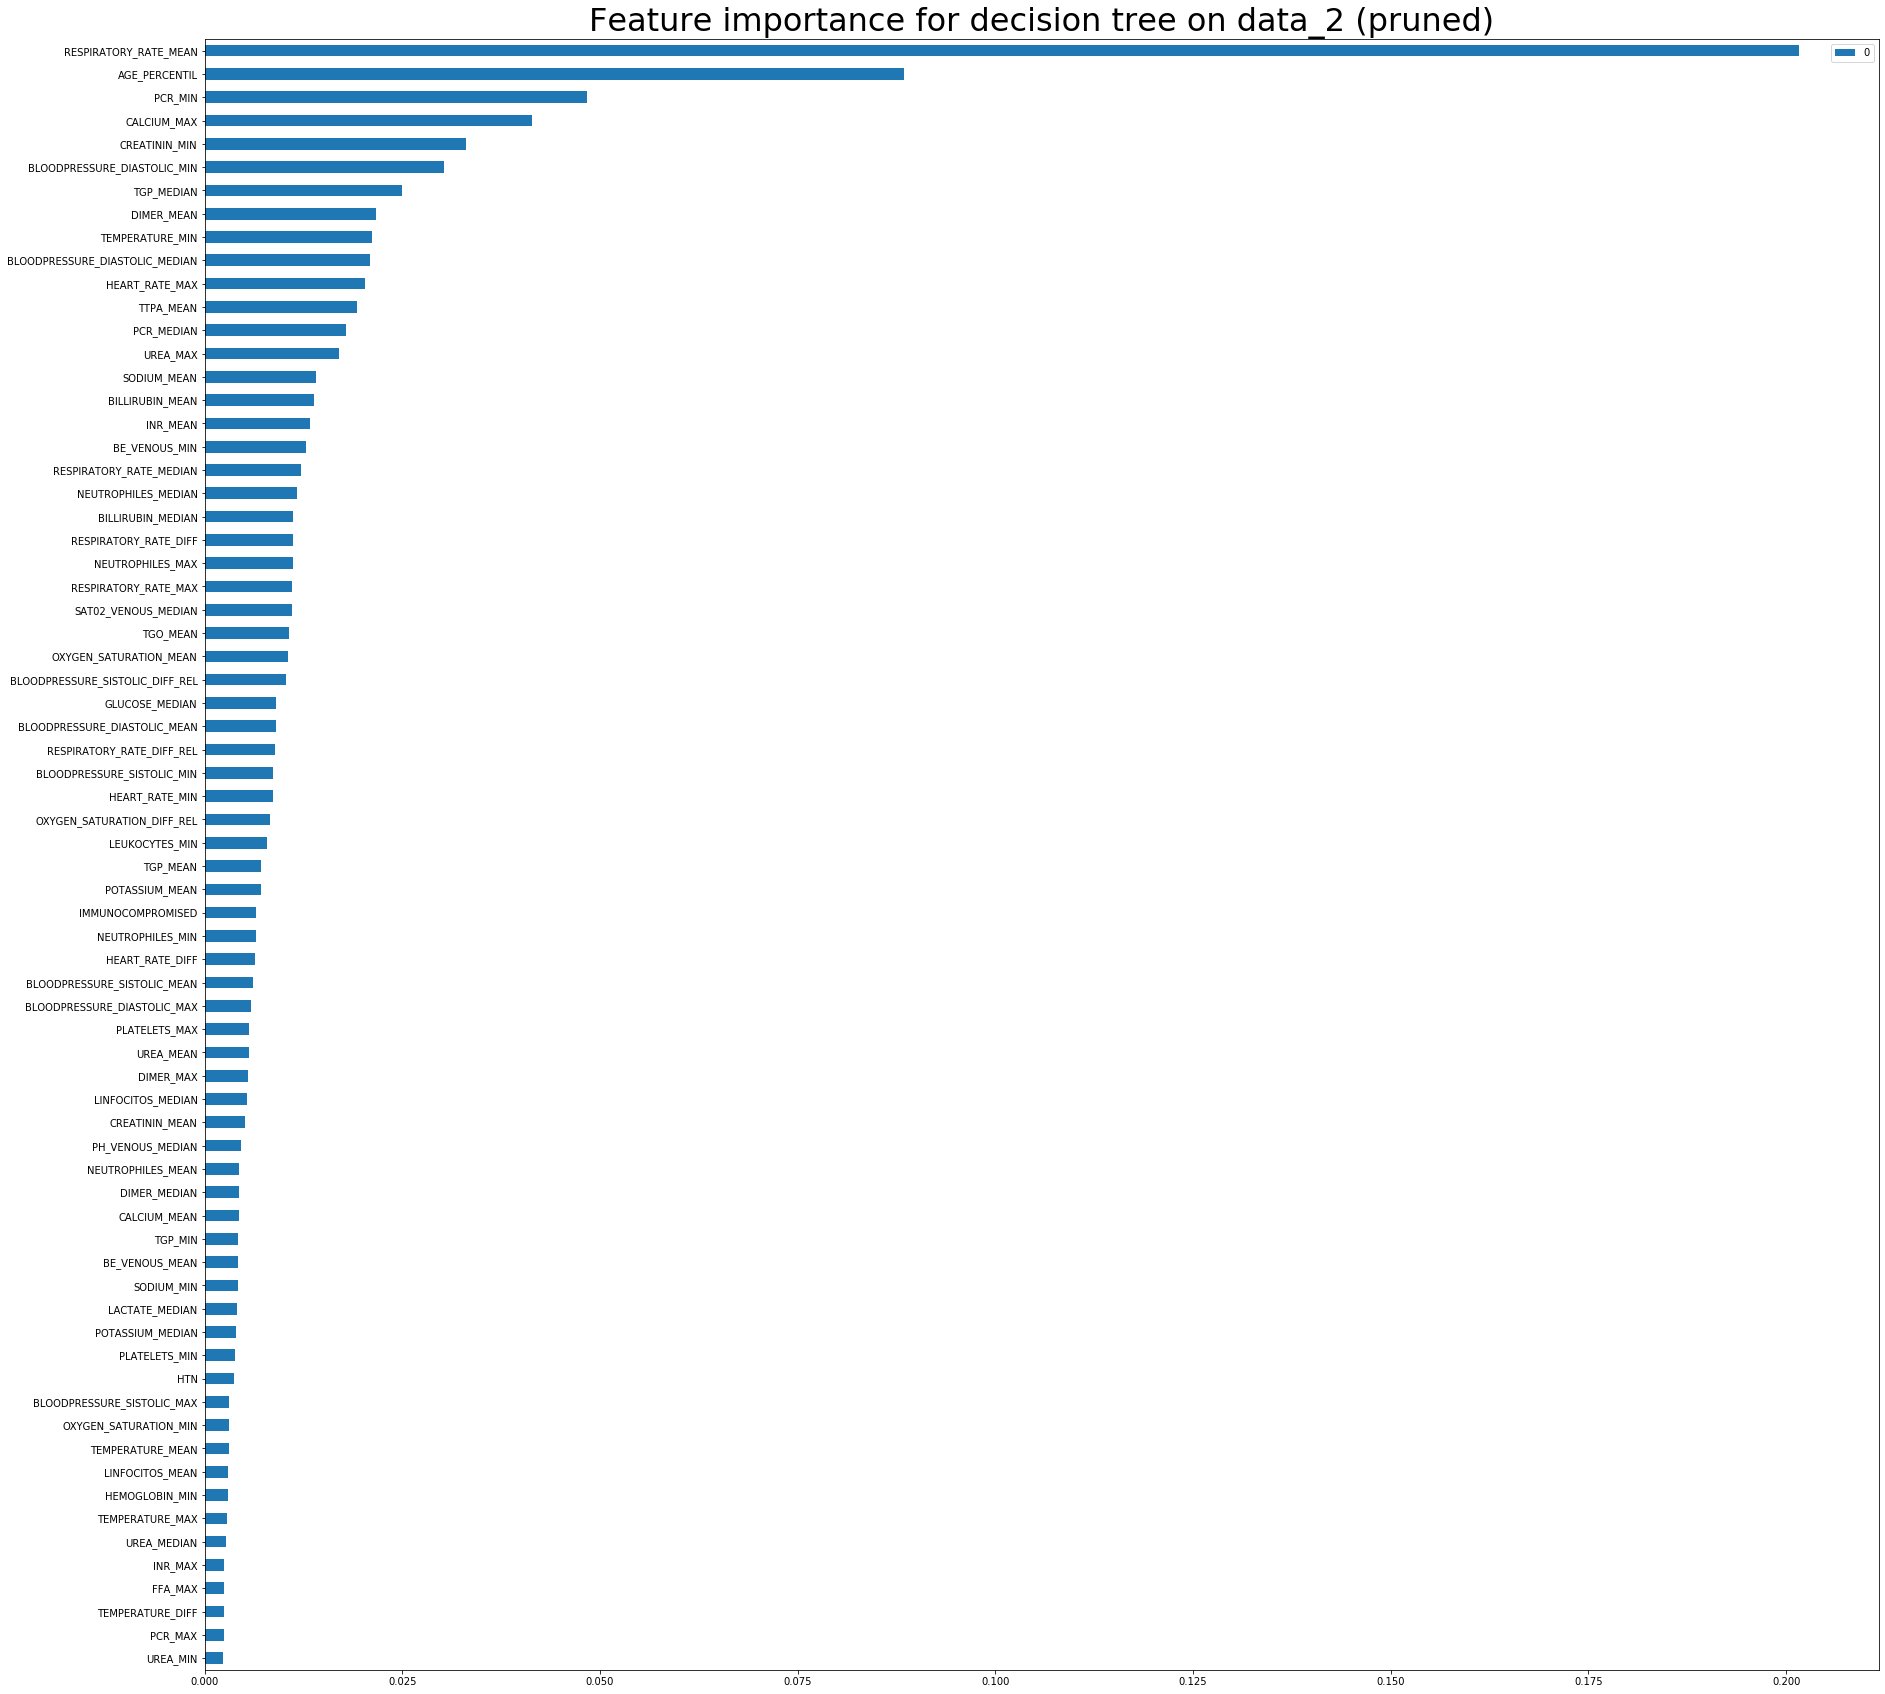

In [90]:
fi=pd.DataFrame(data=tree_clf.feature_importances_, index=data_2.columns)
fi.sort_values(by=0, ascending=False, inplace=True)
fi.head(70).iloc[::-1].plot(kind = 'barh', figsize = (30, 30));
plt.title('Feature importance for decision tree on data_2 (pruned)', fontsize='32');

In [91]:
fi.sort_values(by=0, ascending=False, inplace=True)
fi.head(10)

0
RESPIRATORY_RATE_MEAN           0.201604
AGE_PERCENTIL                   0.088416
PCR_MIN                         0.048305
CALCIUM_MAX                     0.041381
CREATININ_MIN                   0.033121
BLOODPRESSURE_DIASTOLIC_MIN     0.030227
TGP_MEDIAN                      0.024987
DIMER_MEAN                      0.021693
TEMPERATURE_MIN                 0.021136
BLOODPRESSURE_DIASTOLIC_MEDIAN  0.020922

**Checking some correlations:**

In [92]:
data_2['ICU'] = icu
data_2[['RESPIRATORY_RATE_MEAN', 'ICU']].corr()

RESPIRATORY_RATE_MEAN      ICU
RESPIRATORY_RATE_MEAN                1.00000  0.36921
ICU                                  0.36921  1.00000

In [93]:
data_2[['AGE_ABOVE65', 'ICU']].corr()

AGE_ABOVE65       ICU
AGE_ABOVE65     1.000000  0.291151
ICU             0.291151  1.000000

In [94]:
data_2[['BLOODPRESSURE_SISTOLIC_MIN', 'ICU']].corr()

BLOODPRESSURE_SISTOLIC_MIN       ICU
BLOODPRESSURE_SISTOLIC_MIN                    1.000000 -0.020224
ICU                                          -0.020224  1.000000

In [95]:
data_2[['LACTATE_MEAN', 'ICU']].corr()

LACTATE_MEAN     ICU
LACTATE_MEAN        1.0000 -0.3355
ICU                -0.3355  1.0000

**Testing the same model, with removing not important (as model says) features from dateset:**

In [96]:
ind = fi.iloc[:100].index
drop_icu_pid(data_2)
d = data_2[ind]

In [97]:
res = pd.DataFrame()
for train in range(10):
    X_train, X_test, y_train, y_test = train_test_split(d, icu, test_size=0.15, shuffle=True,
                                                       random_state=np.random.randint(100))
    tree_clf = tree.DecisionTreeClassifier()
    tree_clf = tree_clf.fit(X_train, y_train)
    pred = tree_clf.predict(X_test)
    acc, f1, prec, rec, roc = score(y_test, pred)
    res['Train: ' + str(train)] = [acc, f1, prec, rec, roc]
    
res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
res['Mean'] = res.mean(axis=1)
res['Std'] = res.std(axis=1)
res

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
Accuracy   0.923611  0.940972  0.916667  0.909722  0.916667  0.916667   
F1_score   0.924658  0.937729  0.919463  0.900763  0.911765  0.918919   
Precision  0.924658  0.934307  0.925676  0.900763  0.911765  0.925170   
Recall     0.924658  0.941176  0.913333  0.900763  0.911765  0.912752   
ROC_AUC    0.923596  0.940983  0.916812  0.908980  0.916409  0.916807   

           Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
Accuracy   0.881944  0.906250  0.895833  0.923611  0.913194  0.015372  
F1_score   0.885135  0.903915  0.881890  0.919708  0.910394  0.016672  
Precision  0.867550  0.894366  0.896000  0.940299  0.912055  0.021185  
Recall     0.903448  0.913669  0.868217  0.900000  0.908978  0.017848  
ROC_AUC    0.881794  0.906499  0.893228  0.922973  0.912808  0.015679

**Results are not better.**

* **Trying data2_pca on this model:**

In [98]:
drop_icu_pid(data2_pca)
res = pd.DataFrame()
for train in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data2_pca, icu, test_size=0.15, shuffle=True,
                                                       random_state=np.random.randint(100))
    tree_clf = tree.DecisionTreeClassifier()
    tree_clf = tree_clf.fit(X_train, y_train)
    pred = tree_clf.predict(X_test)
    acc, f1, prec, rec, roc = score(y_test, pred)
    res['Train: ' + str(train)] = [acc, f1, prec, rec, roc]
    
res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
res['Mean'] = res.mean(axis=1)
res['Std'] = res.std(axis=1)
res

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
Accuracy   0.812500  0.850694  0.767361  0.815972  0.822917  0.840278   
F1_score   0.813793  0.849123  0.763251  0.826230  0.814545  0.844595   
Precision  0.786667  0.870504  0.812030  0.834437  0.829630  0.856164   
Recall     0.842857  0.828767  0.720000  0.818182  0.800000  0.833333   
ROC_AUC    0.813320  0.851003  0.769420  0.815807  0.822297  0.840580   

           Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
Accuracy   0.805556  0.833333  0.819444  0.812500  0.818056  0.021472  
F1_score   0.822785  0.834483  0.827815  0.805755  0.820237  0.022938  
Precision  0.860927  0.840278  0.816993  0.811594  0.831922  0.024655  
Recall     0.787879  0.828767  0.838926  0.800000  0.809871  0.034672  
ROC_AUC    0.808574  0.833398  0.818744  0.812162  0.818531  0.020885

**Not better.**

* **Trying data (not data_2) on this model:**

In [99]:
drop_icu_pid(data)
res = pd.DataFrame()
for train in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data, icu, test_size=0.15, shuffle=True,
                                                       random_state=np.random.randint(100))
    tree_clf = tree.DecisionTreeClassifier()
    tree_clf = tree_clf.fit(X_train, y_train)
    pred = tree_clf.predict(X_test)
    acc, f1, prec, rec, roc = score(y_test, pred)
    res['Train: ' + str(train)] = [acc, f1, prec, rec, roc]
    
res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
res['Mean'] = res.mean(axis=1)
res['Std'] = res.std(axis=1)
res

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
Accuracy   0.888889  0.909722  0.909722  0.875000  0.895833  0.920139   
F1_score   0.885714  0.917197  0.918239  0.877551  0.892857  0.919298   
Precision  0.939394  0.941176  0.929936  0.914894  0.892857  0.916084   
Recall     0.837838  0.894410  0.906832  0.843137  0.892857  0.922535   
ROC_AUC    0.890347  0.911772  0.910109  0.877124  0.895753  0.920172   

           Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
Accuracy   0.888889  0.913194  0.913194  0.913194  0.902778  0.013889  
F1_score   0.873016  0.914676  0.914676  0.916388  0.902961  0.017606  
Precision  0.894309  0.943662  0.930556  0.925676  0.922854  0.017273  
Recall     0.852713  0.887417  0.899329  0.907285  0.884435  0.027856  
ROC_AUC    0.885476  0.914512  0.913693  0.913496  0.903245  0.014029

**Not promising.**

* **Trying data_pca on this model:**

In [100]:
res = pd.DataFrame()
for train in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data_pca, icu, test_size=0.15, shuffle=True,
                                                       random_state=np.random.randint(100))
    tree_clf = tree.DecisionTreeClassifier()
    tree_clf = tree_clf.fit(X_train, y_train)
    pred = tree_clf.predict(X_test)
    acc, f1, prec, rec, roc = score(y_test, pred)
    res['Train: ' + str(train)] = [acc, f1, prec, rec, roc]
    
res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
res['Mean'] = res.mean(axis=1)
res['Std'] = res.std(axis=1)
res

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
Accuracy   0.781250  0.770833  0.819444  0.798611  0.784722  0.843750   
F1_score   0.777385  0.782895  0.805970  0.789855  0.765152  0.836364   
Precision  0.785714  0.788079  0.794118  0.741497  0.795276  0.839416   
Recall     0.769231  0.777778  0.818182  0.844961  0.737226  0.833333   
ROC_AUC    0.781167  0.770370  0.819347  0.802984  0.782520  0.843333   

           Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
Accuracy   0.805556  0.850694  0.809028  0.791667  0.805556  0.024845  
F1_score   0.805556  0.849123  0.813559  0.805195  0.803105  0.024572  
Precision  0.805556  0.876812  0.789474  0.810458  0.802640  0.033854  
Recall     0.805556  0.823129  0.839161  0.800000  0.804856  0.032723  
ROC_AUC    0.805556  0.851281  0.809236  0.790977  0.805677  0.025108

**Didn't help.**

* **Lets try PCA with keeping more varaince: 99.9 %**

In [101]:
drop_icu_pid(data_2)
pca = PCA(n_components=.999, svd_solver='full')
pca.fit(data_2)
data2_pca_999 = pca.transform(data_2)
data2_new_999 = pca.inverse_transform(data2_pca_999)
data2_pca_999.shape

(1915, 70)

In [102]:
res = pd.DataFrame()
for train in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data2_pca_999, icu, test_size=0.15, shuffle=True,
                                                       random_state=np.random.randint(100))
    tree_clf = tree.DecisionTreeClassifier()
    tree_clf = tree_clf.fit(X_train, y_train)
    pred = tree_clf.predict(X_test)
    acc, f1, prec, rec, roc = score(y_test, pred)
    res['Train: ' + str(train)] = [acc, f1, prec, rec, roc]
    
res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
res['Mean'] = res.mean(axis=1)
res['Std'] = res.std(axis=1)
res

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
Accuracy   0.781250  0.812500  0.843750  0.795139  0.850694  0.840278   
F1_score   0.782007  0.811189  0.843206  0.791519  0.846975  0.841379   
Precision  0.795775  0.828571  0.858156  0.794326  0.862319  0.847222   
Recall     0.768707  0.794521  0.828767  0.788732  0.832168  0.835616   
ROC_AUC    0.781517  0.812753  0.843961  0.795051  0.850567  0.840343   

           Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
Accuracy   0.850694  0.836806  0.805556  0.829861  0.824653  0.023254  
F1_score   0.852234  0.840678  0.816993  0.835017  0.826120  0.023199  
Precision  0.855172  0.849315  0.806452  0.849315  0.834662  0.025094  
Recall     0.849315  0.832215  0.827815  0.821192  0.817905  0.023987  
ROC_AUC    0.850714  0.836971  0.804418  0.830304  0.824660  0.023327

**No improvement.**

* **Now, we are going to try RandomForestClassifier:**

In [103]:
from sklearn.ensemble import RandomForestClassifier

drop_icu_pid(data_2)
res = pd.DataFrame()
for train in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data_2, icu, test_size=0.15, shuffle=True,
                                                       random_state=np.random.randint(100))
    rfc_clf = RandomForestClassifier(bootstrap=True, random_state=np.random.randint(100))
    rfc_clf = rfc_clf.fit(X_train, y_train)
    pred = rfc_clf.predict(X_test)
    acc, f1, prec, rec, roc = score(y_test, pred)
    res['Train: ' + str(train)] = [acc, f1, prec, rec, roc]
    
res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
res['Mean'] = res.mean(axis=1)
res['Std'] = res.std(axis=1)
res

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
Accuracy   0.975694  0.958333  0.972222  0.937500  0.961806  0.986111   
F1_score   0.976744  0.958621  0.972414  0.930769  0.958801  0.986577   
Precision  0.973510  0.965278  0.965753  0.909774  0.955224  0.993243   
Recall     0.980000  0.952055  0.979167  0.952756  0.962406  0.980000   
ROC_AUC    0.975507  0.958422  0.972222  0.939111  0.961848  0.986377   

           Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
Accuracy   0.975694  0.954861  0.975694  0.940972  0.963889  0.015230  
F1_score   0.974910  0.949416  0.975610  0.943144  0.962701  0.016697  
Precision  0.985507  0.945736  0.972222  0.921569  0.958782  0.025218  
Recall     0.964539  0.953125  0.979021  0.965753  0.966882  0.011304  
ROC_AUC    0.975467  0.954688  0.975717  0.940623  0.963998  0.015026

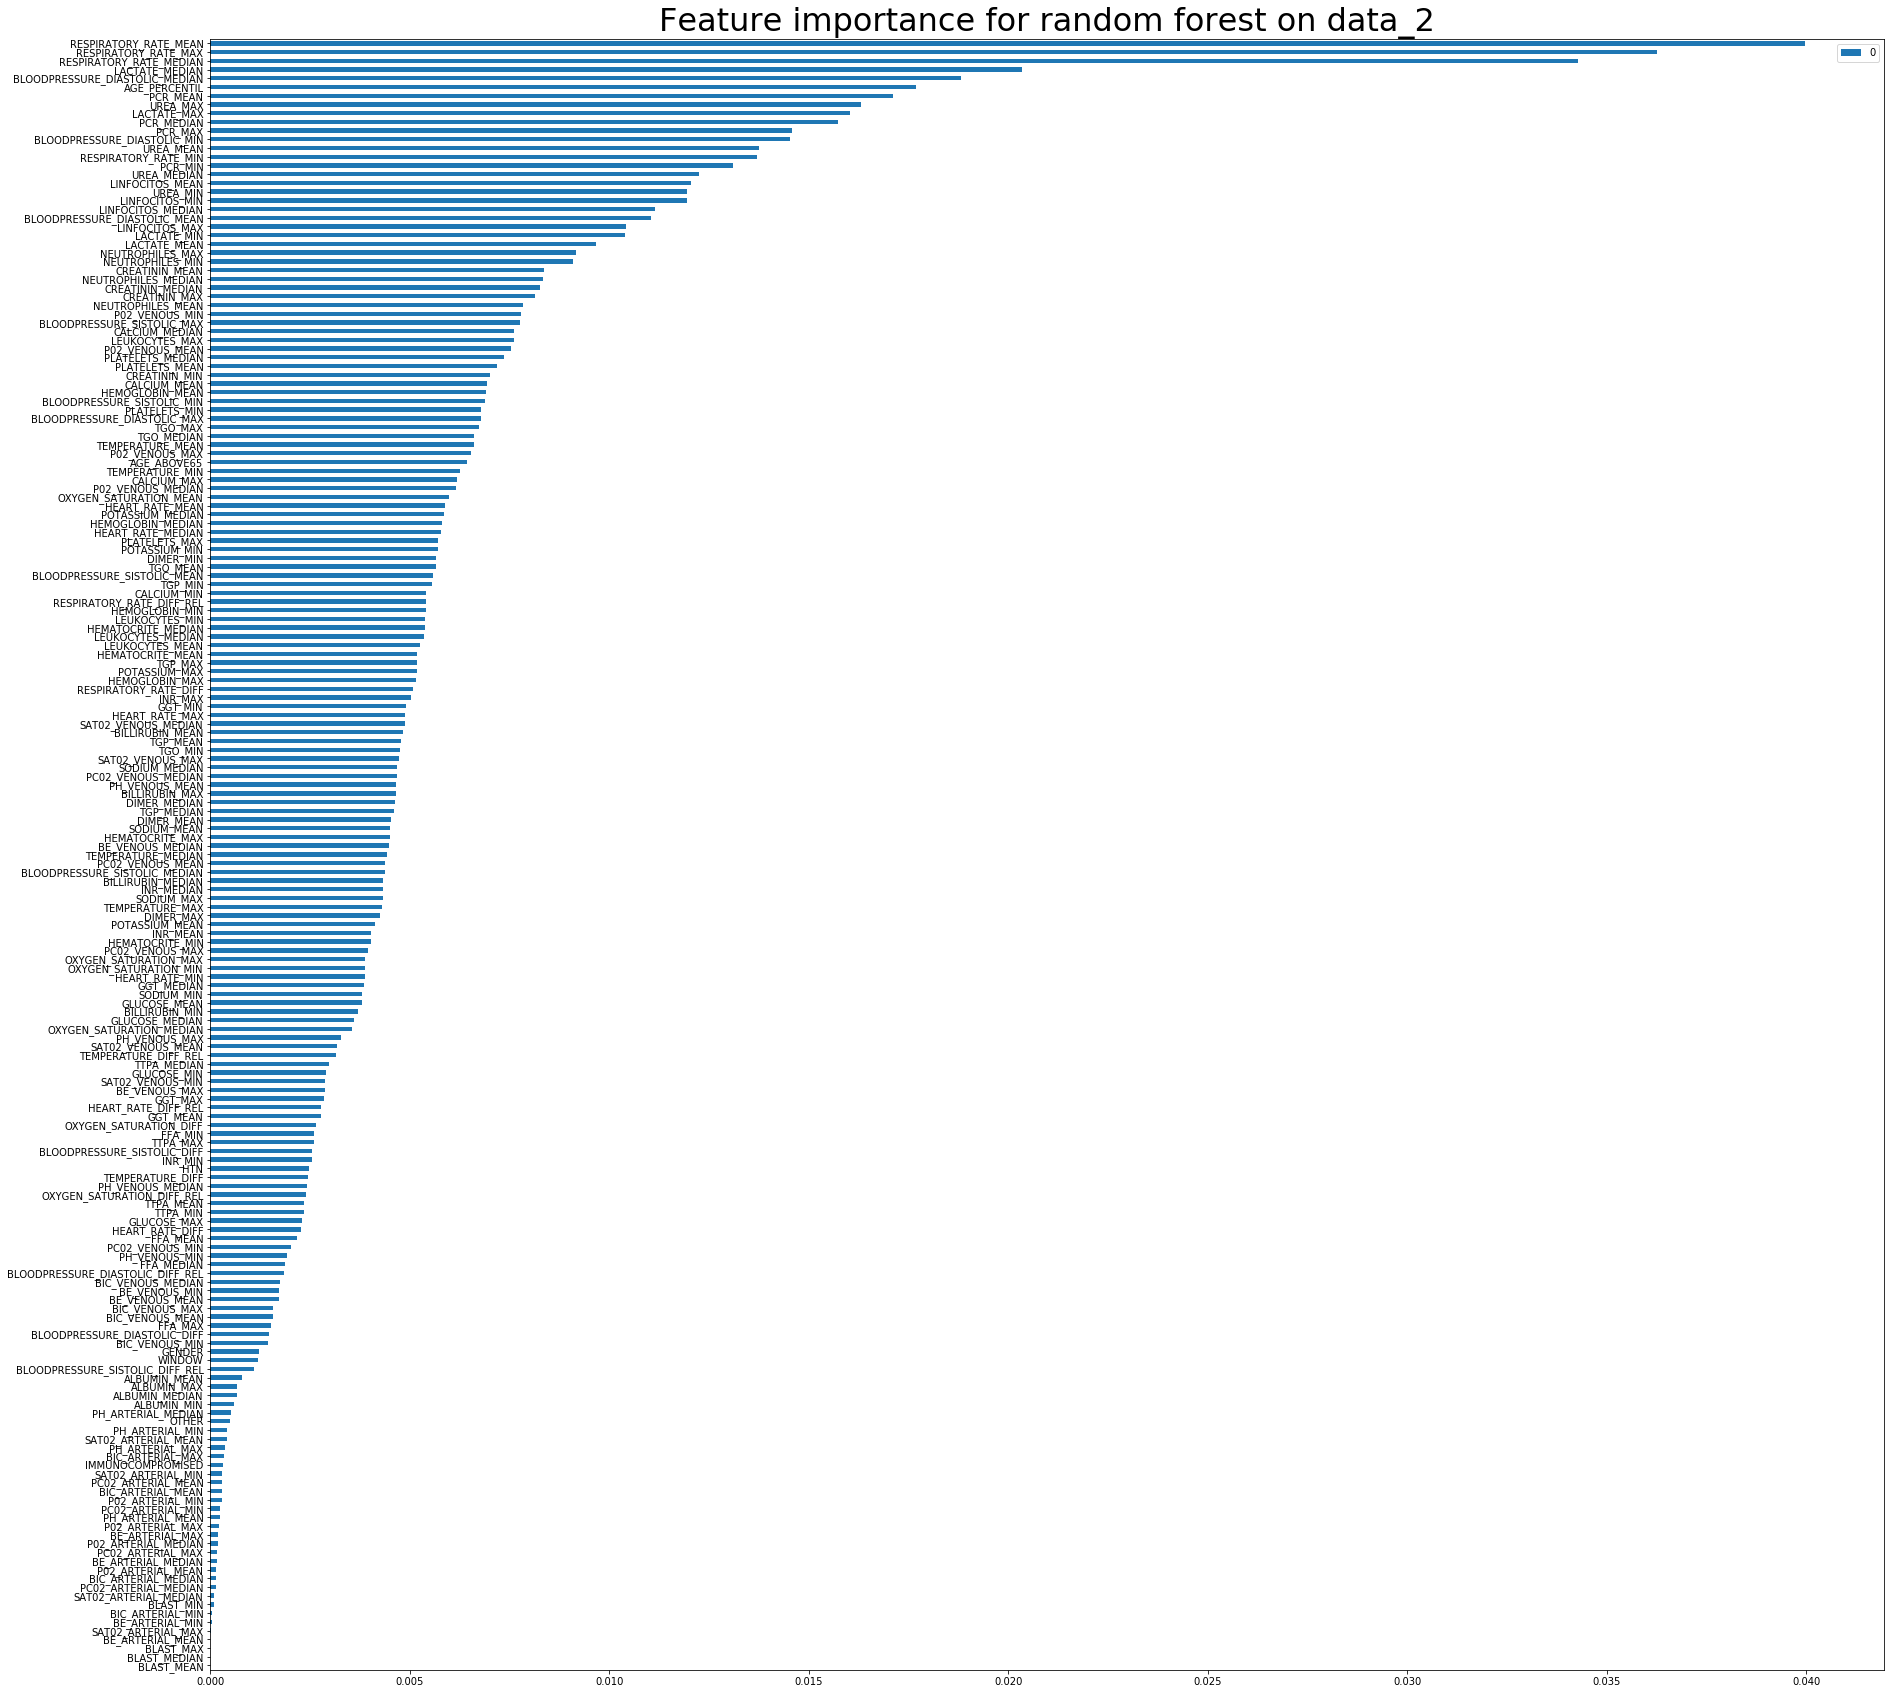

In [104]:
rfc_fi=pd.DataFrame(data=rfc_clf.feature_importances_, index=data_2.columns)
rfc_fi.sort_values(by=0, ascending=True, inplace=True)
rfc_fi.plot(kind = 'barh', figsize = (30, 30));
plt.title('Feature importance for random forest on data_2', fontsize='32');

**Results are better than single decision tree, and as we see, more features are included in random forest.<br>Now, testing if removal of not important features will help random forest classifier or not:**

In [105]:
cols = fi.iloc[::-1].index[:100]
d = data_2[cols]
d.head()

WINDOW  PLATELETS_MEAN  PC02_ARTERIAL_MAX  PH_VENOUS_MAX  CALCIUM_MEDIAN  \
0    0.00        0.414458           0.470588       0.500000        0.275862   
1    0.25        0.414458           0.470588       0.500000        0.275862   
2    0.50        0.414458           0.470588       0.500000        0.275862   
3    0.75        0.414458           0.470588       0.500000        0.275862   
4    1.00        0.477108           0.058824       0.555556        0.517241   

   BIC_VENOUS_MAX  BILLIRUBIN_MIN  BILLIRUBIN_MAX  BLAST_MEDIAN  BLAST_MEAN  \
0             0.5        0.303819        0.303819           0.0         0.0   
1             0.5        0.303819        0.303819           0.0         0.0   
2             0.5        0.303819        0.303819           0.0         0.0   
3             0.5        0.303819        0.303819           0.0         0.0   
4             0.3        0.104167        0.104167           0.0         0.0   

   ...  BE_VENOUS_MEDIAN  BE_VENOUS_MAX  BIC_ARTERIAL_MEDIAN  \
0  ...          0.000000       0.000000                  0.5   
1  ...          0.000000       0.000000                  0.5   
2  ...          0.000000       0.000000                  0.5   
3  ...          0.000000       0.000000                  0.5   
4  ...          0.342105       0.342105                  0.5   

   BIC_ARTERIAL_MEAN  BIC_ARTERIAL_MIN  BE_ARTERIAL_MAX  HEMATOCRITE_MEDIAN  \
0                0.5               0.5         0.000000            0.726923   
1                0.5               0.5         0.000000            0.726923   
2                0.5               0.5         0.000000            0.726923   
3                0.5               0.5         0.000000            0.726923   
4                0.5               0.5         0.444444            0.350000   

   GLUCOSE_MIN  PC02_VENOUS_MEDIAN  PC02_ARTERIAL_MIN  
0     0.258929            0.517241           0.470588  
1     0.258929            0.517241           0.470588  
2     0.258929            0.517241           0.470588  
3     0.258929            0.517241           0.470588  
4     0.258929            0.344828           0.058824  

[5 rows x 100 columns]

In [106]:
res = pd.DataFrame()
for train in range(10):
    X_train, X_test, y_train, y_test = train_test_split(d, icu, test_size=0.15, shuffle=True,
                                                       random_state=np.random.randint(100))
    rfc_clf = RandomForestClassifier(bootstrap=True, random_state=np.random.randint(100))
    rfc_clf = rfc_clf.fit(X_train, y_train)
    pred = rfc_clf.predict(X_test)
    acc, f1, prec, rec, roc = score(y_test, pred)
    res['Train: ' + str(train)] = [acc, f1, prec, rec, roc]
    
res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
res['Mean'] = res.mean(axis=1)
res['Std'] = res.std(axis=1)
res

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
Accuracy   0.972222  0.965278  0.968750  0.961806  0.961806  0.972222   
F1_score   0.972414  0.963768  0.969697  0.957854  0.962457  0.972028   
Precision  0.979167  0.956835  0.972973  0.961538  0.965753  0.958621   
Recall     0.965753  0.970803  0.966443  0.954198  0.959184  0.985816   
ROC_AUC    0.972313  0.965534  0.968833  0.961176  0.961861  0.972500   

           Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
Accuracy   0.951389  0.961806  0.961806  0.947917  0.962500  0.007575  
F1_score   0.956250  0.962199  0.962199  0.944649  0.962352  0.007885  
Precision  0.932927  0.958904  0.965517  0.927536  0.957977  0.015364  
Recall     0.980769  0.965517  0.958904  0.962406  0.966979  0.009348  
ROC_AUC    0.948718  0.961780  0.961846  0.948945  0.962351  0.007888

**Removal of not important features didn't help.**

* **Trying AdaBoost classifier:**

In [107]:
from sklearn.ensemble import AdaBoostClassifier

drop_icu_pid(data_2)
res = pd.DataFrame()
for train in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data_2, icu, test_size=0.15, shuffle=True,
                                                       random_state=np.random.randint(100))
    ada_clf = AdaBoostClassifier(random_state=np.random.randint(100))
    ada_clf = ada_clf.fit(X_train, y_train)
    pred = ada_clf.predict(X_test)
    acc, f1, prec, rec, roc = score(y_test, pred)
    res['Train: ' + str(train)] = [acc, f1, prec, rec, roc]
    
res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
res['Mean'] = res.mean(axis=1)
res['Std'] = res.std(axis=1)
res

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
Accuracy   0.888889  0.895833  0.847222  0.864583  0.878472  0.892361   
F1_score   0.887324  0.880952  0.841727  0.864111  0.885246  0.889680   
Precision  0.875000  0.902439  0.841727  0.855172  0.900000  0.925926   
Recall     0.900000  0.860465  0.841727  0.873239  0.870968  0.856164   
ROC_AUC    0.889189  0.892497  0.847038  0.864702  0.879093  0.892871   

           Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
Accuracy   0.850694  0.864583  0.906250  0.864583  0.875347  0.018983  
F1_score   0.848057  0.863158  0.909699  0.863158  0.873311  0.019787  
Precision  0.857143  0.825503  0.931507  0.825503  0.873992  0.037247  
Recall     0.839161  0.904412  0.888889  0.904412  0.873944  0.023482  
ROC_AUC    0.850615  0.866680  0.907407  0.866680  0.875677  0.018736

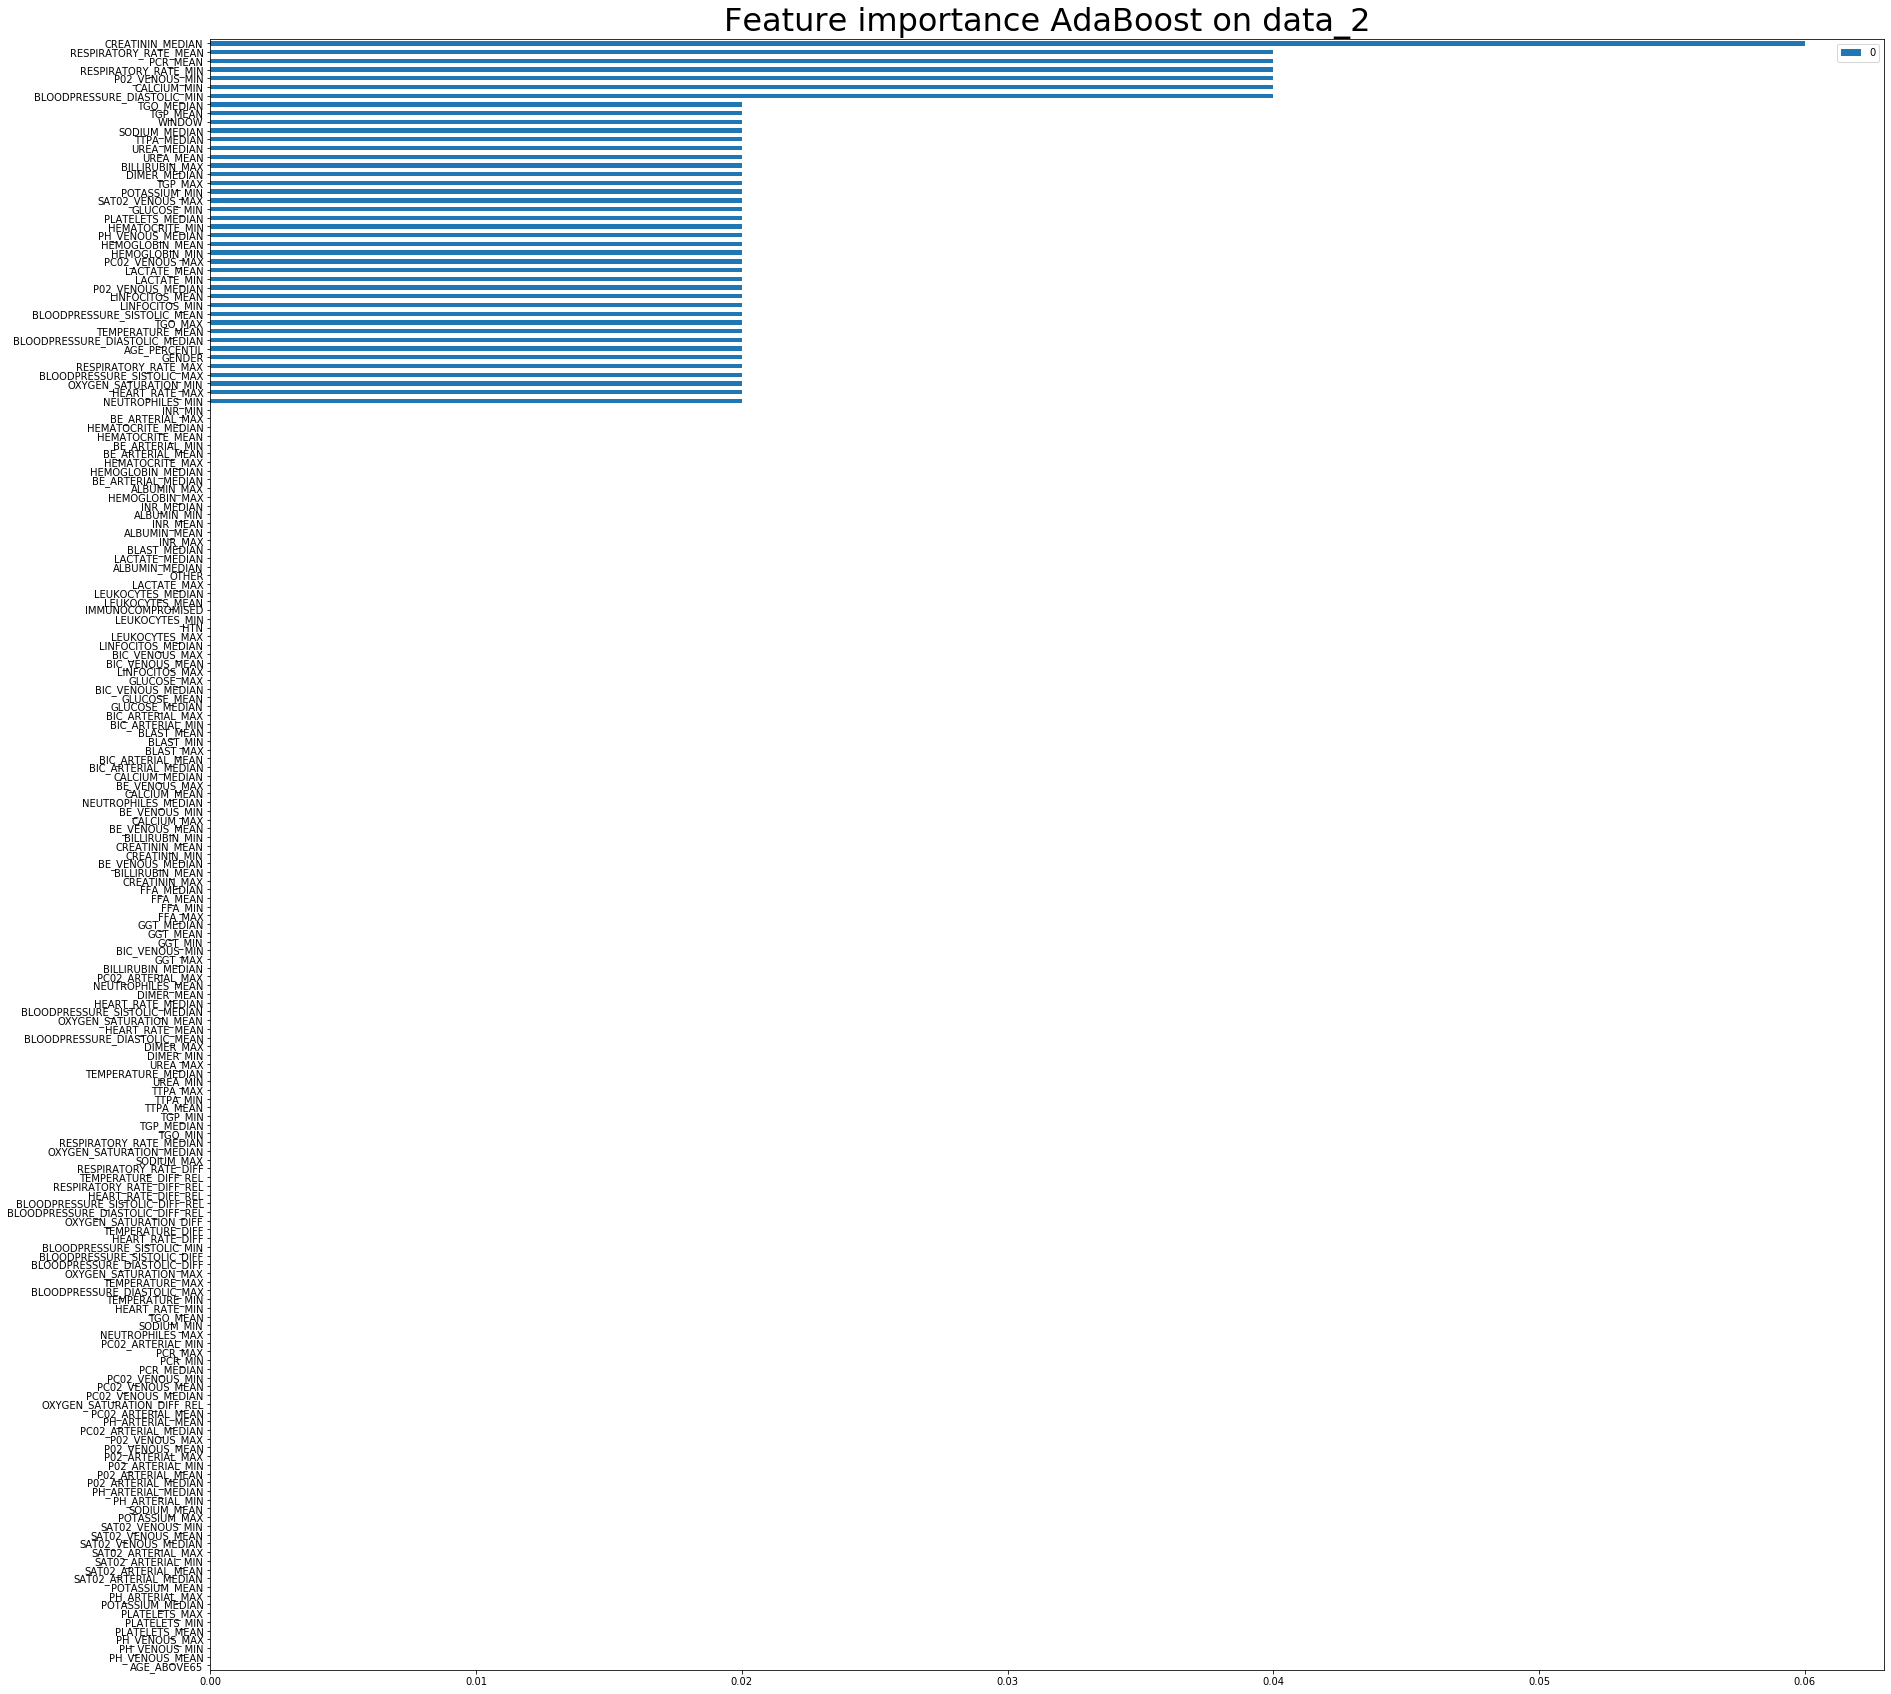

In [108]:
ada_fi=pd.DataFrame(data=ada_clf.feature_importances_, index=data_2.columns)
ada_fi.sort_values(by=0, ascending=True, inplace=True)
ada_fi.plot(kind = 'barh', figsize = (30, 30));
plt.title('Feature importance AdaBoost on data_2', fontsize='32');

* **Gathering the featurs that were present in important features of all three models that we tested, and check how that works:**

In [109]:
features = []
for col in tree_fi[np.array(tree_fi > 0)].index:
    if col in rfc_fi[np.array(rfc_fi > 0)].index and col in ada_fi[np.array(ada_fi > 0)].index:
        features.append(col)
             
features

['UREA_MEDIAN',
 'HEMOGLOBIN_MIN',
 'LINFOCITOS_MEAN',
 'TEMPERATURE_MEAN',
 'OXYGEN_SATURATION_MIN',
 'BLOODPRESSURE_SISTOLIC_MAX',
 'DIMER_MEDIAN',
 'PH_VENOUS_MEDIAN',
 'UREA_MEAN',
 'BLOODPRESSURE_SISTOLIC_MEAN',
 'NEUTROPHILES_MIN',
 'TGP_MEAN',
 'RESPIRATORY_RATE_MAX',
 'HEART_RATE_MAX',
 'BLOODPRESSURE_DIASTOLIC_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_MIN',
 'AGE_PERCENTIL',
 'RESPIRATORY_RATE_MEAN']

In [110]:
d = data_2[features]
d

UREA_MEDIAN  HEMOGLOBIN_MIN  LINFOCITOS_MEAN  TEMPERATURE_MEAN  \
0        0.343434        0.780220         0.133117          0.186378   
1        0.343434        0.780220         0.133117          0.874367   
2        0.343434        0.780220         0.133117          0.874367   
3        0.343434        0.780220         0.133117          0.335941   
4        0.343434        0.362637         0.558442          0.453970   
...           ...             ...              ...               ...   
1910     0.252525        0.538462         0.490260          0.874367   
1911     0.252525        0.538462         0.490260          0.545329   
1912     0.252525        0.538462         0.490260          0.545329   
1913     0.252525        0.538462         0.490260          0.664979   
1914     0.404040        0.417582         0.571429          0.468055   

      OXYGEN_SATURATION_MIN  BLOODPRESSURE_SISTOLIC_MAX  DIMER_MEDIAN  \
0                  0.857143                    0.442478      0.013467   
1                  0.771429                    0.442478      0.013467   
2                  0.771429                    0.442478      0.013467   
3                  0.857143                    0.442478      0.013467   
4                  0.714286                    0.442478      0.008570   
...                     ...                         ...           ...   
1910               0.885714                    0.407080      0.054071   
1911               0.771429                    0.353982      0.054071   
1912               0.857143                    0.442478      0.054071   
1913               0.714286                    0.353982      0.054071   
1914               0.685714                    0.433628      0.295246   

      PH_VENOUS_MEDIAN  UREA_MEAN  BLOODPRESSURE_SISTOLIC_MEAN  \
0             0.500000   0.343434                     0.572519   
1             0.500000   0.343434                     0.572519   
2             0.500000   0.343434                     0.572519   
3             0.500000   0.343434                     0.572519   
4             0.555556   0.343434                     0.492310   
...                ...        ...                          ...   
1910          0.611111   0.252525                     0.526718   
1911          0.611111   0.252525                     0.458015   
1912          0.611111   0.252525                     0.572519   
1913          0.611111   0.252525                     0.458015   
1914          0.500000   0.404040                     0.343034   

      NEUTROPHILES_MIN  TGP_MEAN  RESPIRATORY_RATE_MAX  HEART_RATE_MAX  \
0             0.254856  0.072727              0.250000        0.417582   
1             0.254856  0.072727              0.250000        0.505495   
2             0.254856  0.072727              0.250000        0.505495   
3             0.254856  0.072727              0.250000        0.505495   
4             0.254856  0.127273              0.875000        0.956044   
...                ...       ...                   ...             ...   
1910          0.168609  0.060606              0.291667        0.615385   
1911          0.168609  0.060606              0.250000        0.516484   
1912          0.168609  0.060606              0.250000        0.483516   
1913          0.168609  0.060606              0.208333        0.472527   
1914          0.124320  0.063636              0.333333        0.626374   

      BLOODPRESSURE_DIASTOLIC_MEDIAN  BLOODPRESSURE_DIASTOLIC_MIN  \
0                           0.634615                     0.676923   
1                           0.826923                     0.830769   
2                           0.826923                     0.830769   
3                           0.826923                     0.830769   
4                           0.346154                     0.246154   
...                              ...                          ...   
1910                        0.576923                     0.630769   
1911                        0.

**Lets try a decision tree:**

In [111]:
res = pd.DataFrame()
for train in range(10):
    X_train, X_test, y_train, y_test = train_test_split(d, icu, test_size=0.15, shuffle=True,
                                                       random_state=np.random.randint(100))
    tree_clf = tree.DecisionTreeClassifier()
    tree_clf = tree_clf.fit(X_train, y_train)
    pred = tree_clf.predict(X_test)
    acc, f1, prec, rec, roc = score(y_test, pred)
    res[str(train)] = [acc, f1, prec, rec, roc]
    
res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
res['Mean'] = res.mean(axis=1)
res['Std'] = res.std(axis=1)
res

0         1         2         3         4         5  \
Accuracy   0.881944  0.892361  0.885417  0.878472  0.916667  0.871528   
F1_score   0.887417  0.900958  0.886598  0.868914  0.915493  0.881029   
Precision  0.864516  0.881250  0.889655  0.865672  0.915493  0.878205   
Recall     0.911565  0.921569  0.883562  0.872180  0.915493  0.883871   
ROC_AUC    0.881314  0.890414  0.885443  0.878026  0.916651  0.870507   

                  6         7         8         9      Mean       Std  
Accuracy   0.885417  0.888889  0.871528  0.878472  0.885069  0.012369  
F1_score   0.886598  0.886525  0.872852  0.874552  0.886094  0.013104  
Precision  0.889655  0.880282  0.875862  0.890511  0.883110  0.013882  
Recall     0.883562  0.892857  0.869863  0.859155  0.889368  0.019775  
ROC_AUC    0.885443  0.888996  0.871551  0.878208  0.884655  0.012432

**And AdaBoost again:**

In [112]:
res = pd.DataFrame()
for train in range(10):
    X_train, X_test, y_train, y_test = train_test_split(d, icu, test_size=0.15, shuffle=True,
                                                       random_state=np.random.randint(100))
    ada_clf = AdaBoostClassifier(random_state=np.random.randint(100))
    ada_clf = ada_clf.fit(X_train, y_train)
    pred = ada_clf.predict(X_test)
    acc, f1, prec, rec, roc = score(y_test, pred)
    res['Train: ' + str(train)] = [acc, f1, prec, rec, roc]
    
res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
res['Mean'] = res.mean(axis=1)
res['Std'] = res.std(axis=1)
res

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
Accuracy   0.840278  0.798611  0.826389  0.763889  0.857639  0.833333   
F1_score   0.848684  0.792857  0.801587  0.774834  0.839216  0.824818   
Precision  0.860000  0.822222  0.814516  0.801370  0.877049  0.856061   
Recall     0.837662  0.765517  0.789062  0.750000  0.804511  0.795775   
ROC_AUC    0.840473  0.798843  0.822656  0.765152  0.853869  0.832819   

           Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
Accuracy   0.781250  0.788194  0.812500  0.791667  0.809375  0.028099  
F1_score   0.783505  0.782918  0.813793  0.802632  0.806484  0.023561  
Precision  0.820144  0.797101  0.825175  0.853147  0.832679  0.025651  
Recall     0.750000  0.769231  0.802721  0.757764  0.782224  0.027099  
ROC_AUC    0.783088  0.788064  0.812708  0.796205  0.809388  0.026588

**No improvement captured in comparing with full-feature dataset.**

**So far, we haven't found any avidence that shows reducing number of features of the dataset will help us.**

* **Now, lets try re-starting the hole process from raw_data that we kept from initial dataset, but this time, instead of replacinng null values, we will drop columns that have more than 50% null values:**

In [113]:
(raw_data.isna().sum() / len(data)).sort_values(ascending=False).head(10)

tags                  0.738903
PC02_VENOUS_MEDIAN    0.576501
PH_ARTERIAL_MAX       0.576501
PCR_MEDIAN            0.576501
PCR_MEAN              0.576501
PCR_MIN               0.576501
PCR_MAX               0.576501
PH_ARTERIAL_MEDIAN    0.576501
PH_ARTERIAL_MEAN      0.576501
PH_ARTERIAL_MIN       0.576501
dtype: float64

In [114]:
ind = (raw_data.isna().sum() / len(data)) > 0.5

In [115]:
to_drop = []
for col in raw_data.columns[ind]:
    if col in data_2.columns:
        to_drop.append(col)

In [116]:
data_3 = data_2.copy()
data_3.drop(to_drop, axis=1, inplace=True)

In [117]:
data_3

AGE_ABOVE65  AGE_PERCENTIL  GENDER  HTN  IMMUNOCOMPROMISED  OTHER  \
0             1.0       0.555556     0.0  0.0                0.0    1.0   
1             1.0       0.555556     0.0  0.0                0.0    1.0   
2             1.0       0.555556     0.0  0.0                0.0    1.0   
3             1.0       0.555556     0.0  0.0                0.0    1.0   
4             1.0       0.555556     0.0  0.0                0.0    1.0   
...           ...            ...     ...  ...                ...    ...   
1910          0.0       0.444444     1.0  0.0                0.0    1.0   
1911          0.0       0.444444     1.0  0.0                0.0    1.0   
1912          0.0       0.444444     1.0  0.0                0.0    1.0   
1913          0.0       0.444444     1.0  0.0                0.0    1.0   
1914          0.0       0.444444     1.0  0.0                0.0    1.0   

      BLOODPRESSURE_DIASTOLIC_MEAN  BLOODPRESSURE_SISTOLIC_MEAN  \
0                         0.612767                     0.572519   
1                         0.816574                     0.572519   
2                         0.816574                     0.572519   
3                         0.816574                     0.572519   
4                         0.340841                     0.492310   
...                            ...                          ...   
1910                      0.551625                     0.526718   
1911                      0.612767                     0.458015   
1912                      0.612767                     0.572519   
1913                      0.714670                     0.458015   
1914                      0.388580                     0.343034   

      HEART_RATE_MEAN  RESPIRATORY_RATE_MEAN  ...  RESPIRATORY_RATE_DIFF  \
0            0.476190               0.347826  ...                    0.0   
1            0.603175               0.347826  ...                    0.0   
2            0.603175               0.347826  ...                    0.0   
3            0.603175               0.347826  ...                    0.0   
4            0.535069               0.612712  ...                    1.0   
...               ...                    ...  ...                    ...   
1910         0.761905               0.413043  ...                    0.0   
1911         0.619048               0.347826  ...                    0.0   
1912         0.571429               0.347826  ...                    0.0   
1913         0.555556               0.282609  ...                    0.0   
1914         0.623677               0.331522  ...                    0.3   

      TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF  \
0             0.000000                0.000000   
1             0.000000                0.000000   
2             0.000000                0.000000   
3             0.000000                0.000000   
4             0.864865                0.272727   
...                ...                     ...   
1910          0.000000                0.000000   
1911          0.000000                0.000000   
1912          0.000000                0.000000   
1913          0.000000                0.000000   
1914          0.513514                0.242424   

      BLOODPRESSURE_DIASTOLIC_DIFF_REL  BLOODPRESSURE_SISTOLIC_DIFF_REL  \
0                             0.000000                         0.000000   
1                             0.000000                         0.000000   
2                             0.000000                         0.000000   
3                             0.000000                         0.000000   
4                             0.709890                         0.000000   
...                                ...                              ...   
1910                          0.000000                         0.000000   
1911                          0.000000                         0.000000   
1912                          0.000000                         0.000000   
1913                          0.0000

* **Testing this dataset on a decision tree:**

In [118]:
res = pd.DataFrame()
for train in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data_3, icu, test_size=0.15, shuffle=True,
                                                       random_state=np.random.randint(100))
    tree_clf = tree.DecisionTreeClassifier()
    tree_clf = tree_clf.fit(X_train, y_train)
    pred = tree_clf.predict(X_test)
    acc, f1, prec, rec, roc = score(y_test, pred)
    res[str(train)] = [acc, f1, prec, rec, roc]
    
res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
res['Mean'] = res.mean(axis=1)
res['Std'] = res.std(axis=1)
res

0         1         2         3         4         5  \
Accuracy   0.854167  0.861111  0.836806  0.885417  0.843750  0.850694   
F1_score   0.854167  0.861111  0.830325  0.894569  0.853420  0.848057   
Precision  0.825503  0.855172  0.871212  0.891720  0.850649  0.821918   
Recall     0.884892  0.867133  0.793103  0.897436  0.856209  0.875912   
ROC_AUC    0.855198  0.861153  0.837111  0.884324  0.842919  0.851863   

                  6         7         8         9      Mean       Std  
Accuracy   0.861111  0.861111  0.840278  0.861111  0.855556  0.013286  
F1_score   0.860140  0.851852  0.836879  0.863946  0.855446  0.016450  
Precision  0.872340  0.898438  0.861314  0.852349  0.860062  0.023607  
Recall     0.848276  0.809859  0.813793  0.875862  0.852248  0.033544  
ROC_AUC    0.861201  0.860409  0.840463  0.861008  0.855565  0.012983

**And on a random forest:**

In [119]:
res = pd.DataFrame()
for train in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data_3, icu, test_size=0.15, shuffle=True,
                                                       random_state=np.random.randint(100))
    rfc_clf = RandomForestClassifier(bootstrap=True, random_state=np.random.randint(100))
    rfc_clf = rfc_clf.fit(X_train, y_train)
    pred = rfc_clf.predict(X_test)
    acc, f1, prec, rec, roc = score(y_test, pred)
    res['Train: ' + str(train)] = [acc, f1, prec, rec, roc]
    
res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
res['Mean'] = res.mean(axis=1)
res['Std'] = res.std(axis=1)
res

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
Accuracy   0.888889  0.895833  0.934028  0.920139  0.906250  0.902778   
F1_score   0.890411  0.896552  0.933333  0.918149  0.914286  0.893130   
Precision  0.890411  0.896552  0.936620  0.921429  0.935065  0.900000   
Recall     0.890411  0.896552  0.930070  0.914894  0.894410  0.886364   
ROC_AUC    0.888867  0.895828  0.934000  0.920032  0.907835  0.901515   

           Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
Accuracy   0.920139  0.885417  0.913194  0.913194  0.907986  0.014421  
F1_score   0.910506  0.878229  0.902724  0.918033  0.905535  0.015512  
Precision  0.906977  0.862319  0.899225  0.927152  0.907575  0.021832  
Recall     0.914062  0.894737  0.906250  0.909091  0.903684  0.012878  
ROC_AUC    0.919531  0.886078  0.912500  0.913501  0.907969  0.014287

#### No improvement. So at this point, we understood that redusing number of features are not going to make a major difference in general and help us to improve the results. For this section, This could be an end, because we can come up to a conclusion:<br>We are not going to drop any feature from dataset before starting the main learning and evaluating process. But, this is important to know that feature engineering is not finished completely. We will do some feature engineering during tuning our models later.

# -------------------------------------------------------------------------------------------


* ## Early prediction: Learning models, evaluation, feature enginerring cont.<br>Testing on only 0-2 WINDOW
**<br>As you see below, every model evaluation repeats for atleast 10 times.**

* **Lets begin with early prediction. At this step, we try to train a model that can come up with a better prediction on only 0-2 WINDOW.**

In [120]:
from sklearn.linear_model import LogisticRegression


def log_reg(data, y, t_size, p, r, train_repeat, split_random, clf_random, window, clf_param):
    drop_icu_pid(data)
    res = pd.DataFrame()
    if split_random != 'rand':
        sp_rs = split_random
    if clf_random != 'rand':
        clf_rs = clf_random   
    for train in range(train_repeat):
        if split_random == 'rand':
            sp_rs = np.random.randint(100)
        if clf_random == 'rand':
            clf_rs = np.random.randint(100)  
        X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=t_size, shuffle=True,\
                                                            random_state=sp_rs)
        X_train, X_test, y_train, y_test = window_selection(X_train, X_test, y_train, y_test, window)
        
        lg_clf = LogisticRegression()
        if clf_param is not None:
            solver, penalty, max_iter, tol, C = clf_param
            lg_clf = LogisticRegression(random_state=clf_rs, solver=solver, penalty=penalty, max_iter=max_iter,\
                                                                                        tol=tol, C=C, n_jobs=-1)
        else:
            lg_clf = LogisticRegression(random_state=clf_rs, max_iter=400, penalty=p, C=r,\
                                                             solver='liblinear', n_jobs=-1)
        lg_clf = lg_clf.fit(X_train, y_train)
        pred = lg_clf.predict(X_test)
        acc, f1, prec, rec, roc = score(y_test, pred)
        res['Train: ' + str(train)] = [acc, f1, prec, rec, roc]
    res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
    res['Mean'] = res.mean(axis=1)
    res['Std'] = res.std(axis=1)
    return res


def log_reg_psplit(data, y, t_size, p, r, train_repeat, split_random, clf_random, window, clf_param):
    drop_icu_pid(data)
    res = pd.DataFrame()
    if split_random != 'rand':
        sp_rs = split_random
    if clf_random != 'rand':
        clf_rs = clf_random   
    for train in range(train_repeat):
        if split_random == 'rand':
            sp_rs = np.random.randint(100)
        if clf_random == 'rand':
            clf_rs = np.random.randint(100)  
        X_train, X_test, y_train, y_test = tt_split_by_patient(data, y, t_size)
        X_train, X_test, y_train, y_test = window_selection(X_train, X_test, y_train, y_test, window)
        lg_clf = LogisticRegression()
        if clf_param is not None:
            solver, penalty, max_iter, tol, C = clf_param
            lg_clf = LogisticRegression(random_state=clf_rs, solver=solver, penalty=penalty, max_iter=max_iter,\
                                                                                        tol=tol, C=C, n_jobs=-1)
        else:
            lg_clf = LogisticRegression(random_state=clf_rs, max_iter=400, penalty=p, C=r,\
                                                             solver='liblinear', n_jobs=-1)
        lg_clf = lg_clf.fit(X_train, y_train)
        pred = lg_clf.predict(X_test)
        acc, f1, prec, rec, roc = score(y_test, pred)
        res['Train: ' + str(train)] = [acc, f1, prec, rec, roc]
    res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
    res['Mean'] = res.mean(axis=1)
    res['Std'] = res.std(axis=1)
    return res



def window_selection(X_train, X_test, y_train, y_test, window):
    ny_test = y_test[X_test.WINDOW == 0]
    nX_test = X_test[X_test.WINDOW == 0]
    if window == 0:
        ny_train = y_train[X_train.WINDOW == 0]
        nX_train = X_train[X_train.WINDOW == 0]
        return nX_train, nX_test, ny_train, ny_test
    elif window == 1:
        ny_train = y_train[np.bitwise_or(X_train.WINDOW == 0, X_train.WINDOW == 0.25)]
        nX_train = X_train[np.bitwise_or(X_train.WINDOW == 0, X_train.WINDOW == 0.25)]
        return nX_train, nX_test, ny_train, ny_test
    elif window == 2:
        ind = np.bitwise_or(X_train.WINDOW == 0, X_train.WINDOW == 0.25)
        ind = np.bitwise_or(X_train.WINDOW == 0.5, ind)
        ny_train = y_train[ind]
        nX_train = X_train[ind]
        return nX_train, nX_test, ny_train, ny_test
    elif window == 3:
        ny_train = y_train[X_train.WINDOW != 1]
        nX_train = X_train[X_train.WINDOW != 1]
        return nX_train, nX_test, ny_train, ny_test
    else:
        return X_train, nX_test, y_train, ny_test
        

        
def draw_regularization_test(reg, mean_f1, mean_acc, mean_prec, mean_rec, text):
    plt.figure(figsize=(15, 4))
    plt.plot(reg, mean_acc, label='Accuracy');
    plt.plot(reg, mean_prec, label='Precision');
    plt.plot(reg, mean_rec, label='Recall');
    plt.plot(reg, mean_f1, label='F1_score');
    plt.xlabel('Regularization coef (lower, means stronger)');
    plt.ylabel('Scores');
    plt.title(text);
    plt.legend();


    
def regularization_test(window, reg, data, y, ts, p, train_repeat, split_random, clf_random, clf_param, title):
    drop_icu_pid(data)
    mean_f1, mean_acc, mean_prec, mean_rec = [], [], [], []
    for r in reg:
        res = log_reg(data, y, ts, p, r=r, train_repeat=train_repeat, \
                      split_random=split_random, clf_random=clf_random, window=window, clf_param=clf_param)
        mean_f1.append(res.loc['F1_score', 'Mean'])
        mean_acc.append(res.loc['Accuracy', 'Mean'])
        mean_prec.append(res.loc['Precision', 'Mean'])
        mean_rec.append(res.loc['Recall', 'Mean'])
    draw_regularization_test(reg, mean_f1, mean_acc, mean_prec, mean_rec, title)
    return mean_f1, mean_acc, mean_prec, mean_rec

* ## Logistic regression for ealry prediction: <br>
* **training with only 0-2 Window data:_ _ _ _ _ _ _ _ _ _(SPLIT BY PATIENT: OFF)** 

In [121]:
log_reg(data_2, icu, 0.2, p='l2', r=1, train_repeat=10, split_random='rand', clf_random='rand', window=0, clf_param=None)

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
Accuracy   0.753425  0.728571  0.730769  0.712329  0.716049  0.730769   
F1_score   0.756757  0.716418  0.720000  0.676923  0.735632  0.720000   
Precision  0.777778  0.727273  0.771429  0.578947  0.695652  0.771429   
Recall     0.736842  0.705882  0.675000  0.814815  0.780488  0.675000   
ROC_AUC    0.754135  0.727941  0.732237  0.733494  0.715244  0.732237   

           Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
Accuracy   0.661972  0.753425  0.778947  0.765625  0.733188  0.031303  
F1_score   0.666667  0.756757  0.740741  0.745763  0.723566  0.029370  
Precision  0.648649  0.777778  0.789474  0.709677  0.724808  0.065039  
Recall     0.685714  0.736842  0.697674  0.785714  0.729397  0.047513  
ROC_AUC    0.662302  0.754135  0.771914  0.767857  0.735150  0.029861

**Checking for different regularization parameters:**

Max F1_score:  0.7222222222222223


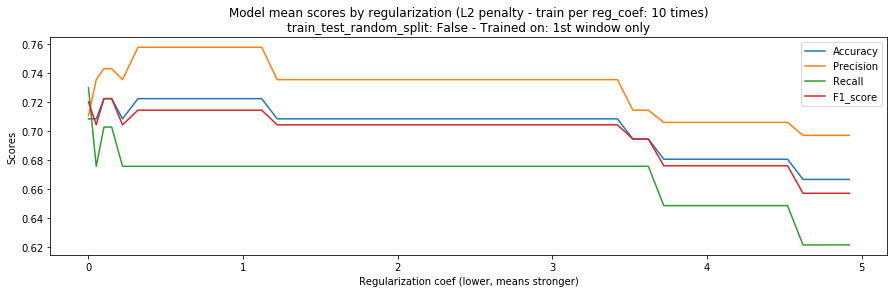

In [122]:
reg = list(np.arange(0.00001, 0.2, 0.05)) + list(np.arange(0.22, 5, 0.1))
mean_f1, mean_acc, mean_prec, mean_rec = regularization_test(0, reg, data_2, icu, 0.2, p='l2', train_repeat=10, split_random=0, clf_random='rand', clf_param=None, title='Model mean scores by regularization (L2 penalty - train per reg_coef: 10 times)\ntrain_test_random_split: False - Trained on: 1st window only')
print('Max F1_score: ', np.array(mean_f1).max())

**Check on the range 0-1 (more strong regularization):**

Max F1_score:  0.7222222222222223


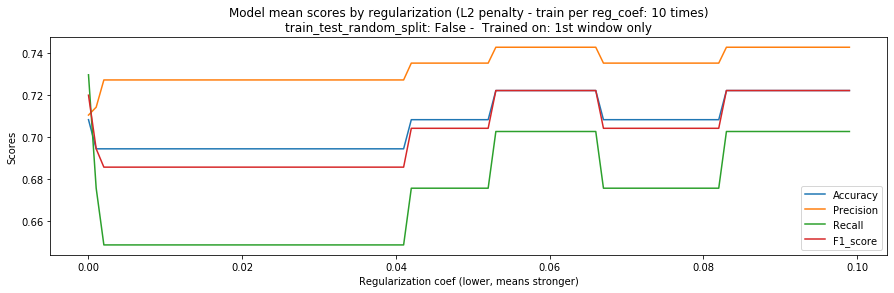

In [123]:
reg = np.arange(0.0000001, 0.1, 0.001)
mean_f1, mean_acc, mean_prec, mean_rec = regularization_test(0, reg, data_2, icu, 0.2, p='l2', train_repeat=10, split_random=0, clf_random='rand', clf_param=None, title='Model mean scores by regularization (L2 penalty - train per reg_coef: 10 times)\ntrain_test_random_split: False -  Trained on: 1st window only')
print('Max F1_score: ', np.array(mean_f1).max())

**Max F1_score: 72. Trying the same, this time with L1 penalty:**

Max F1_score:  0.7397260273972602


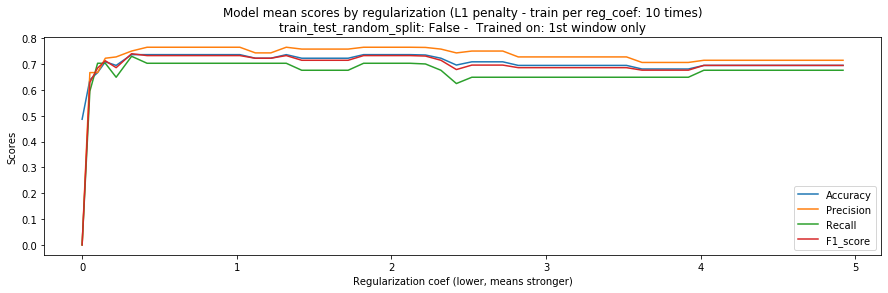

In [124]:
reg = list(np.arange(0.00001, 0.2, 0.05)) + list(np.arange(0.22, 5, 0.1))
mean_f1, mean_acc, mean_prec, mean_rec = regularization_test(0, reg, data_2, icu, 0.2, p='l1', train_repeat=10, split_random=0, clf_random='rand', clf_param=None, title='Model mean scores by regularization (L1 penalty - train per reg_coef: 10 times)\ntrain_test_random_split: False -  Trained on: 1st window only')
print('Max F1_score: ', np.array(mean_f1).max())

**We didn't observe a meaningful dependency on regularization for mean f1_score (exept for very strong regularization wich leads ro underfitting). This may lead to this colclusion:<br>The model is not complex enough to overfit the training data, or training data is small.**

* **Adding next window to training data:**

In [125]:
log_reg(data_2, icu, 0.2, p='l2', r=1, train_repeat=10, split_random='rand', clf_random='rand', window=1, clf_param=None)

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
Accuracy   0.728395  0.789474  0.788732  0.789474  0.821429  0.814815   
F1_score   0.702703  0.761905  0.794521  0.787234  0.814815  0.838710   
Precision  0.684211  0.780488  0.878788  0.822222  0.825000  0.829787   
Recall     0.722222  0.744186  0.725000  0.755102  0.804878  0.847826   
ROC_AUC    0.727778  0.785555  0.797984  0.790594  0.821044  0.809627   

           Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
Accuracy   0.750000  0.788732  0.777778  0.705882  0.775471  0.034809  
F1_score   0.734177  0.794521  0.764706  0.615385  0.760867  0.060997  
Precision  0.690476  0.878788  0.812500  0.727273  0.792953  0.067196  
Recall     0.783784  0.725000  0.722222  0.533333  0.736355  0.078523  
ROC_AUC    0.753594  0.797984  0.777778  0.687719  0.774966  0.038787

**No meaningful improvement (notice Std column).**

**Adding third window to training data:**

In [126]:
log_reg(data_2, icu, 0.2, p='l2', r=1, train_repeat=10, split_random='rand', clf_random='rand', window=2, clf_param=None)

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
Accuracy   0.755319  0.797101  0.767123  0.810127  0.812500  0.719512   
F1_score   0.747253  0.800000  0.738462  0.814815  0.800000  0.722892   
Precision  0.755556  0.848485  0.631579  0.825000  0.750000  0.731707   
Recall     0.739130  0.756757  0.888889  0.804878  0.857143  0.714286   
ROC_AUC    0.754982  0.800253  0.792271  0.810334  0.817460  0.719643   

           Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
Accuracy   0.783784  0.821053  0.735294  0.770115  0.777193  0.032260  
F1_score   0.809524  0.821053  0.727273  0.736842  0.771811  0.038211  
Precision  0.829268  0.847826  0.705882  0.756757  0.768206  0.066516  
Recall     0.790698  0.795918  0.750000  0.717949  0.781565  0.054817  
ROC_AUC    0.782446  0.821872  0.736111  0.765224  0.780060  0.033252

**Not better, lets try adding fourth window to training data:**

In [127]:
log_reg(data_2, icu, 0.2, p='l2', r=1, train_repeat=10, split_random='rand', clf_random='rand', window=3, clf_param=None)

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
Accuracy   0.820896  0.721519  0.794521  0.821429  0.719512  0.806818   
F1_score   0.818182  0.744186  0.800000  0.835165  0.722892  0.808989   
Precision  0.771429  0.744186  0.810811  0.826087  0.731707  0.765957   
Recall     0.870968  0.744186  0.789474  0.844444  0.714286  0.857143   
ROC_AUC    0.824373  0.719315  0.794737  0.819658  0.719643  0.809006   

           Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
Accuracy   0.746667  0.812500  0.797297  0.750000  0.779116  0.038414  
F1_score   0.739726  0.814815  0.782609  0.790698  0.785726  0.035934  
Precision  0.771429  0.846154  0.771429  0.755556  0.779474  0.034752  
Recall     0.710526  0.785714  0.794118  0.829268  0.794013  0.054399  
ROC_AUC    0.747155  0.813910  0.797059  0.737215  0.778207  0.040304

**With All windows in training:**

In [128]:
log_reg(data_2, icu, 0.2, p='l2', r=1, train_repeat=10, split_random='rand', clf_random='rand', window=4, clf_param=None)

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
Accuracy   0.730769  0.781250  0.821429  0.736111  0.847458  0.762500   
F1_score   0.769231  0.766667  0.823529  0.753247  0.852459  0.795699   
Precision  0.744681  0.718750  0.795455  0.805556  0.812500  0.787234   
Recall     0.795455  0.821429  0.853659  0.707317  0.896552  0.804348   
ROC_AUC    0.721257  0.785714  0.822178  0.740755  0.848276  0.755115   

           Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
Accuracy   0.756098  0.770270  0.705882  0.769231  0.768100  0.039729  
F1_score   0.787234  0.760563  0.705882  0.769231  0.778374  0.037966  
Precision  0.804348  0.729730  0.666667  0.810811  0.767573  0.047296  
Recall     0.770833  0.794118  0.750000  0.731707  0.792542  0.053650  
ROC_AUC    0.753064  0.772059  0.708333  0.771259  0.767801  0.040739

**There is not mush difference between results. Lets train with all windows and check for a good regularization:**

Max F1_score:  0.7777777777777778


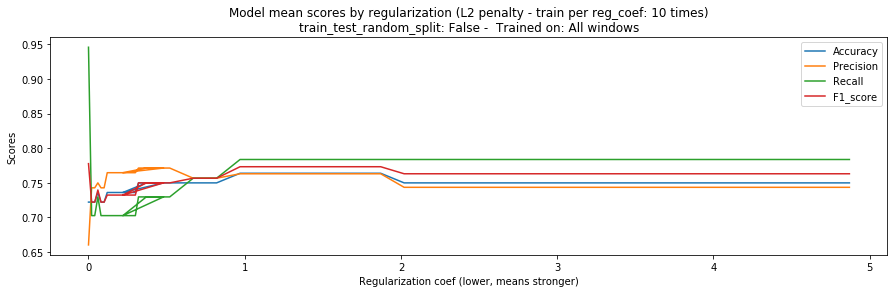

In [129]:
reg = list(np.arange(0.00001, 0.5, 0.02)) + list(np.arange(0.22, 5, 0.15))
mean_f1, mean_acc, mean_prec, mean_rec = regularization_test(4, reg, data_2, icu, 0.2, p='l2', train_repeat=10, split_random=0, clf_random='rand', clf_param=None, title='Model mean scores by regularization (L2 penalty - train per reg_coef: 10 times)\ntrain_test_random_split: False -  Trained on: All windows')
print('Max F1_score: ', np.array(mean_f1).max())

**Check for range closer to stronger regularizations:**

Max F1_score:  0.7500000000000001
Best reg_ceof:  1e-07


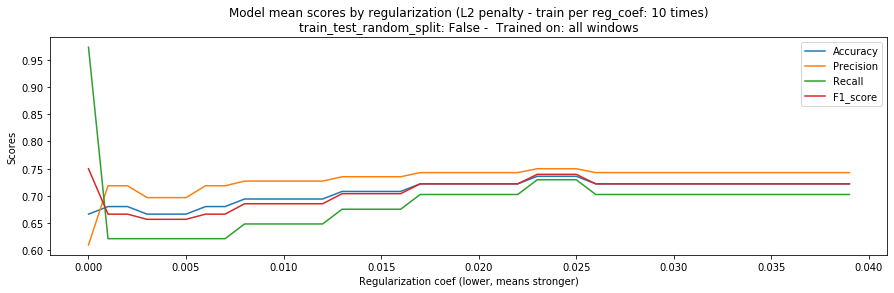

In [130]:
reg = np.arange(0.0000001, 0.04, 0.001)
mean_f1, mean_acc, mean_prec, mean_rec = regularization_test(4, reg, data_2, icu, 0.2, p='l2', train_repeat=10, split_random=0, clf_random='rand', clf_param=None, title='Model mean scores by regularization (L2 penalty - train per reg_coef: 10 times)\ntrain_test_random_split: False -  Trained on: all windows')
print('Max F1_score: ', np.array(mean_f1).max())
print('Best reg_ceof: ', reg[np.argmax(np.array(mean_f1))])

**There is something else that dataset authors suggested: Not to use record were actually coresponding patient is in ICU during that window time. Instead, use previous windows for modeling:**

In [131]:
log_reg(data_early_icu, early_icu, 0.2, p='l2', r=1, train_repeat=10, split_random='rand', clf_random='rand', window=4, clf_param=None).loc[['F1_score', 'ROC_AUC']]

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
F1_score  0.666667  0.716981  0.735294  0.688525  0.711864  0.777778   
ROC_AUC   0.677586  0.761579  0.750583  0.710138  0.770513  0.786325   

          Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
F1_score  0.727273  0.727273  0.800000  0.622951  0.717460  0.048314  
ROC_AUC   0.757840  0.757840  0.809598  0.668952  0.745095  0.043256

**No improvement.**

**Trying dataset with outliers, training on all windows:**

In [132]:
log_reg(data, icu, 0.2, p='l2', r=1, train_repeat=10, split_random='rand', clf_random='rand', window=4, clf_param=None).loc[['F1_score', 'ROC_AUC']]

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
F1_score  0.804878  0.759494  0.761905  0.787879  0.787879  0.825000   
ROC_AUC   0.778846  0.777746  0.752744  0.806250  0.807353  0.827134   

          Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
F1_score  0.739726  0.724138  0.853933  0.785714  0.783054  0.036965  
ROC_AUC   0.732937  0.755198  0.845299  0.745833  0.782934  0.035473

**Very minor improvement.**

**Trying data2_pca, trianing on all data:**

In [133]:
data2_pca['WINDOW'] = data_2.WINDOW.copy()
log_reg(data2_pca, icu, 0.2, p='l2', r=1, train_repeat=10, split_random='rand', clf_random='rand', window=4, clf_param=None).loc[['F1_score', 'ROC_AUC']]

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
F1_score  0.750000  0.826087  0.783784  0.780488  0.710526  0.877551   
ROC_AUC   0.789271  0.806838  0.786984  0.774711  0.691270  0.867347   

          Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
F1_score  0.750000  0.831169  0.746988  0.753247  0.780984  0.047640  
ROC_AUC   0.770032  0.821053  0.756132  0.740755  0.780439  0.045031

**Not better.**

**We saw L1 regularization leaded to better results in training with only 0-2 window. Lets try it on all windows:**

In [134]:
log_reg(data_2, icu, 0.2, p='l1', r=1, train_repeat=10, split_random='rand', clf_random='rand', window=4, clf_param=None).loc[['F1_score', 'ROC_AUC']]

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
F1_score  0.714286  0.821918  0.808511  0.788732  0.712329  0.829268   
ROC_AUC   0.685811  0.827169  0.765985  0.799265  0.738889  0.822529   

          Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
F1_score  0.756098  0.738462  0.769231  0.787879  0.772671  0.039886  
ROC_AUC   0.736842  0.778401  0.793422  0.740816  0.768913  0.041850

Max F1_score:  0.7733333333333334
Best reg_ceof:  1.37


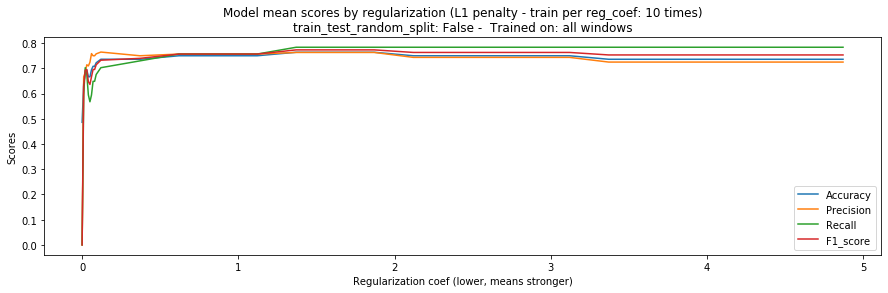

In [135]:
reg = list(np.arange(0.0000001, 0.1, 0.01)) + list(np.arange(0.12, 5, 0.25))
mean_f1, mean_acc, mean_prec, mean_rec = regularization_test(4, reg, data_2, icu, 0.2, p='l1', train_repeat=10, split_random=0, clf_random='rand', clf_param=None, title='Model mean scores by regularization (L1 penalty - train per reg_coef: 10 times)\ntrain_test_random_split: False -  Trained on: all windows')
print('Max F1_score: ', np.array(mean_f1).max())
print('Best reg_ceof: ', reg[np.argmax(np.array(mean_f1))])

Max F1_score:  0.7733333333333334
Best reg_ceof:  1.5000001


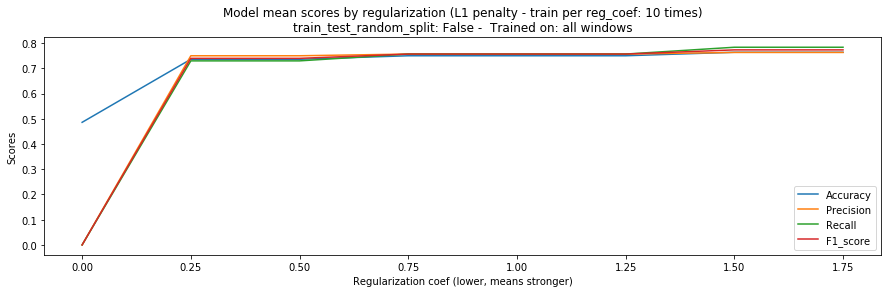

In [136]:
reg = list(np.arange(0.0000001, 2, 0.25))
mean_f1, mean_acc, mean_prec, mean_rec = regularization_test(4, reg, data_2, icu, 0.2, p='l1', train_repeat=10, split_random=0, clf_random='rand', clf_param=None, title='Model mean scores by regularization (L1 penalty - train per reg_coef: 10 times)\ntrain_test_random_split: False -  Trained on: all windows')
print('Max F1_score: ', np.array(mean_f1).max())
print('Best reg_ceof: ', reg[np.argmax(np.array(mean_f1))])

<br><br><br>
* ### Using grid search for tuning hyperparameters:_ _ _ _ _(SPLIT BY PATIENT: OFF)<br>Logistic Regression<br>
**-- NOTICE: Since grid search uses k-fold cross validation, it is not actualy tested on only 0-2 window. We are doing this to check if the outcome of this search, may perform better for early prediction, too.**

In [137]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(data_2, icu, test_size=0.2, shuffle=True, random_state=0)
X_train, X_test, y_train, y_test = window_selection(X_train, X_test, y_train, y_test, 4)
param_grid = {
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [200, 500, 1000],
    'tol': [1e-4, 1e-6],
    'C': [0.05, 0.5, 1, 1.5]
    
}

lg_clf = LogisticRegression()
grid_s = GridSearchCV(estimator = lg_clf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2, scoring='f1')
grid_s.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.05, 0.5, 1, 1.5], 'max_iter': [200, 500, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1', verbose=2)

In [138]:
grid_s.best_params_

{'C': 1.5, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001}

In [139]:
params = (grid_s.best_params_['solver'], grid_s.best_params_['penalty'], grid_s.best_params_['max_iter'],\
                           grid_s.best_params_['tol'], grid_s.best_params_['C'])

log_reg(data_2, icu, 0.2, p=None, r=None, train_repeat=10, split_random='rand', clf_random='rand', window=4, clf_param=params)

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
Accuracy   0.826087  0.782051  0.826087  0.789474  0.809524  0.724638   
F1_score   0.833333  0.804598  0.833333  0.789474  0.793103  0.739726   
Precision  0.857143  0.833333  0.857143  0.750000  0.718750  0.675000   
Recall     0.810811  0.777778  0.810811  0.833333  0.884615  0.818182   
ROC_AUC    0.827280  0.782828  0.827280  0.791667  0.820686  0.728535   

           Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
Accuracy   0.821918  0.703704  0.809524  0.880000  0.797301  0.048719  
F1_score   0.831169  0.727273  0.793103  0.896552  0.804166  0.046359  
Precision  0.820513  0.680851  0.718750  0.906977  0.781846  0.078572  
Recall     0.842105  0.780488  0.884615  0.886364  0.832910  0.039077  
ROC_AUC    0.821053  0.702744  0.820686  0.878666  0.800143  0.048894

**Logistic Regression early prediction**
### RESULT:  80 F1_SCORE (std: 0.05)
**SPLIT BY PATIENT: OFF**<br>

<br><br><br>
* ### Using grid search for tuning hyperparameters:_ _ _ _ _(SPLIT BY PATIENT: ON)<br>Logistic Regression<br>
**-- NOTICE: Since grid search uses k-fold cross validation, it is not actualy tested on only 0-2 window. We are doing this to check if the outcome of this search, may perform better for early prediction, too.**

In [140]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = tt_split_by_patient(data_2, icu, test_size=0.2)
X_train, X_test, y_train, y_test = window_selection(X_train, X_test, y_train, y_test, 4)
param_grid = {
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [200, 500, 1000],
    'tol': [1e-4, 1e-6],
    'C': [0.05, 0.5, 1, 1.5]
    
}

lg_clf = LogisticRegression()
grid_s = GridSearchCV(estimator = lg_clf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='f1')
grid_s.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.05, 0.5, 1, 1.5], 'max_iter': [200, 500, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1', verbose=2)

In [141]:
grid_s.best_params_

{'C': 1.5, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001}

In [142]:
params = (grid_s.best_params_['solver'], grid_s.best_params_['penalty'], grid_s.best_params_['max_iter'],\
                           grid_s.best_params_['tol'], grid_s.best_params_['C'])
log_reg_psplit(data_2, icu, 0.2, p=None, r=None, train_repeat=10, split_random='rand', clf_random='rand', window=4, clf_param=params)

Train: 0  Train: 1  Train: 2  Train: 3  Train: 4  Train: 5  \
Accuracy   0.734375  0.757576  0.684211  0.811594  0.746835  0.733333   
F1_score   0.746269  0.764706  0.657143  0.816901  0.743590  0.736842   
Precision  0.757576  0.742857  0.560976  0.805556  0.763158  0.717949   
Recall     0.735294  0.787879  0.793103  0.828571  0.725000  0.756757   
ROC_AUC    0.734314  0.757576  0.705062  0.811345  0.747115  0.733642   

           Train: 6  Train: 7  Train: 8  Train: 9      Mean       Std  
Accuracy   0.746479  0.662162  0.645161  0.734375  0.725610  0.046611  
F1_score   0.756757  0.626866  0.656250  0.721311  0.722663  0.055578  
Precision  0.700000  0.677419  0.617647  0.628571  0.697171  0.072282  
Recall     0.823529  0.583333  0.700000  0.846154  0.757962  0.073925  
ROC_AUC    0.749603  0.660088  0.646875  0.752024  0.729764  0.045815

**Logistic Regression ealry prediction**
### RESULT:  73 F1_SCORE (std: 0.05)
**SPLIT BY PATIENT: ON**<br>

<br><br>
* ## Decision tree for ealry prediction:<br>
* **training with only 0-2 Window data:_ _ _ _ _ _ _ _ _ _(SPLIT BY PATIENT: OFF)** 

In [143]:
def dec_tree(data, y, t_size, crit, max_d, train_repeat, split_random, clf_random, window, clf_param):
    drop_icu_pid(data)
    res = pd.DataFrame()
    if split_random != 'rand':
        sp_rs = split_random
    if clf_random != 'rand':
        clf_rs = clf_random   
    for train in range(train_repeat):
        if split_random == 'rand':
            sp_rs = np.random.randint(100)
        if clf_random == 'rand':
            clf_rs = np.random.randint(100)  
        X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=t_size, shuffle=True,\
                                                            random_state=sp_rs)
        X_train, X_test, y_train, y_test = window_selection(X_train, X_test, y_train, y_test, window)
        
        tree_clf = tree.DecisionTreeClassifier()
        if clf_param is not None:
            criterion, max_depth, splitter, min_samples_leaf, max_features = clf_param
            tree_clf = tree.DecisionTreeClassifier(random_state=clf_rs, criterion=criterion, max_depth=max_depth,\
                                                            splitter=splitter, min_samples_leaf=min_samples_leaf,\
                                                            max_features=max_features)
        else:
            tree_clf = tree.DecisionTreeClassifier(random_state=clf_rs, max_depth=max_d, criterion=crit)
        tree_clf = tree_clf.fit(X_train, y_train)
        pred = tree_clf.predict(X_test)
        acc, f1, prec, rec, roc = score(y_test, pred)
        res['Train ' + str(train)] = [acc, f1, prec, rec, roc]
    res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
    res['Mean'] = res.mean(axis=1)
    res['Std'] = res.std(axis=1)
    return res



def dec_tree_psplit(data, y, t_size, crit, max_d, train_repeat, split_random, clf_random, window, clf_param):
    drop_icu_pid(data)
    res = pd.DataFrame()
    if split_random != 'rand':
        sp_rs = split_random
    if clf_random != 'rand':
        clf_rs = clf_random   
    for train in range(train_repeat):
        if split_random == 'rand':
            sp_rs = np.random.randint(100)
        if clf_random == 'rand':
            clf_rs = np.random.randint(100)  
        X_train, X_test, y_train, y_test = tt_split_by_patient(data, y, t_size)
        X_train, X_test, y_train, y_test = window_selection(X_train, X_test, y_train, y_test, window)
        
        tree_clf = tree.DecisionTreeClassifier()
        if clf_param is not None:
            criterion, max_depth, splitter, min_samples_leaf, max_features = clf_param
            tree_clf = tree.DecisionTreeClassifier(random_state=clf_rs, criterion=criterion, max_depth=max_depth,\
                                                            splitter=splitter, min_samples_leaf=min_samples_leaf,\
                                                            max_features=max_features)
        else:
            tree_clf = tree.DecisionTreeClassifier(random_state=clf_rs, max_depth=max_d, criterion=crit)
        tree_clf = tree_clf.fit(X_train, y_train)
        pred = tree_clf.predict(X_test)
        acc, f1, prec, rec, roc = score(y_test, pred)
        res['Train ' + str(train)] = [acc, f1, prec, rec, roc]
    res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
    res['Mean'] = res.mean(axis=1)
    res['Std'] = res.std(axis=1)
    return res


def max_depth_test(window, depths, data, y, ts, crit, train_repeat, split_random, clf_random, clf_param, title):
    drop_icu_pid(data)
    mean_f1, mean_acc, mean_prec, mean_rec = [], [], [], []
    for d in depths:
        res = dec_tree(data, y, ts, crit, max_d=d, train_repeat=train_repeat, \
                      split_random=split_random, clf_random=clf_random, window=window, clf_param=clf_param)
        mean_f1.append(res.loc['F1_score', 'Mean'])
        mean_acc.append(res.loc['Accuracy', 'Mean'])
        mean_prec.append(res.loc['Precision', 'Mean'])
        mean_rec.append(res.loc['Recall', 'Mean'])
    draw_regularization_test(depths, mean_f1, mean_acc, mean_prec, mean_rec, title)
    return mean_f1, mean_acc, mean_prec, mean_rec

* **with only 0-2 WINDOW data (both training and testing):**

In [144]:
dec_tree(data_2, icu, 0.2, crit='gini', max_d=200, train_repeat=10, split_random='rand', clf_random='rand', window=0, clf_param=None).loc[['F1_score', 'ROC_AUC']] # max_depth=200 is actually seting no bound on depth.

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5  \
F1_score  0.629213  0.571429  0.597403  0.527778  0.588235  0.632911   
ROC_AUC   0.611111  0.555814  0.603289  0.540659  0.614662  0.653198   

           Train 6   Train 7   Train 8   Train 9      Mean       Std  
F1_score  0.720000  0.689655  0.593750  0.575342  0.612572  0.054423  
ROC_AUC   0.712602  0.669643  0.641537  0.633814  0.623633  0.048442

**Not better than logistic regression (with training on only 0-2 window).**

**Adding next window to training data:**

In [145]:
dec_tree(data_2, icu, 0.2, crit='gini', max_d=200, train_repeat=10, split_random='rand', clf_random='rand', window=1, clf_param=None).loc[['F1_score', 'ROC_AUC']] # max_depth=200 is actually seting no bound on depth.

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5  \
F1_score  0.868421  0.880000  0.923077  0.873239  0.923077  0.928571   
ROC_AUC   0.868421  0.877068  0.923684  0.880556  0.922358  0.925610   

           Train 6   Train 7   Train 8   Train 9      Mean       Std  
F1_score  0.864198  0.883117  0.831169  0.865672  0.884054  0.029892  
ROC_AUC   0.846591  0.889692  0.824242  0.869949  0.882817  0.032041

**Much better.<br><br> Adding third window to training data:**

In [146]:
dec_tree(data_2, icu, 0.2, crit='gini', max_d=200, train_repeat=10, split_random='rand', clf_random='rand', window=2, clf_param=None).loc[['F1_score', 'ROC_AUC']] # max_depth=200 is actually seting no bound on depth.

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5  \
F1_score  0.933333  0.936170  0.936709  0.923077  0.926829  0.921053   
ROC_AUC   0.905039  0.933201  0.941860  0.918750  0.925915  0.913651   

           Train 6   Train 7   Train 8   Train 9      Mean       Std  
F1_score  0.840000  0.937500  0.949495  0.911111  0.921528  0.028996  
ROC_AUC   0.863306  0.937047  0.943878  0.876744  0.915939  0.025950

**Adding fourth window to training data:**

In [147]:
dec_tree(data_2, icu, 0.2, crit='gini', max_d=200, train_repeat=10, split_random='rand', clf_random='rand', window=3, clf_param=None).loc[['F1_score', 'ROC_AUC']] # max_depth=200 is actually seting no bound on depth.

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5  \
F1_score  0.976744  0.941176  0.953488  0.954545  0.942857  0.950000   
ROC_AUC   0.977273  0.944444  0.957513  0.955039  0.947222  0.946748   

           Train 6   Train 7   Train 8   Train 9      Mean       Std  
F1_score  0.967742  0.951220  0.906250  0.977273  0.952130  0.019508  
ROC_AUC   0.973001  0.948026  0.915004  0.966667  0.953094  0.016777

**And with all windows present in training data:**

In [148]:
dec_tree(data_2, icu, 0.2, crit='gini', max_d=200, train_repeat=10, split_random='rand', clf_random='rand', window=4, clf_param=None).loc[['F1_score', 'ROC_AUC']] # max_depth=200 is actually seting no bound on depth.

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5  \
F1_score  0.927536  0.967742  0.967033  0.951220  0.947368  0.916667   
ROC_AUC   0.933088  0.973001  0.963248  0.953488  0.948043  0.920833   

           Train 6   Train 7   Train 8   Train 9      Mean       Std  
F1_score  0.926829  0.987952  0.934783  0.904110  0.943124  0.024639  
ROC_AUC   0.925915  0.986486  0.933211  0.907183  0.944450  0.023613

**Model achieved 95 mean F1_score. Lets try different max depths for regularization:**

Max F1_score:  0.9863013698630139
Best max_depth:  26


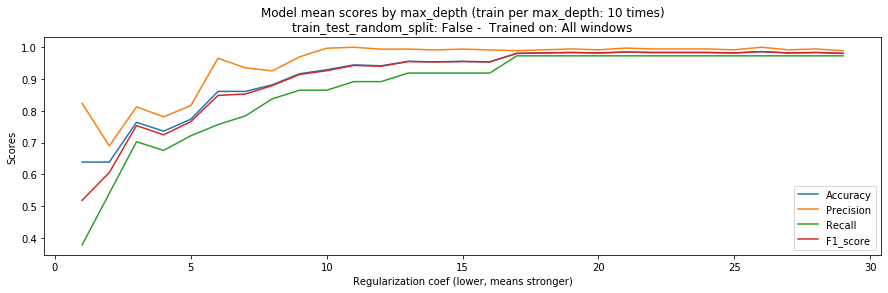

In [149]:
depths = [i for i in range(1, 30)]
mean_f1, mean_acc, mean_prec, mean_rec = max_depth_test(4, depths, data_2, icu, 0.2, crit='gini', train_repeat=10, split_random=0, clf_random='rand', clf_param=None, title='Model mean scores by max_depth (train per max_depth: 10 times)\ntrain_test_random_split: False -  Trained on: All windows')
print('Max F1_score: ', np.array(mean_f1).max())
print('Best max_depth: ', depths[np.argmax(np.array(mean_f1))])

In [150]:
dec_tree(data_2, icu, 0.2, crit='gini', max_d=22, train_repeat=10, split_random='rand', clf_random='rand', window=4, clf_param=None)

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5  \
Accuracy   0.959459  0.944444  0.958904  0.962500  0.950617  0.986111   
F1_score   0.955224  0.950000  0.960000  0.960000  0.953488  0.986301   
Precision  1.000000  0.950000  0.972973  0.923077  0.976190  1.000000   
Recall     0.914286  0.950000  0.947368  1.000000  0.931818  0.972973   
ROC_AUC    0.957143  0.943750  0.959398  0.965909  0.952396  0.986486   

            Train 6   Train 7   Train 8   Train 9      Mean       Std  
Accuracy   0.966102  0.940476  0.935897  0.936842  0.954135  0.014870  
F1_score   0.965517  0.939759  0.941176  0.937500  0.954897  0.013774  
Precision  0.965517  0.928571  1.000000  0.957447  0.967378  0.026785  
Recall     0.965517  0.951220  0.888889  0.918367  0.944044  0.030436  
ROC_AUC    0.966092  0.940726  0.944444  0.937445  0.955379  0.014187

**As the graph goes almost constant after 15, setting a max depth didn't improve the resutls.**

**Testing for other data sets we have (data_3, data, data2_pca, data_pca):**

In [151]:
dec_tree(data_3, icu, 0.2, crit='gini', max_d=200, train_repeat=10, split_random='rand', clf_random='rand', window=4, clf_param=None).loc[['F1_score', 'ROC_AUC']]

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5  \
F1_score  0.876712  0.931507  0.923077  0.886076  0.877193  0.901961   
ROC_AUC   0.878195  0.937237  0.922358  0.875000  0.908615  0.915281   

           Train 6   Train 7   Train 8   Train 9      Mean       Std  
F1_score  0.847059  0.875000  0.861111  0.877193  0.885689  0.024895  
ROC_AUC   0.841071  0.887657  0.871309  0.890873  0.892760  0.027022

In [152]:
dec_tree(data2_pca, icu, 0.2, crit='gini', max_d=200, train_repeat=10, split_random='rand', clf_random='rand', window=4, clf_param=None).loc[['F1_score', 'ROC_AUC']]

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5  \
F1_score  0.831169  0.843373  0.800000  0.853333  0.864865  0.833333   
ROC_AUC   0.828938  0.841667  0.790854  0.849624  0.876263  0.840683   

           Train 6   Train 7   Train 8   Train 9      Mean       Std  
F1_score  0.772727  0.831169  0.833333  0.883117  0.834642  0.029580  
ROC_AUC   0.789580  0.844444  0.839744  0.881301  0.838310  0.028614

In [153]:
dec_tree(data, icu, 0.2, crit='gini', max_d=200, train_repeat=10, split_random='rand', clf_random='rand', window=4, clf_param=None).loc[['F1_score', 'ROC_AUC']]

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5  \
F1_score  0.941176  0.941176  0.954545  0.962963  0.943396  0.953488   
ROC_AUC   0.944444  0.944322  0.955039  0.964286  0.952093  0.951744   

           Train 6   Train 7   Train 8   Train 9      Mean       Std  
F1_score  0.965517  0.966292  0.962025  0.985915  0.957650  0.013251  
ROC_AUC   0.966092  0.964957  0.963415  0.986842  0.959323  0.012044

In [154]:
dec_tree(data_early_icu, early_icu, 0.2, crit='gini', max_d=200, train_repeat=10, split_random='rand', clf_random='rand', window=4, clf_param=None).loc[['F1_score', 'ROC_AUC']]

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5  \
F1_score  0.928571  0.967742  0.909091  0.901408  0.871795  0.851852   
ROC_AUC   0.938645  0.972243  0.919130  0.908232  0.892262  0.868182   

           Train 6   Train 7   Train 8   Train 9      Mean       Std  
F1_score  0.944444  0.958904  0.916667  0.905660  0.915614  0.034526  
ROC_AUC   0.946302  0.960526  0.921390  0.911538  0.923845  0.029884

**Didn't find better outcome with other datasets.**

<br><br><br>
* ### Using grid search for tuning hyperparameters:_ _ _ _ _(SPLIT BY PATIENT: OFF)<br>Decision tree<br>
**-- NOTICE: Since grid search uses k-fold cross validation, it is not actualy tested on only 0-2 window. We are doing this to check if the outcome of this search, may perform better for early prediction, too.**

In [155]:
bests = []
for search in range(10):
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [20, 50, 150, 200],
        'splitter': ['best', 'random'],
        'min_samples_leaf': [1, 3, 5, 10],
        'max_features': ['sqrt', None, 'log2']
    }

    X_train, X_test, y_train, y_test = train_test_split(data_2, icu, test_size=0.1, shuffle=True, random_state=np.random.randint(100))

    dt_clf = tree.DecisionTreeClassifier()
    grid_s = GridSearchCV(estimator = dt_clf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='f1')
    grid_s.fit(X_train, y_train)
    bests.append(grid_s.best_params_)
    
r = pd.DataFrame()
for i in range(len(bests)):
    r['search #'+str(i+1)] = bests[i].values()
r.index=bests[0].keys()
r

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Fitting 3 folds for each of 192 candidates, totalling 576 fits
Fitting 3 folds for each of 192 candidates, totalling 576 fits
Fitting 3 folds for each of 192 candidates, totalling 576 fits
Fitting 3 folds for each of 192 candidates, totalling 576 fits
Fitting 3 folds for each of 192 candidates, totalling 576 fits
Fitting 3 folds for each of 192 candidates, totalling 576 fits
Fitting 3 folds for each of 192 candidates, totalling 576 fits
Fitting 3 folds for each of 192 candidates, totalling 576 fits
Fitting 3 folds for each of 192 candidates, totalling 576 fits


search #1 search #2 search #3 search #4 search #5 search #6  \
criterion          entropy      gini   entropy   entropy      gini   entropy   
max_depth              200        50       150       150       150        50   
max_features          None      sqrt      None      None      sqrt      None   
min_samples_leaf         1         1         1         1         1         1   
splitter            random      best    random    random      best    random   

                 search #7 search #8 search #9 search #10  
criterion          entropy   entropy      gini    entropy  
max_depth               20       150        50         50  
max_features          sqrt      sqrt      sqrt       None  
min_samples_leaf         1         1         1          1  
splitter              best      best    random     random

**Evaluation:**

In [158]:
params=('gini', 50, 'best', 1, 'sqrt')
dec_tree(data_2, icu, 0.2, None, None, train_repeat=10, split_random='rand', clf_random='rand', window=4, clf_param=params).loc[['F1_score', 'ROC_AUC']]

Train 0   Train 1   Train 2   Train 3   Train 4  Train 5   Train 6  \
F1_score  0.933333  0.964286  0.951220  0.980392  0.975610  0.97500  0.989011   
ROC_AUC   0.933499  0.965517  0.953488  0.980769  0.971138  0.97561  0.989130   

           Train 7   Train 8   Train 9      Mean       Std  
F1_score  0.968421  0.904110  0.942857  0.958424  0.024488  
ROC_AUC   0.966106  0.910714  0.944444  0.959042  0.022632

In [159]:
params=('entropy', 200, 'random', 1, None)
dec_tree(data_2, icu, 0.2, None, None, train_repeat=10, split_random='rand', clf_random='rand', window=4, clf_param=params).loc[['F1_score', 'ROC_AUC']]

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5   Train 6  \
F1_score      1.0  0.944444  0.987654  0.935065  0.958904  0.923077  0.926829   
ROC_AUC       1.0  0.947253  0.987805  0.936486  0.960526  0.931250  0.925915   

           Train 7   Train 8   Train 9      Mean       Std  
F1_score  0.928571  0.981818  0.925373  0.951174  0.027526  
ROC_AUC   0.948873  0.982143  0.930556  0.955081  0.025132

In [160]:
params=('entropy', 20, 'best', 1, 'sqrt')
dec_tree(data_2, icu, 0.2, None, None, train_repeat=10, split_random='rand', clf_random='rand', window=4, clf_param=params).loc[['F1_score', 'ROC_AUC']]

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5  \
F1_score  0.953846  0.929577  0.956522  0.906250  0.909091  0.917647   
ROC_AUC   0.959375  0.934524  0.951389  0.912584  0.918651  0.906613   

           Train 6   Train 7   Train 8  Train 9      Mean       Std  
F1_score  0.960000  0.977273  0.950820      1.0  0.946103  0.028812  
ROC_AUC   0.960526  0.977778  0.953853      1.0  0.947529  0.028161

**Decision tree early prediction**
### RESULT:  95 F1_SCORE (std: 0.02)
**SPLIT BY PATIENT: OFF**<br>

<br><br><br>
* ### Using grid search for tuning hyperparameters:_ _ _ _ _(SPLIT BY PATIENT: ON)<br>Decision tree<br>
**-- NOTICE: Since grid search uses k-fold cross validation, it is not actualy tested on only 0-2 window. We are doing this to check if the outcome of this search, may perform better for early prediction, too.**

In [162]:
bests = []
for search in range(10):
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [20, 50, 150, 200],
        'splitter': ['best', 'random'],
        'max_features': ['sqrt', None, 'log2']
    }

    X_train, X_test, y_train, y_test = tt_split_by_patient(data_2, icu, 0.1)

    dt_clf = tree.DecisionTreeClassifier()
    grid_s = GridSearchCV(estimator = dt_clf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='f1')
    grid_s.fit(X_train, y_train)
    bests.append(grid_s.best_params_)
    
r = pd.DataFrame()
for i in range(len(bests)):
    r['search #'+str(i+1)] = bests[i].values()
r.index=bests[0].keys()
r

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits


search #1 search #2 search #3 search #4 search #5 search #6  \
criterion      entropy   entropy   entropy   entropy   entropy   entropy   
max_depth           50        20       150       200        50       150   
max_features      sqrt      sqrt      sqrt      None      sqrt      log2   
splitter        random      best    random    random      best    random   

             search #7 search #8 search #9 search #10  
criterion      entropy   entropy   entropy    entropy  
max_depth          150       200        20        200  
max_features      None      sqrt      sqrt       None  
splitter          best      best      best     random

**Evaluation:**

In [163]:
params=('entropy', 50, 'random', 1, 'sqrt')
dec_tree_psplit(data_2, icu, 0.2, None, None, train_repeat=10, split_random='rand', clf_random='rand', window=4, clf_param=params).loc[['F1_score', 'ROC_AUC']]

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5  \
F1_score  0.620690  0.705882  0.600000  0.597403  0.577778  0.649351   
ROC_AUC   0.608338  0.721588  0.635965  0.600073  0.596365  0.645833   

           Train 6   Train 7   Train 8   Train 9      Mean       Std  
F1_score  0.650000  0.682353  0.585366  0.700000  0.636882  0.045242  
ROC_AUC   0.655678  0.651495  0.585714  0.705128  0.640618  0.043325

In [164]:
params=('entropy', 20, 'best', 1, 'sqrt')
dec_tree_psplit(data_2, icu, 0.2, None, None, train_repeat=10, split_random='rand', clf_random='rand', window=4, clf_param=params).loc[['F1_score', 'ROC_AUC']]

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5  \
F1_score  0.520548  0.606061  0.545455  0.617284  0.753247  0.694737   
ROC_AUC   0.555519  0.627451  0.535870  0.638528  0.746983  0.680918   

           Train 6   Train 7   Train 8   Train 9      Mean       Std  
F1_score  0.650602  0.553846  0.575342  0.588235  0.610536  0.068125  
ROC_AUC   0.609307  0.630323  0.525000  0.623932  0.617383  0.063768

In [165]:
params=('entropy', 200, 'best', 1, None)
dec_tree_psplit(data_2, icu, 0.2, None, None, train_repeat=10, split_random='rand', clf_random='rand', window=4, clf_param=params).loc[['F1_score', 'ROC_AUC']]

Train 0   Train 1  Train 2   Train 3   Train 4   Train 5   Train 6  \
F1_score  0.659091  0.657534  0.72000  0.647059  0.707317  0.610169  0.694737   
ROC_AUC   0.650616  0.659350  0.70979  0.657658  0.687584  0.633874  0.675000   

           Train 7  Train 8   Train 9      Mean      Std  
F1_score  0.720000  0.75000  0.625000  0.679091  0.04357  
ROC_AUC   0.729268  0.72381  0.640698  0.676765  0.03267

**Decision tree early prediction**
### RESULT:  67 F1_SCORE (std: 0.04)
**SPLIT BY PATIENT: ON**<br>

<br><br>

* ## Random forest for ealry prediction:<br>
* **training with only 0-2 Window data:_ _ _ _ _ _ _ _ _ _(SPLIT BY PATIENT: OFF)** 

In [166]:
def ran_for(data, y, t_size, max_d, crit, train_repeat, split_random, clf_random, window, clf_param):
    drop_icu_pid(data)
    res = pd.DataFrame()
    if split_random != 'rand':
        sp_rs = split_random
    if clf_random != 'rand':
        clf_rs = clf_random   
    for train in range(train_repeat):
        if split_random == 'rand':
            sp_rs = np.random.randint(100)
        if clf_random == 'rand':
            clf_rs = np.random.randint(100)  
        X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=t_size, shuffle=True,\
                                                            random_state=sp_rs)
        X_train, X_test, y_train, y_test = window_selection(X_train, X_test, y_train, y_test, window)
        
        rf_clf = RandomForestClassifier()
        if clf_param is not None:
            # Unpacking model parameters from arguments:
            criterion, max_depth, max_features, max_samples, n_estimators = clf_param
            rf_clf = RandomForestClassifier(random_state=clf_rs, criterion=criterion, max_depth=max_depth,\
                     n_estimators=n_estimators, max_samples=max_samples, max_features=max_features, n_jobs=-1)
        else:
            # Using default model parameters:
            rf_clf = RandomForestClassifier(bootstrap=True, random_state=clf_rs, max_features='auto', max_samples=None,\
                                       n_estimators=200, max_depth=max_d, criterion=crit, n_jobs=-1)
        
        rf_clf = rf_clf.fit(X_train, y_train)
        pred = rf_clf.predict(X_test)
        acc, f1, prec, rec, roc = score(y_test, pred)
        res['Train #' + str(train+1)] = [acc, f1, prec, rec, roc]
    res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
    res['Mean'] = res.mean(axis=1)
    res['Std'] = res.std(axis=1)
    return res



def ran_for_psplit(data, y, t_size, max_d, crit, train_repeat, split_random, clf_random, window, clf_param):
    drop_icu_pid(data)
    res = pd.DataFrame()
    if split_random != 'rand':
        sp_rs = split_random
    if clf_random != 'rand':
        clf_rs = clf_random   
    for train in range(train_repeat):
        if split_random == 'rand':
            sp_rs = np.random.randint(100)
        if clf_random == 'rand':
            clf_rs = np.random.randint(100)
        # Using split_by_patient:
        X_train, X_test, y_train, y_test = tt_split_by_patient(data, y, t_size)
        X_train, X_test, y_train, y_test = window_selection(X_train, X_test, y_train, y_test, window)
        rf_clf = RandomForestClassifier()
        if clf_param is not None:
            # Unpacking model parameters from arguments:
            criterion, max_depth, max_features, max_samples, n_estimators = clf_param
            rf_clf = RandomForestClassifier(random_state=clf_rs, criterion=criterion, max_depth=max_depth,\
                     n_estimators=n_estimators, max_samples=max_samples, max_features=max_features, n_jobs=-1)
        else:
            # Using default model parameters:
            rf_clf = RandomForestClassifier(bootstrap=True, random_state=clf_rs, max_features='auto', max_samples=None,\
                                       n_estimators=200, max_depth=max_d, criterion=crit, n_jobs=-1)
        rf_clf = rf_clf.fit(X_train, y_train)
        pred = rf_clf.predict(X_test)
        acc, f1, prec, rec, roc = score(y_test, pred)
        res['Train #' + str(train+1)] = [acc, f1, prec, rec, roc]
    res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
    res['Mean'] = res.mean(axis=1)
    res['Std'] = res.std(axis=1)
    return res


def forest_max_depth_test(window, depths, data, y, ts, crit, train_repeat, split_random, clf_random, clf_param, title):
    drop_icu_pid(data)
    mean_f1, mean_acc, mean_prec, mean_rec = [], [], [], []
    for d in depths:
        res = ran_for(data, y, ts, max_d=d, crit=crit, train_repeat=train_repeat, \
                      split_random=split_random, clf_random=clf_random, window=window, clf_param=clf_param)
        mean_f1.append(res.loc['F1_score', 'Mean'])
        mean_acc.append(res.loc['Accuracy', 'Mean'])
        mean_prec.append(res.loc['Precision', 'Mean'])
        mean_rec.append(res.loc['Recall', 'Mean'])
    draw_regularization_test(depths, mean_f1, mean_acc, mean_prec, mean_rec, title)
    return mean_f1, mean_acc, mean_prec, mean_rec

**Train model with first three windows:** 

In [167]:
ran_for(data_2, icu, 0.2, 100, 'gini', train_repeat=10, split_random='rand', clf_random='rand', window=2, clf_param=None)

Train #1  Train #2  Train #3  Train #4  Train #5  Train #6  \
Accuracy   0.975309  0.989474  0.974359  0.978947  0.945205  0.985075   
F1_score   0.975000  0.989691  0.980000  0.976744  0.948718  0.983607   
Precision  0.975000  1.000000  0.960784  0.976744  0.925000  1.000000   
Recall     0.975000  0.979592  1.000000  0.976744  0.973684  0.967742   
ROC_AUC    0.975305  0.989796  0.965517  0.978757  0.943985  0.983871   

           Train #7  Train #8  Train #9  Train #10      Mean       Std  
Accuracy   0.969697  0.972222       1.0   0.984375  0.977466  0.013794  
F1_score   0.968750  0.975000       1.0   0.982456  0.977997  0.012801  
Precision  0.968750  0.975000       1.0   0.965517  0.974680  0.021698  
Recall     0.968750  0.975000       1.0   1.000000  0.981651  0.012451  
ROC_AUC    0.969669  0.971875       1.0   0.986111  0.976489  0.014588

**Adding fourth window to trainig data:** 

In [168]:
ran_for(data_2, icu, 0.2, 100, 'gini', train_repeat=10, split_random='rand', clf_random='rand', window=3, clf_param=None)

Train #1  Train #2  Train #3  Train #4  Train #5  Train #6  \
Accuracy        1.0       1.0  0.978723  0.987342  0.985507       1.0   
F1_score        1.0       1.0  0.978723  0.987654  0.985075       1.0   
Precision       1.0       1.0  0.958333  1.000000  0.970588       1.0   
Recall          1.0       1.0  1.000000  0.975610  1.000000       1.0   
ROC_AUC         1.0       1.0  0.979167  0.987805  0.986111       1.0   

           Train #7  Train #8  Train #9  Train #10      Mean       Std  
Accuracy        1.0  0.972603  0.964286        1.0  0.988846  0.012669  
F1_score        1.0  0.973684  0.953846        1.0  0.987898  0.014785  
Precision       1.0  0.973684  0.939394        1.0  0.984200  0.021143  
Recall          1.0  0.973684  0.968750        1.0  0.991804  0.012619  
ROC_AUC         1.0  0.972556  0.965144        1.0  0.989078  0.012454

**Train with all windows:**

In [169]:
ran_for(data_2, icu, 0.2, 100, 'gini', train_repeat=10, split_random='rand', clf_random='rand', window=4, clf_param=None)

Train #1  Train #2  Train #3  Train #4  Train #5  Train #6  \
Accuracy        1.0  0.985075       1.0       1.0  0.987654  0.968421   
F1_score        1.0  0.983607       1.0       1.0  0.987654  0.964706   
Precision       1.0  1.000000       1.0       1.0  0.975610  0.976190   
Recall          1.0  0.967742       1.0       1.0  1.000000  0.953488   
ROC_AUC         1.0  0.983871       1.0       1.0  0.987805  0.967129   

           Train #7  Train #8  Train #9  Train #10      Mean       Std  
Accuracy        1.0  0.987179  0.987179   0.984375  0.989988  0.009711  
F1_score        1.0  0.987952  0.986301   0.981818  0.989204  0.010792  
Precision       1.0  0.976190  0.972973   1.000000  0.990096  0.012159  
Recall          1.0  1.000000  1.000000   0.964286  0.988552  0.017801  
ROC_AUC         1.0  0.986486  0.988095   0.982143  0.989553  0.010204

**Very acceptable result is coming up with this model. ~98 F1 score.**

* **Checking for regularization (max depths):**

Max F1_score:  0.9890410958904111
Best max_depth:  17


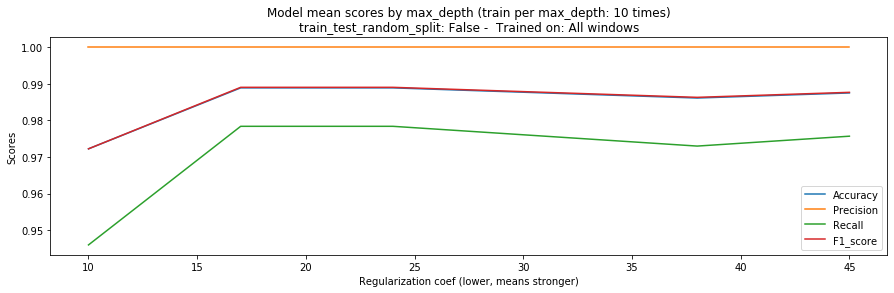

In [234]:
depths = [i for i in range(10, 50, 7)]
mean_f1, mean_acc, mean_prec, mean_rec = forest_max_depth_test(3, depths, data_2, icu, 0.2, crit='gini', train_repeat=10, split_random=0, clf_random='rand', clf_param=None, title='Model mean scores by max_depth (train per max_depth: 10 times)\ntrain_test_random_split: False -  Trained on: All windows')
print('Max F1_score: ', np.array(mean_f1).max())
print('Best max_depth: ', depths[np.argmax(np.array(mean_f1))])

In [235]:
ran_for(data_2, icu, 0.2, 19, 'gini', train_repeat=10, split_random='rand', clf_random='rand', window=3, clf_param=None)

Train #1  Train #2  Train #3  Train #4  Train #5  Train #6  \
Accuracy   0.987179  0.989474  0.976190  0.984127       1.0  0.987179   
F1_score   0.987654  0.989691  0.979592  0.983051       1.0  0.989899   
Precision  0.975610  1.000000  0.979592  0.966667       1.0  0.980000   
Recall     1.000000  0.979592  0.979592  1.000000       1.0  1.000000   
ROC_AUC    0.986842  0.989796  0.975510  0.985294       1.0  0.982759   

           Train #7  Train #8  Train #9  Train #10      Mean       Std  
Accuracy        1.0  0.972603  0.986667   0.970149  0.985357  0.009662  
F1_score        1.0  0.975610  0.986667   0.966667  0.985883  0.009774  
Precision       1.0  0.952381  1.000000   0.966667  0.982092  0.016414  
Recall          1.0  1.000000  0.973684   0.966667  0.989953  0.012757  
ROC_AUC         1.0  0.969697  0.986842   0.969820  0.984656  0.010190

<br><br><br>
* ### Using grid search for tuning hyperparameters:_ _ _ _ _(SPLIT BY PATIENT: OFF)<br>Random Forest<br>
**-- NOTICE: Since grid search uses k-fold cross validation, it is not actualy tested on only 0-2 window. We are doing this to check if the outcome of this search, may perform better for early prediction, too.**

In [172]:
bests = []
for search in range(3):
    param_grid = {
        'n_estimators': [400, 1000, 2000],
        'max_samples': [0.5, None],
        'max_features': [None, 'auto'],
        'max_depth': [20, 60, 140, 200]
        }

    X_train, X_test, y_train, y_test = train_test_split(data_2, icu, test_size=.05, shuffle=True, random_state=np.random.randint(100))

    rfc_clf = RandomForestClassifier()
    grid_s = GridSearchCV(estimator = rfc_clf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='f1')
    grid_s.fit(X_train, y_train)
    bests.append(grid_s.best_params_)
    
r = pd.DataFrame()
for i in range(len(bests)):
    r['search #'+str(i+1)] = bests[i].values()
r.index=bests[0].keys()
r

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits


search #1 search #2 search #3
max_depth           20        20       200
max_features      auto      auto      auto
max_samples       None      None      None
n_estimators      1000      2000       400

**Evaluation:**

In [174]:
params = ('gini', 20, 'auto', None, 1000)
ran_for(data_2, icu, 0.2, None, None, train_repeat=10, split_random='rand', clf_random='rand', window=3, clf_param=params)

Train #1  Train #2  Train #3  Train #4  Train #5  Train #6  \
Accuracy        1.0  0.986301  0.985294       1.0  0.974684       1.0   
F1_score        1.0  0.988506  0.984127       1.0  0.972973       1.0   
Precision       1.0  0.977273  1.000000       1.0  1.000000       1.0   
Recall          1.0  1.000000  0.968750       1.0  0.947368       1.0   
ROC_AUC         1.0  0.983333  0.984375       1.0  0.973684       1.0   

           Train #7  Train #8  Train #9  Train #10      Mean       Std  
Accuracy        1.0  0.975000       1.0   0.975309  0.989659  0.011000  
F1_score        1.0  0.978261       1.0   0.972222  0.989609  0.011309  
Precision       1.0  0.978261       1.0   0.972222  0.992776  0.011130  
Recall          1.0  0.978261       1.0   0.972222  0.986660  0.017920  
ROC_AUC         1.0  0.974425       1.0   0.975000  0.989082  0.011408

**Random Forest early prediction**
### RESULT:  98 F1_SCORE (std: 0.01)
**SPLIT BY PATIENT: OFF**<br>

<br><br>
* ### Using grid search for tuning hyperparameters:_ _ _ _ _(SPLIT BY PATIENT: ON)<br>Random Forest<br>
**-- NOTICE: Since grid search uses k-fold cross validation, it is not actualy tested on only 0-2 window. We are doing this to check if the outcome of this search, may perform better for early prediction, too.**

In [173]:
bests = []
for search in range(5):
    param_grid = {
        'n_estimators': [200, 400, 1000, 2000],
        'max_samples': [0.1, 0.3, 0.6, None],
        'max_features': [None, 'auto']
        }

    X_train, X_test, y_train, y_test = tt_split_by_patient(data_2, icu, test_size=.05)
    rfc_clf = RandomForestClassifier()
    grid_s = GridSearchCV(estimator = rfc_clf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='f1')
    grid_s.fit(X_train, y_train)
    bests.append(grid_s.best_params_)
    
r = pd.DataFrame()
for i in range(len(bests)):
    r['search #'+str(i+1)] = bests[i].values()
r.index=bests[0].keys()
r

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits


search #1 search #2 search #3 search #4 search #5
max_features      auto      auto      auto      auto      auto
max_samples       None      None      None      None      None
n_estimators       400      1000       200      2000       400

**Evaluation:**

In [177]:
params = ('gini', 20, 'auto', None, 400)
ran_for_psplit(data_2, icu, 0.2, None, None, train_repeat=10, split_random='rand', clf_random='rand', window=3, clf_param=params)

Train #1  Train #2  Train #3  Train #4  Train #5  Train #6  \
Accuracy   0.814286  0.858974  0.773333  0.810127  0.714286  0.793478   
F1_score   0.821918  0.870588  0.813187  0.819277  0.736842  0.786517   
Precision  0.810811  0.840909  0.804348  0.850000  0.800000  0.714286   
Recall     0.833333  0.902439  0.822222  0.790698  0.682927  0.875000   
ROC_AUC    0.813725  0.856625  0.761111  0.812016  0.720774  0.802885   

           Train #7  Train #8  Train #9  Train #10      Mean       Std  
Accuracy   0.769231  0.702703  0.688312   0.776471  0.770120  0.051379  
F1_score   0.820000  0.717949  0.739130   0.765432  0.789084  0.045848  
Precision  0.773585  0.717949  0.680000   0.775000  0.776689  0.053551  
Recall     0.872340  0.717949  0.809524   0.756098  0.806253  0.067163  
ROC_AUC    0.742622  0.701832  0.676190   0.775776  0.766356  0.053723

**Random Forest early prediction:**
### RESULT:  79 F1_SCORE (std: 0.04)
**SPLIT BY PATIENT: ON**<br>

<br><br><br>
* ## AdaBoost for ealry prediction:<br>
* **training with only 0-2 Window data:_ _ _ _ _ _ _ _ _ _(SPLIT BY PATIENT: OFF)** 

In [178]:
def ada_boost(data, y, t_size, train_repeat, split_random, clf_random, window, clf_param):
    drop_icu_pid(data)
    res = pd.DataFrame()
    if split_random != 'rand':
        sp_rs = split_random
    if clf_random != 'rand':
        clf_rs = clf_random   
    for train in range(train_repeat):
        if split_random == 'rand':
            sp_rs = np.random.randint(100)
        if clf_random == 'rand':
            clf_rs = np.random.randint(100)  
        X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=t_size, shuffle=True,\
                                                            random_state=sp_rs)
        X_train, X_test, y_train, y_test = window_selection(X_train, X_test, y_train, y_test, window)
        adab_clf = AdaBoostClassifier(random_state=clf_rs)
        if clf_param is not None:
            # Unpacking model parameters passed in arguments:
            n_estimators, lr = clf_param
            adab_clf = AdaBoostClassifier(random_state=clf_rs, n_estimators=n_estimators, learning_rate=lr)        
        adab_clf = adab_clf.fit(X_train, y_train)
        pred = adab_clf.predict(X_test)
        acc, f1, prec, rec, roc = score(y_test, pred)
        res['Train ' + str(train)] = [acc, f1, prec, rec, roc]
    res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
    res['Mean'] = res.mean(axis=1)
    res['Std'] = res.std(axis=1)
    return res


def ada_boost_psplit(data, y, t_size, train_repeat, split_random, clf_random, window, clf_param):
    drop_icu_pid(data)
    res = pd.DataFrame()
    if split_random != 'rand':
        sp_rs = split_random
    if clf_random != 'rand':
        clf_rs = clf_random   
    for train in range(train_repeat):
        if split_random == 'rand':
            sp_rs = np.random.randint(100)
        if clf_random == 'rand':
            clf_rs = np.random.randint(100)  
        X_train, X_test, y_train, y_test = tt_split_by_patient(data, y, t_size)
        X_train, X_test, y_train, y_test = window_selection(X_train, X_test, y_train, y_test, window)
        adab_clf = AdaBoostClassifier(random_state=clf_rs)
        if clf_param is not None:
            # Unpacking model parameters passed in arguments:
            n_estimators, lr = clf_param
            adab_clf = AdaBoostClassifier(random_state=clf_rs, n_estimators=n_estimators, learning_rate=lr)        
        adab_clf = adab_clf.fit(X_train, y_train)
        pred = adab_clf.predict(X_test)
        acc, f1, prec, rec, roc = score(y_test, pred)
        res['Train ' + str(train)] = [acc, f1, prec, rec, roc]
    res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
    res['Mean'] = res.mean(axis=1)
    res['Std'] = res.std(axis=1)
    return res

**Lets start with grid search**

<br><br><br>
* ### Using grid search for tuning hyperparameters:_ _ _ _ _(SPLIT BY PATIENT: OFF)<br>AdaBoost<br>
**-- NOTICE: Since grid search uses k-fold cross validation, it is not actualy tested on only 0-2 window. We are doing this to check if the outcome of this search, may perform better for early prediction, too.**

In [185]:
bests = []
for search in range(3):
    X_train, X_test, y_train, y_test = train_test_split(data_2, icu, test_size=.05, shuffle=True,\
                                                              random_state=np.random.randint(100))
    param_grid = {
    'n_estimators': [5, 10, 50, 100, 200, 250, 300, 350],
    'learning_rate': [0.1, 0.2, 0.5, 0.7, 1, 1.5],
    }
    adab_clf = AdaBoostClassifier()
    grid_s = GridSearchCV(estimator = adab_clf, param_grid = param_grid, cv = 5, n_jobs=-1, verbose = 1, scoring='f1')
    grid_s.fit(X_train, y_train)
    bests.append(grid_s.best_params_)
    
r = pd.DataFrame()
for i in range(len(bests)):
    r['search #'+str(i+1)] = bests[i].values()
r.index=bests[0].keys()
r

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


search #1  search #2  search #3
learning_rate        1.5          1        1.5
n_estimators       350.0        300      300.0

**Evaluation:**

In [187]:
ada_boost(data_2, icu, 0.2, 10, split_random='rand', clf_random='rand', window=3, clf_param=(300, 1.5))

Train 0   Train 1   Train 2   Train 3   Train 4  Train 5  \
Accuracy   0.951220  0.974026  0.974684  0.962963  0.975000      1.0   
F1_score   0.957447  0.971429  0.975000  0.967742  0.972973      1.0   
Precision  0.978261  1.000000  1.000000  0.957447  0.972973      1.0   
Recall     0.937500  0.944444  0.951220  0.978261  0.972973      1.0   
ROC_AUC    0.954044  0.972222  0.975610  0.960559  0.974859      1.0   

            Train 6   Train 7   Train 8   Train 9      Mean       Std  
Accuracy   0.964706  0.955056  0.985075  0.986486  0.972922  0.014249  
F1_score   0.967033  0.956522  0.983607  0.985507  0.973726  0.012553  
Precision  0.956522  0.977778  1.000000  1.000000  0.984298  0.017125  
Recall     0.977778  0.936170  0.967742  0.971429  0.963752  0.019649  
ROC_AUC    0.963889  0.956180  0.983871  0.985714  0.972695  0.013780

**AdaBoost early prediction:**
### RESULT:  97 F1_SCORE (std: 0.01)
**SPLIT BY PATIENT: OFF**<br>

<br><br><br>
* ### Using grid search for tuning hyperparameters:_ _ _ _ _(SPLIT BY PATIENT: ON)<br>AdaBoost<br>
**-- NOTICE: Since grid search uses k-fold cross validation, it is not actualy tested on only 0-2 window. We are doing this to check if the outcome of this search, may perform better for early prediction, too.**

In [188]:
bests = []
for search in range(3):
    X_train, X_test, y_train, y_test = tt_split_by_patient(data_2, icu, 0.05)
    param_grid = {
    'n_estimators': [50, 100, 200, 250, 300, 350],
    'learning_rate': [0.2, 0.5, 0.7, 1, 1.5],
    }
    adab_clf = AdaBoostClassifier()
    grid_s = GridSearchCV(estimator = adab_clf, param_grid = param_grid, cv = 3, n_jobs=-1, verbose = 1, scoring='f1')
    grid_s.fit(X_train, y_train)
    bests.append(grid_s.best_params_)
    
r = pd.DataFrame()
for i in range(len(bests)):
    r['search #'+str(i+1)] = bests[i].values()
r.index=bests[0].keys()
r

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits


search #1  search #2  search #3
learning_rate        1.5          1          1
n_estimators       300.0        300        300

**Evaluation:**

In [195]:
ada_boost_psplit(data_2, icu, 0.2, 10, split_random='rand', clf_random='rand', window=4, clf_param=(300, 1))

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5  \
Accuracy   0.700000  0.657895  0.697368  0.695652  0.756410  0.602564   
F1_score   0.715789  0.657895  0.656716  0.676923  0.765432  0.607595   
Precision  0.666667  0.641026  0.611111  0.709677  0.756098  0.666667   
Recall     0.772727  0.675676  0.709677  0.647059  0.775000  0.558140   
ROC_AUC    0.701581  0.658351  0.699283  0.694958  0.755921  0.607641   

            Train 6   Train 7   Train 8   Train 9      Mean       Std  
Accuracy   0.704225  0.670588  0.714286  0.655172  0.685416  0.039299  
F1_score   0.746988  0.666667  0.720930  0.625000  0.683994  0.049059  
Precision  0.720930  0.666667  0.720930  0.625000  0.678477  0.044522  
Recall     0.775000  0.666667  0.720930  0.625000  0.692588  0.068393  
ROC_AUC    0.693952  0.670543  0.714124  0.652926  0.684928  0.038038

**AdaBoost early prediction:**
### RESULT:  68 F1_SCORE (std: 0.05)
**SPLIT BY PATIENT: ON**<br>

<br><br><br>
* ##  ICU attendance prediction: Learning models, evaluation, feature enginerring cont.<br>Testing on all windows
**<br>As you see below, every model evaluation repeats for atleast 10 times.**

In [220]:
def ran_for_all(data, y, t_size, max_d, crit, train_repeat, split_random, clf_random, clf_param):
    drop_icu_pid(data)
    res = pd.DataFrame()
    if split_random != 'rand':
        sp_rs = split_random
    if clf_random != 'rand':
        clf_rs = clf_random   
    for train in range(train_repeat):
        if split_random == 'rand':
            sp_rs = np.random.randint(100)
        if clf_random == 'rand':
            clf_rs = np.random.randint(100)  
        X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=t_size, shuffle=True,\
                                                            random_state=sp_rs)
        rf_clf = RandomForestClassifier()
        if clf_param is not None:
            criterion, max_depth, max_features, max_samples, n_estimators = clf_param
            rf_clf = RandomForestClassifier(random_state=clf_rs, criterion=criterion, max_depth=max_depth,\
                     n_estimators=n_estimators, max_samples=max_samples, max_features=max_features, n_jobs=-1)
        else:
            rf_clf = RandomForestClassifier(bootstrap=True, random_state=clf_rs, max_features='auto', max_samples=None,\
                                       n_estimators=200, max_depth=max_d, criterion=crit, n_jobs=-1)
        
        rf_clf = rf_clf.fit(X_train, y_train)
        pred = rf_clf.predict(X_test)
        acc, f1, prec, rec, roc = score(y_test, pred)
        res['Train #' + str(train+1)] = [acc, f1, prec, rec, roc]
    res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
    res['Mean'] = res.mean(axis=1)
    res['Std'] = res.std(axis=1)
    return res


def ran_for_all_psplit(data, y, t_size, max_d, crit, train_repeat, split_random, clf_random, clf_param):
    drop_icu_pid(data)
    res = pd.DataFrame()
    if split_random != 'rand':
        sp_rs = split_random
    if clf_random != 'rand':
        clf_rs = clf_random   
    for train in range(train_repeat):
        if split_random == 'rand':
            sp_rs = np.random.randint(100)
        if clf_random == 'rand':
            clf_rs = np.random.randint(100)  
        X_train, X_test, y_train, y_test = tt_split_by_patient(data, y, t_size)
        rf_clf = RandomForestClassifier()
        if clf_param is not None:
            criterion, max_depth, max_features, max_samples, n_estimators = clf_param
            rf_clf = RandomForestClassifier(random_state=clf_rs, criterion=criterion, max_depth=max_depth,\
                     n_estimators=n_estimators, max_samples=max_samples, max_features=max_features, n_jobs=-1)
        else:
            rf_clf = RandomForestClassifier(bootstrap=True, random_state=clf_rs, max_features='auto', max_samples=None,\
                                       n_estimators=200, max_depth=max_d, criterion=crit, n_jobs=-1)
        rf_clf = rf_clf.fit(X_train, y_train)
        pred = rf_clf.predict(X_test)
        acc, f1, prec, rec, roc = score(y_test, pred)
        res['Train #' + str(train+1)] = [acc, f1, prec, rec, roc]
    res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
    res['Mean'] = res.mean(axis=1)
    res['Std'] = res.std(axis=1)
    return res

* ## Random forest for general ICU attendance:<br>
* **Training and testing on all windows_ _ _ _ _ _ _ _ _ _(SPLIT BY PATIENT: OFF)** 

**Using best hyperparameters that grid search have found the best ones:**

In [198]:
params = ('gini', 20, 'auto', None, 1000)
ran_for_all(data_2, icu, 0.25, None, None, train_repeat=10, split_random='rand', clf_random='rand', clf_param=params)

Train #1  Train #2  Train #3  Train #4  Train #5  Train #6  \
Accuracy   0.985386  0.968685  0.970772  0.974948  0.968685  0.962422   
F1_score   0.985386  0.968815  0.972222  0.975309  0.970297  0.961373   
Precision  0.983333  0.966805  0.968379  0.987500  0.964567  0.969697   
Recall     0.987448  0.970833  0.976096  0.963415  0.976096  0.953191   
ROC_AUC    0.985391  0.968680  0.970504  0.975270  0.968311  0.962251   

           Train #7  Train #8  Train #9  Train #10      Mean       Std  
Accuracy   0.962422  0.964509  0.977035   0.947808  0.968267  0.009603  
F1_score   0.960699  0.964509  0.976939   0.952741  0.968829  0.008915  
Precision  0.956522  0.966527  0.978992   0.936803  0.967913  0.013636  
Recall     0.964912  0.962500  0.974895   0.969231  0.969862  0.009010  
ROC_AUC    0.962536  0.964514  0.977031   0.945803  0.968029  0.010057

In [200]:
params = ('gini', 100, 'auto', None, 1000)
ran_for_all(data, icu, 0.25, None, None, train_repeat=10, split_random='rand', clf_random='rand', clf_param=params)

Train #1  Train #2  Train #3  Train #4  Train #5  Train #6  \
Accuracy   0.951983  0.960334  0.966597  0.962422  0.966597  0.979123   
F1_score   0.948775  0.961771  0.968127  0.961702  0.968750  0.980469   
Precision  0.930131  0.959839  0.964286  0.969957  0.968750  0.980469   
Recall     0.968182  0.963710  0.972000  0.953586  0.968750  0.980469   
ROC_AUC    0.953203  0.960210  0.966349  0.962330  0.966438  0.979024   

           Train #7  Train #8  Train #9  Train #10      Mean       Std  
Accuracy   0.964509  0.979123  0.970772   0.960334  0.966180  0.008021  
F1_score   0.965235  0.979424  0.969163   0.960825  0.966424  0.008776  
Precision  0.971193  0.975410  0.982143   0.954918  0.965710  0.014346  
Recall     0.959350  0.983471  0.956522   0.966805  0.967284  0.009168  
ROC_AUC    0.964653  0.979077  0.970229   0.960293  0.966181  0.007769

**Random Forest general prediction:**
### RESULT:  97 F1_SCORE (std: 0.009)
**SPLIT BY PATIENT: OFF**<br><br><br>

* **Training and testing on all windows_ _ _ _ _ _ _ _ _ _(SPLIT BY PATIENT: ON)<br>** 
**Using best hyperparameters that gid search have found the best ones:**

In [209]:
params = ('gini', 20, 'auto', None, 1000)
ran_for_all_psplit(data_2, icu, 0.2, None, None, train_repeat=10, split_random='rand', clf_random='rand', clf_param=params)

Train #1  Train #2  Train #3  Train #4  Train #5  Train #6  \
Accuracy   0.834783  0.792857  0.841379  0.758537  0.835484  0.804819   
F1_score   0.851175  0.807095  0.852248  0.713043  0.844985  0.813793   
Precision  0.844560  0.842593  0.876652  0.647368  0.847561  0.786667   
Recall     0.857895  0.774468  0.829167  0.793548  0.842424  0.842857   
ROC_AUC    0.832173  0.795342  0.842788  0.765402  0.835005  0.804355   

           Train #7  Train #8  Train #9  Train #10      Mean       Std  
Accuracy   0.773196  0.827027  0.789610   0.782353  0.804005  0.027717  
F1_score   0.803571  0.828877  0.813793   0.767296  0.809588  0.040450  
Precision  0.789474  0.778894  0.753191   0.797386  0.796435  0.061675  
Recall     0.818182  0.885714  0.885000   0.739394  0.826865  0.044599  
ROC_AUC    0.766234  0.830037  0.785743   0.781126  0.803821  0.027901

**Random Forest general prediction:**
### RESULT:  80 F1_SCORE (std: 0.04)
**SPLIT BY PATIENT: ON**<br><br><br>

* ## AdaBoost for general ICU attendance:<br>
* **Training and testing on all windows_ _ _ _ _ _ _ _ _ _(SPLIT BY PATIENT: OFF)** 

In [223]:
def ada_boost_all(data, y, t_size, train_repeat, split_random, clf_random, clf_param):
    drop_icu_pid(data)
    res = pd.DataFrame()
    if split_random != 'rand':
        sp_rs = split_random
    if clf_random != 'rand':
        clf_rs = clf_random   
    for train in range(train_repeat):
        if split_random == 'rand':
            sp_rs = np.random.randint(100)
        if clf_random == 'rand':
            clf_rs = np.random.randint(100)  
        X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=t_size, shuffle=True,\
                                                            random_state=sp_rs)
        adab_clf = AdaBoostClassifier(random_state=clf_rs)
        if clf_param is not None:
            # Unpacking model parameters passed in arguments:
            n_estimators, lr = clf_param
            adab_clf = AdaBoostClassifier(random_state=clf_rs, n_estimators=n_estimators, learning_rate=lr)        
        adab_clf = adab_clf.fit(X_train, y_train)
        pred = adab_clf.predict(X_test)
        acc, f1, prec, rec, roc = score(y_test, pred)
        res['Train ' + str(train)] = [acc, f1, prec, rec, roc]
    res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
    res['Mean'] = res.mean(axis=1)
    res['Std'] = res.std(axis=1)
    return res


def ada_boost_all_psplit(data, y, t_size, train_repeat, split_random, clf_random, clf_param):
    drop_icu_pid(data)
    res = pd.DataFrame()
    if split_random != 'rand':
        sp_rs = split_random
    if clf_random != 'rand':
        clf_rs = clf_random   
    for train in range(train_repeat):
        if split_random == 'rand':
            sp_rs = np.random.randint(100)
        if clf_random == 'rand':
            clf_rs = np.random.randint(100)  
        X_train, X_test, y_train, y_test = tt_split_by_patient(data, y, t_size)
        adab_clf = AdaBoostClassifier(random_state=clf_rs)
        if clf_param is not None:
            # Unpacking model parameters passed in arguments:
            n_estimators, lr = clf_param
            adab_clf = AdaBoostClassifier(random_state=clf_rs, n_estimators=n_estimators, learning_rate=lr)        
        adab_clf = adab_clf.fit(X_train, y_train)
        pred = adab_clf.predict(X_test)
        acc, f1, prec, rec, roc = score(y_test, pred)
        res['Train ' + str(train)] = [acc, f1, prec, rec, roc]
    res.index = ['Accuracy', 'F1_score', 'Precision', 'Recall', 'ROC_AUC']
    res['Mean'] = res.mean(axis=1)
    res['Std'] = res.std(axis=1)
    return res

**Using best hyperparameters that grid search have found the best ones:**

In [226]:
ada_boost_all(data_2, icu, 0.2, 10, split_random='rand', clf_random='rand', clf_param=(300, 1))

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5  \
Accuracy   0.960836  0.916449  0.947781  0.960836  0.942559  0.932115   
F1_score   0.960836  0.912568  0.946809  0.960836  0.946860  0.928571   
Precision  0.973545  0.932961  0.946809  0.973545  0.942308  0.908602   
Recall     0.948454  0.893048  0.946809  0.948454  0.951456  0.949438   
ROC_AUC    0.960999  0.915912  0.947763  0.960999  0.941830  0.933256   

            Train 6   Train 7   Train 8   Train 9      Mean       Std  
Accuracy   0.926893  0.929504  0.955614  0.955614  0.942820  0.014974  
F1_score   0.930000  0.926027  0.955844  0.957606  0.942596  0.016228  
Precision  0.930000  0.928571  0.958333  0.969697  0.946437  0.020909  
Recall     0.930000  0.923497  0.953368  0.945813  0.939034  0.017859  
ROC_AUC    0.926749  0.929249  0.955631  0.956240  0.942863  0.015128

In [228]:
ada_boost_all(data, icu, 0.2, 10, split_random='rand', clf_random='rand', clf_param=(300, 1)).loc[['F1_score', 'ROC_AUC']]

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5  \
F1_score  0.949881  0.951157  0.939633  0.952607  0.932292  0.918635   
ROC_AUC   0.944908  0.950349  0.940590  0.946378  0.932152  0.919285   

           Train 6   Train 7   Train 8   Train 9      Mean       Std  
F1_score  0.939560  0.932249  0.931129  0.955381  0.940252  0.011278  
ROC_AUC   0.941911  0.935534  0.934114  0.955606  0.940083  0.009822

In [229]:
ada_boost_all(data_early_icu, early_icu, 0.2, 10, split_random='rand', clf_random='rand', clf_param=(300, 1)).loc[['F1_score', 'ROC_AUC']]

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5  \
F1_score  0.908046  0.927374  0.950820  0.928177  0.970760  0.936170   
ROC_AUC   0.925800  0.942886  0.957418  0.951077  0.971591  0.949717   

           Train 6   Train 7   Train 8   Train 9      Mean       Std  
F1_score  0.901554  0.945055  0.939891  0.901554  0.930940  0.021352  
ROC_AUC   0.918425  0.962071  0.951727  0.918425  0.944914  0.017443

**AdaBoost general prediction:**
### RESULT:  94 F1_SCORE (std: 0.01)
**SPLIT BY PATIENT: OFF**<br><br><br>

* **Training and testing on all windows_ _ _ _ _ _ _ _ _ _(SPLIT BY PATIENT: ON)<br>** 
**Using best hyperparameters that gid search have found the best ones:**

In [230]:
ada_boost_all_psplit(data_2, icu, 0.2, 10, split_random='rand', clf_random='rand', clf_param=(300, 1)).loc[['F1_score', 'ROC_AUC']]

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5  \
F1_score  0.751678  0.754522  0.723044  0.798144  0.769231  0.715190   
ROC_AUC   0.747752  0.768301  0.693398  0.795570  0.757353  0.741439   

           Train 6   Train 7   Train 8   Train 9      Mean       Std  
F1_score  0.780856  0.765000  0.668235  0.698795  0.742470  0.038166  
ROC_AUC   0.779936  0.751944  0.664379  0.738501  0.743857  0.037059

In [231]:
ada_boost_all_psplit(data_2, icu, 0.2, 10, split_random='rand', clf_random='rand', clf_param=(300, 1.5)).loc[['F1_score', 'ROC_AUC']]

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5  \
F1_score  0.794582  0.739946  0.829971  0.806100  0.738532  0.811268   
ROC_AUC   0.782473  0.725914  0.831863  0.772762  0.698238  0.821029   

           Train 6   Train 7   Train 8   Train 9      Mean       Std  
F1_score  0.775956  0.732782  0.737819  0.830835  0.779779  0.037817  
ROC_AUC   0.788333  0.714298  0.737960  0.824123  0.769699  0.045914

In [233]:
ada_boost_all_psplit(data_2, icu, 0.2, 10, split_random='rand', clf_random='rand', clf_param=(350, 1.5)).loc[['F1_score', 'ROC_AUC']]

Train 0   Train 1   Train 2   Train 3   Train 4   Train 5  \
F1_score  0.730233  0.786517  0.752427  0.748503  0.733524  0.683333   
ROC_AUC   0.725471  0.763889  0.743449  0.750625  0.748971  0.727765   

           Train 6   Train 7   Train 8   Train 9      Mean       Std  
F1_score  0.738889  0.788991  0.806941  0.692521  0.746188  0.038069  
ROC_AUC   0.743830  0.789089  0.770476  0.715282  0.747885  0.021164

**AdaBoost general prediction:**
### RESULT:  78 F1_SCORE (std: 0.03)
**SPLIT BY PATIENT: ON**<br><br><br>

**During this project, I used some help from the links bellow:<br>**

https://www.kaggle.com/S%C3%ADrio-Libanes/covid19<br>
https://medium.com/@srimalashish/why-eda-is-necessary-for-machine-learning-233b6e4d5083<br>
https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114<br>


**Thank you.**<br>